Ajude **Santander** a identificar o valor das transações para cada cliente potencial. Esse é um primeiro passo que o **Santander** precisa acertar para personalizar seus serviços em grande escala.

Baixa o dataset *train* no url seguinte:  
https://www.kaggle.com/c/santander-value-prediction-challenge/data

Depois, pode deixar ele na pasta `colab_data` do `Drive` (com um *Drag and Drop*)

**Context**<br><br>
The Million Song Dataset (MSD) is a freely-available collection of audio features and metadata for a million contemporary popular music tracks. 

This is a subset of the MSD and contains audio features of songs with the year of the song. The purpose being to predict the release year of a song from audio features.

**Content**<br><br>
The owners recommend that you split the data like this to avoid the 'producer effect' by making sure no song from a given artist ends up in both the train and test set.
<br><br>
train: first 463,715 examples<br>
test: last 51,630 examples
<br><br>

**Field descriptions**:<br><br>
The first value is the year (target), ranging from 1922 to 2011.<br>
Then there are 90 attributes<br>
TimbreAverage[1-12]<br>
TimbreCovariance[1-78]<br>
These features were extracted from the 'timbre' features from The Echo Nest API. <br>
The authors took the average and covariance over all 'segments' and each segment was described by a 12-dimensional timbre vector.

In [126]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot

In [127]:
df = pd.read_csv(r"C:\Users\Rafael Pietro\OneDrive\Cursos\DNC\Datasets\Modelos Supervisionados\YearPredictionMSD.txt", sep=',',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [128]:
df.rename( columns={0 :'target'}, inplace=True )
df.head()

,target,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [129]:
df.size()

TypeError: 'numpy.int32' object is not callable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-null  float64
 21  21      51

In [ ]:
df.describe()

,target,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [ ]:
y = df["target"]
X = df.drop(["target"], axis=1)

In [ ]:
print(y.shape,'\n',X.shape)

(515345,) 
 (515345, 90)


In [ ]:
df.corr()['target'].abs().sort_values(ascending=False)

target    1.000000
1         0.225374
6         0.187443
3         0.139541
63        0.126348
            ...   
19        0.004512
4         0.003286
82        0.002492
64        0.000396
43        0.000375
Name: target, Length: 91, dtype: float64

## Split train test

train: first 463,715 examples<br>
test: last 51,630 examples

In [ ]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=463715, random_state=42)

In [ ]:
df.head()

,target,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [ ]:
print(X_train.shape,'\n',X_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(463715, 91) 
 (51630, 91) 
 (463715,) 
 (51630,)


In [ ]:
X_test.iloc[[0, -1]]

,target,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
463715,2007,45.44200,-30.74976,31.78587,4.63569,-15.14894,0.23370,-11.97968,-9.59708,6.48111,...,-8.84046,-0.15439,137.44210,77.54739,-4.22875,-61.92657,-33.52722,-3.86253,36.42400,7.17309
515344,2005,51.85726,59.11655,26.39436,-5.46030,-20.69012,-19.95528,-6.72771,2.29590,10.31018,...,-11.50511,-69.18291,60.58456,28.64599,-4.39620,-64.56491,-45.61012,-5.51512,32.35602,12.17352


In [ ]:
X_test.describe()

,target,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,...,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000,51630.000000
mean,1998.495758,43.401835,1.545196,8.731564,1.463758,-6.920730,-9.130814,-2.449289,-1.788870,3.847252,...,15.863589,-76.997938,42.606243,39.310543,0.050725,18.297317,-25.870845,4.581295,22.692133,1.381016
std,10.852015,5.962572,51.281696,35.303265,16.212757,22.902284,13.038397,14.496472,7.981406,10.614668,...,32.218761,177.740419,126.057675,96.608422,16.230899,115.244623,172.075713,13.573491,191.839796,22.472760
min,1927.000000,6.697670,-303.172820,-245.410920,-89.217700,-131.846730,-57.980610,-113.116000,-57.871990,-72.142120,...,-246.357820,-3129.093610,-1110.461140,-1744.646510,-219.614190,-1774.001580,-2854.346800,-157.341220,-2506.955030,-381.424430
25%,1995.000000,39.929720,-25.184490,-11.600835,-8.230815,-20.933628,-18.168130,-10.825130,-6.531265,-2.213935,...,-1.941518,-143.866858,-21.597855,-4.348418,-7.012528,-31.828520,-102.875242,-2.515942,-58.742800,-8.882680
50%,2002.000000,44.229145,8.890255,10.548425,-0.319695,-6.123600,-11.018170,-2.038705,-1.746645,3.889485,...,9.279585,-54.900645,29.508960,34.781505,0.757470,16.069910,-21.931495,3.174520,9.395170,0.054950
75%,2006.000000,47.836822,35.981468,29.940652,9.085015,7.680063,-2.122810,6.456940,2.984270,10.051895,...,26.487203,12.322653,91.861593,78.880403,8.278785,68.400735,53.173012,10.117640,87.555310,9.758345
max,2010.000000,60.277240,275.044700,263.002620,335.771820,146.915540,166.236890,83.602670,126.741270,88.007650,...,504.320310,1745.814420,1710.525910,1734.079690,169.214150,2010.117560,2032.431110,244.341800,6946.627670,677.899630


In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 
dataset = pd.read_csv(r"C:\Users\Rafael Pietro\OneDrive\Cursos\DNC\Datasets\Modelos Supervisionados\YearPredictionMSD.txt", header=None).to_numpy() 
# filtereing df 


In [ ]:
X=df

In [ ]:
y = df["target"]
X = df.drop(["target"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=463715/515345, shuffle=False)

In [ ]:
print(X_train.shape,'\n',X_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(463715, 90) 
 (51630, 90) 
 (463715,) 
 (51630,)


In [ ]:
X_test.iloc[[0, -1]]

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
463715,45.44200,-30.74976,31.78587,4.63569,-15.14894,0.23370,-11.97968,-9.59708,6.48111,-8.89073,...,-8.84046,-0.15439,137.44210,77.54739,-4.22875,-61.92657,-33.52722,-3.86253,36.42400,7.17309
515344,51.85726,59.11655,26.39436,-5.46030,-20.69012,-19.95528,-6.72771,2.29590,10.31018,6.26597,...,-11.50511,-69.18291,60.58456,28.64599,-4.39620,-64.56491,-45.61012,-5.51512,32.35602,12.17352


train: first 463,715 examples<br>
test: last 51,630 examples

In [124]:
# X_train1 = dataset[INSIRA O CÓDIGO AQUI] 
# y_train1 = np.asarray(dataset[INSIRA O CÓDIGO AQUI) 
# X_test1 = dataset[INSIRA O CÓDIGO AQUI] 
# y_test1 = np.asarray(dataset[INSIRA O CÓDIGO AQUI]) 
# create the model 
regr1 = LinearRegression() 
#  training the model 
regr1.fit(X_train, y_train) 
y_train_pred1 = regr1.predict(X_train)
y_pred1 = regr1.predict(X_test)
#  evaluating the model 
print(f'"MAE train set:", {mean_absolute_error(y_train,y_train_pred):.6f}') 
print(f'"MAE test set:", {mean_absolute_error(y_test, y_pred):.6f}') 

"MAE train set:", 8.774730
"MAE test set:", 8.761255


In [130]:
train_idx

array([     2,     14,     23, ..., 463676, 463685, 463704])

In [125]:
# import the libraries 
from sklearn.pipeline import Pipeline 
from sklearn import feature_selection 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.feature_selection import SelectKBest 
from sklearn.model_selection import KFold
import time
import gc 
# setting validation params 
folds = 12 
train_idx = list(KFold(folds, random_state=101, shuffle=True).split(X_train))[0][1] 
to_plot = [] 
# training and validating 
for k_feat in range(50, 2001, 50): 
    gc.collect() 
    print('---------------------------') 
    print("K = ", k_feat) 
    poly = PolynomialFeatures() 
    regr = LinearRegression() 
    f_sel = SelectKBest(feature_selection.f_regression, k=k_feat) 
    pipeline = Pipeline([('poly', poly), ('f_sel', f_sel), ('regr', regr)]) 
    tic = time.perf_counter() 
    pipeline.fit(X_train[train_idx], y_train[train_idx]) 
    print("Training time [s]:", time.perf_counter()-tic) 
    mae_train = mean_absolute_error(y_train[train_idx], pipeline.predict(X_train[train_idx])) 
    mae_test = mean_absolute_error(y_test, pipeline.predict(np.nan_to_num(X_test))) 
    print("MAE train set:", mae_train) 
    print("MAE test set:", mae_test) 
    to_plot.append((k_feat, mae_train, mae_test)) 
# plotting results 
plt.plot([x[0] for x in to_plot], [x[1] for x in to_plot], 'b', label='Train') 
plt.plot([x[0] for x in to_plot], [x[2] for x in to_plot], 'r--', label='Test') 
plt.xlabel('Num. features selected') 
plt.ylabel('MAE train/test') 
plt.legend(loc=0) 
plt.show() 

---------------------------
K =  50


KeyError: '[139, 140, 159, 160, 168, 170, 173, 178, 185, 194, 221, 264, 266, 271, 312, 324, 330, 359, 364, 376, 387, 416, 430, 438, 441, 461, 468, 469, 497, 527, 543, 546, 551, 555, 558, 562, 569, 581, 602, 611, 627, 631, 637, 653, 702, 724, 732, 745, 755, 756, 761, 798, 801, 812, 818, 822, 837, 855, 857, 916, 917, 933, 939, 953, 1004, 1006, 1016, 1019, 1039, 1040, 1047, 1050, 1070, 1074, 1078, 1084, 1103, 1130, 1154, 1175, 1182, 1183, 1204, 1208, 1217, 1221, 1238, 1240, 1249, 1264, 1274, 1277, 1278, 1292, 1302, 1312, 1325, 1334, 1342, 1355, 1360, 1372, 1385, 1398, 1424, 1431, 1448, 1461, 1494, 1501, 1509, 1512, 1522, 1524, 1528, 1548, 1570, 1615, 1637, 1641, 1645, 1647, 1654, 1661, 1666, 1678, 1680, 1681, 1689, 1702, 1721, 1728, 1752, 1765, 1783, 1796, 1816, 1829, 1834, 1843, 1860, 1880, 1898, 1905, 1917, 1918, 1936, 1980, 1992, 2022, 2032, 2034, 2066, 2068, 2069, 2094, 2106, 2107, 2126, 2134, 2137, 2139, 2146, 2180, 2183, 2199, 2202, 2206, 2211, 2273, 2283, 2286, 2308, 2309, 2320, 2323, 2367, 2379, 2383, 2397, 2403, 2432, 2433, 2444, 2468, 2478, 2504, 2508, 2519, 2524, 2568, 2572, 2586, 2591, 2594, 2602, 2607, 2610, 2630, 2637, 2639, 2646, 2662, 2678, 2679, 2685, 2687, 2697, 2715, 2743, 2745, 2751, 2783, 2785, 2790, 2801, 2814, 2833, 2855, 2864, 2917, 2918, 2960, 2968, 2978, 2983, 2986, 2988, 2989, 2991, 3003, 3010, 3028, 3031, 3036, 3048, 3053, 3066, 3070, 3074, 3084, 3095, 3126, 3144, 3145, 3151, 3166, 3171, 3187, 3200, 3206, 3234, 3240, 3246, 3273, 3282, 3302, 3304, 3312, 3314, 3318, 3324, 3333, 3334, 3358, 3372, 3376, 3380, 3396, 3403, 3411, 3426, 3429, 3430, 3438, 3441, 3449, 3493, 3503, 3521, 3535, 3540, 3559, 3566, 3569, 3570, 3572, 3597, 3641, 3661, 3663, 3677, 3698, 3734, 3736, 3744, 3757, 3759, 3781, 3784, 3803, 3811, 3822, 3834, 3840, 3854, 3861, 3864, 3871, 3872, 3875, 3898, 3914, 3921, 3935, 3940, 3964, 3978, 4017, 4021, 4046, 4057, 4061, 4064, 4081, 4090, 4118, 4137, 4144, 4190, 4201, 4203, 4231, 4251, 4264, 4269, 4273, 4284, 4320, 4330, 4358, 4367, 4370, 4384, 4393, 4407, 4416, 4445, 4471, 4478, 4479, 4487, 4492, 4523, 4524, 4540, 4565, 4575, 4576, 4577, 4598, 4609, 4611, 4612, 4621, 4629, 4638, 4644, 4646, 4692, 4703, 4704, 4743, 4749, 4766, 4779, 4809, 4837, 4840, 4843, 4847, 4885, 4903, 4914, 4916, 4928, 4937, 4948, 4954, 4972, 4987, 4995, 5006, 5016, 5023, 5026, 5029, 5033, 5039, 5050, 5053, 5064, 5074, 5079, 5107, 5117, 5119, 5150, 5156, 5174, 5178, 5183, 5192, 5195, 5212, 5244, 5245, 5249, 5267, 5270, 5283, 5285, 5294, 5297, 5309, 5320, 5342, 5345, 5364, 5386, 5390, 5408, 5436, 5462, 5471, 5477, 5479, 5482, 5486, 5491, 5493, 5496, 5505, 5514, 5515, 5524, 5525, 5538, 5541, 5553, 5556, 5558, 5564, 5567, 5570, 5572, 5598, 5604, 5605, 5606, 5610, 5613, 5632, 5645, 5648, 5676, 5689, 5714, 5748, 5754, 5759, 5766, 5767, 5778, 5803, 5807, 5809, 5818, 5821, 5823, 5829, 5842, 5847, 5849, 5851, 5857, 5859, 5863, 5871, 5885, 5895, 5923, 5925, 5929, 5938, 5942, 5946, 5955, 5961, 5964, 5981, 5999, 6011, 6066, 6079, 6080, 6082, 6103, 6117, 6118, 6127, 6141, 6173, 6175, 6176, 6201, 6235, 6236, 6249, 6254, 6289, 6294, 6299, 6306, 6307, 6326, 6333, 6364, 6366, 6381, 6409, 6423, 6429, 6460, 6479, 6481, 6483, 6485, 6510, 6511, 6517, 6533, 6555, 6557, 6558, 6560, 6577, 6579, 6590, 6594, 6603, 6606, 6614, 6616, 6651, 6662, 6675, 6689, 6692, 6693, 6715, 6717, 6719, 6755, 6757, 6771, 6774, 6777, 6780, 6791, 6794, 6815, 6842, 6843, 6850, 6856, 6863, 6868, 6869, 6874, 6881, 6933, 6985, 6994, 7007, 7020, 7023, 7030, 7044, 7075, 7104, 7114, 7136, 7165, 7168, 7195, 7198, 7205, 7206, 7213, 7241, 7246, 7257, 7262, 7274, 7281, 7283, 7286, 7287, 7290, 7326, 7339, 7342, 7355, 7385, 7393, 7394, 7400, 7405, 7411, 7414, 7436, 7448, 7452, 7457, 7461, 7471, 7476, 7484, 7493, 7506, 7529, 7541, 7553, 7560, 7629, 7630, 7638, 7648, 7689, 7702, 7730, 7745, 7753, 7754, 7755, 7765, 7771, 7778, 7787, 7806, 7811, 7819, 7839, 7870, 7875, 7886, 7892, 7895, 7923, 7930, 7935, 7952, 7954, 7956, 7973, 7993, 7994, 8001, 8020, 8025, 8042, 8046, 8055, 8077, 8079, 8080, 8086, 8099, 8107, 8130, 8157, 8206, 8237, 8238, 8239, 8266, 8275, 8289, 8292, 8312, 8318, 8323, 8351, 8364, 8369, 8396, 8407, 8410, 8416, 8424, 8459, 8514, 8517, 8518, 8522, 8545, 8546, 8554, 8558, 8580, 8582, 8586, 8597, 8599, 8609, 8612, 8627, 8630, 8647, 8667, 8680, 8697, 8714, 8726, 8753, 8771, 8776, 8781, 8791, 8792, 8801, 8813, 8816, 8820, 8835, 8873, 8875, 8879, 8889, 8903, 8906, 8927, 8946, 8952, 8962, 8992, 9004, 9005, 9016, 9019, 9021, 9050, 9078, 9080, 9098, 9117, 9126, 9129, 9134, 9151, 9173, 9175, 9177, 9213, 9223, 9224, 9253, 9281, 9284, 9303, 9329, 9337, 9346, 9355, 9360, 9383, 9391, 9433, 9448, 9451, 9512, 9514, 9522, 9531, 9532, 9537, 9565, 9566, 9605, 9624, 9633, 9634, 9636, 9641, 9654, 9666, 9670, 9686, 9702, 9720, 9723, 9728, 9734, 9741, 9756, 9761, 9769, 9801, 9837, 9846, 9849, 9860, 9865, 9870, 9879, 9900, 9901, 9908, 9927, 9935, 9943, 9948, 9957, 9970, 9975, 10009, 10011, 10020, 10037, 10046, 10047, 10048, 10084, 10092, 10094, 10104, 10106, 10121, 10127, 10143, 10146, 10170, 10178, 10203, 10239, 10241, 10245, 10255, 10309, 10332, 10349, 10391, 10392, 10400, 10409, 10426, 10427, 10475, 10483, 10487, 10490, 10494, 10528, 10529, 10545, 10549, 10554, 10570, 10598, 10604, 10615, 10637, 10647, 10650, 10663, 10709, 10724, 10749, 10752, 10753, 10798, 10803, 10837, 10842, 10857, 10866, 10869, 10875, 10902, 10923, 10924, 10930, 10952, 11046, 11048, 11054, 11073, 11081, 11100, 11110, 11149, 11157, 11160, 11188, 11199, 11203, 11218, 11228, 11230, 11236, 11237, 11254, 11260, 11268, 11275, 11297, 11311, 11318, 11322, 11332, 11355, 11359, 11363, 11384, 11410, 11427, 11438, 11445, 11466, 11470, 11480, 11481, 11483, 11490, 11499, 11517, 11525, 11526, 11528, 11535, 11555, 11570, 11585, 11655, 11673, 11674, 11683, 11699, 11707, 11710, 11711, 11715, 11755, 11759, 11787, 11790, 11792, 11806, 11807, 11814, 11817, 11818, 11844, 11864, 11876, 11878, 11887, 11892, 11899, 11909, 11911, 11923, 11925, 11936, 11956, 11979, 11984, 11990, 12022, 12033, 12035, 12037, 12055, 12078, 12095, 12119, 12140, 12174, 12177, 12187, 12196, 12202, 12211, 12226, 12242, 12253, 12265, 12279, 12288, 12293, 12299, 12304, 12306, 12313, 12316, 12318, 12337, 12342, 12348, 12360, 12379, 12386, 12389, 12395, 12396, 12397, 12433, 12445, 12448, 12449, 12451, 12455, 12487, 12488, 12506, 12526, 12528, 12532, 12545, 12567, 12572, 12604, 12624, 12626, 12628, 12663, 12667, 12681, 12690, 12691, 12696, 12698, 12705, 12717, 12741, 12744, 12753, 12764, 12776, 12783, 12798, 12809, 12811, 12827, 12850, 12862, 12865, 12869, 12873, 12882, 12910, 12916, 12927, 12939, 12963, 12980, 12990, 13024, 13028, 13032, 13033, 13051, 13072, 13078, 13088, 13090, 13119, 13128, 13131, 13135, 13140, 13149, 13169, 13195, 13233, 13238, 13245, 13248, 13257, 13258, 13273, 13274, 13282, 13292, 13297, 13307, 13316, 13317, 13320, 13328, 13329, 13336, 13340, 13353, 13355, 13369, 13375, 13382, 13383, 13401, 13410, 13425, 13436, 13451, 13487, 13493, 13510, 13512, 13524, 13574, 13583, 13585, 13586, 13610, 13630, 13631, 13654, 13661, 13666, 13679, 13681, 13694, 13711, 13726, 13735, 13741, 13765, 13771, 13779, 13794, 13808, 13812, 13818, 13819, 13824, 13832, 13848, 13864, 13871, 13872, 13918, 13923, 13934, 13937, 13941, 13952, 13961, 13963, 13993, 14002, 14005, 14006, 14022, 14034, 14052, 14055, 14057, 14068, 14075, 14086, 14100, 14104, 14107, 14118, 14123, 14126, 14128, 14149, 14171, 14182, 14184, 14206, 14215, 14219, 14223, 14226, 14232, 14235, 14255, 14257, 14263, 14264, 14271, 14285, 14287, 14317, 14336, 14343, 14346, 14388, 14391, 14426, 14446, 14453, 14454, 14463, 14471, 14479, 14481, 14482, 14491, 14496, 14513, 14524, 14525, 14526, 14561, 14562, 14569, 14585, 14596, 14609, 14624, 14644, 14664, 14692, 14699, 14717, 14718, 14735, 14779, 14794, 14842, 14845, 14851, 14889, 14892, 14893, 14912, 14921, 14934, 14945, 14963, 14973, 14983, 14987, 14990, 14998, 15012, 15027, 15039, 15049, 15087, 15092, 15097, 15123, 15149, 15151, 15171, 15188, 15202, 15213, 15214, 15230, 15234, 15257, 15279, 15307, 15316, 15320, 15330, 15332, 15348, 15350, 15365, 15401, 15404, 15405, 15419, 15434, 15452, 15478, 15485, 15497, 15515, 15520, 15542, 15596, 15601, 15605, 15614, 15616, 15628, 15639, 15651, 15661, 15692, 15709, 15722, 15763, 15766, 15780, 15799, 15807, 15808, 15813, 15842, 15845, 15854, 15855, 15862, 15863, 15881, 15883, 15884, 15888, 15903, 15915, 15939, 15962, 15963, 15967, 16012, 16021, 16024, 16026, 16028, 16043, 16047, 16056, 16073, 16088, 16099, 16101, 16121, 16134, 16148, 16153, 16177, 16191, 16195, 16204, 16207, 16215, 16230, 16234, 16250, 16263, 16270, 16287, 16293, 16294, 16301, 16302, 16318, 16339, 16357, 16358, 16360, 16366, 16367, 16369, 16383, 16387, 16393, 16404, 16417, 16437, 16439, 16447, 16455, 16461, 16483, 16487, 16505, 16508, 16516, 16518, 16529, 16531, 16549, 16586, 16614, 16615, 16625, 16631, 16644, 16658, 16666, 16680, 16732, 16734, 16744, 16748, 16753, 16759, 16762, 16764, 16771, 16775, 16777, 16791, 16793, 16797, 16799, 16815, 16821, 16824, 16830, 16849, 16859, 16862, 16864, 16871, 16873, 16882, 16889, 16899, 16910, 16957, 16961, 16967, 16980, 16992, 16993, 16996, 17012, 17013, 17038, 17051, 17052, 17057, 17066, 17086, 17124, 17125, 17137, 17138, 17145, 17150, 17166, 17170, 17185, 17202, 17211, 17212, 17213, 17217, 17240, 17247, 17253, 17267, 17271, 17280, 17307, 17323, 17331, 17335, 17338, 17353, 17357, 17372, 17374, 17375, 17377, 17385, 17388, 17426, 17434, 17457, 17463, 17468, 17470, 17496, 17504, 17523, 17528, 17533, 17537, 17541, 17543, 17551, 17557, 17580, 17581, 17609, 17634, 17640, 17695, 17698, 17707, 17720, 17722, 17725, 17753, 17762, 17789, 17791, 17795, 17797, 17800, 17803, 17843, 17849, 17869, 17891, 17898, 17926, 17933, 17943, 17952, 17955, 17983, 17986, 17998, 18020, 18045, 18063, 18102, 18103, 18107, 18115, 18139, 18152, 18156, 18167, 18169, 18173, 18185, 18198, 18203, 18209, 18211, 18232, 18234, 18255, 18273, 18300, 18324, 18331, 18351, 18370, 18384, 18404, 18412, 18442, 18444, 18470, 18495, 18499, 18506, 18516, 18517, 18539, 18557, 18568, 18580, 18581, 18582, 18607, 18609, 18637, 18653, 18705, 18715, 18725, 18737, 18743, 18764, 18793, 18797, 18800, 18808, 18816, 18826, 18846, 18853, 18882, 18896, 18915, 18918, 18921, 18923, 18932, 18934, 18940, 18942, 18970, 18973, 18984, 19019, 19056, 19080, 19099, 19125, 19128, 19130, 19160, 19181, 19193, 19195, 19197, 19198, 19210, 19218, 19224, 19248, 19262, 19286, 19303, 19330, 19339, 19341, 19347, 19382, 19421, 19422, 19459, 19461, 19468, 19489, 19494, 19495, 19501, 19505, 19506, 19508, 19515, 19517, 19524, 19538, 19540, 19559, 19579, 19591, 19598, 19603, 19604, 19618, 19641, 19643, 19650, 19675, 19685, 19700, 19709, 19715, 19717, 19720, 19725, 19727, 19731, 19741, 19745, 19751, 19760, 19777, 19781, 19808, 19827, 19833, 19850, 19859, 19862, 19876, 19907, 19922, 19944, 19948, 19952, 19954, 19962, 19963, 19970, 19976, 19978, 20025, 20028, 20052, 20058, 20063, 20070, 20079, 20080, 20092, 20109, 20111, 20115, 20124, 20129, 20151, 20214, 20232, 20238, 20255, 20285, 20293, 20300, 20319, 20330, 20331, 20343, 20365, 20380, 20384, 20393, 20412, 20416, 20420, 20423, 20427, 20491, 20492, 20514, 20520, 20521, 20549, 20564, 20571, 20574, 20580, 20586, 20600, 20609, 20622, 20623, 20634, 20648, 20656, 20691, 20692, 20701, 20707, 20713, 20714, 20724, 20730, 20763, 20769, 20772, 20783, 20803, 20809, 20816, 20821, 20822, 20866, 20890, 20893, 20908, 20922, 20940, 21007, 21012, 21042, 21069, 21073, 21074, 21094, 21111, 21140, 21142, 21176, 21179, 21181, 21199, 21205, 21206, 21221, 21224, 21232, 21244, 21246, 21247, 21256, 21260, 21268, 21269, 21294, 21299, 21320, 21325, 21327, 21331, 21339, 21344, 21352, 21353, 21390, 21395, 21419, 21425, 21427, 21440, 21444, 21450, 21456, 21464, 21465, 21467, 21469, 21473, 21486, 21495, 21497, 21498, 21530, 21532, 21548, 21584, 21601, 21602, 21610, 21621, 21637, 21644, 21653, 21671, 21684, 21693, 21701, 21719, 21720, 21745, 21760, 21763, 21765, 21791, 21811, 21830, 21835, 21858, 21860, 21865, 21888, 21891, 21905, 21936, 21966, 21968, 21983, 22023, 22027, 22037, 22074, 22082, 22096, 22099, 22117, 22118, 22142, 22146, 22150, 22154, 22180, 22181, 22202, 22222, 22255, 22266, 22296, 22298, 22303, 22327, 22330, 22346, 22350, 22379, 22382, 22384, 22392, 22398, 22412, 22419, 22423, 22427, 22430, 22446, 22451, 22465, 22474, 22484, 22486, 22520, 22521, 22527, 22529, 22531, 22544, 22547, 22556, 22586, 22599, 22605, 22608, 22610, 22634, 22650, 22662, 22681, 22711, 22740, 22741, 22760, 22767, 22775, 22785, 22786, 22803, 22815, 22832, 22862, 22864, 22878, 22880, 22883, 22909, 22941, 22944, 22950, 22955, 22965, 22973, 22977, 22983, 22994, 22998, 23009, 23021, 23032, 23040, 23066, 23068, 23073, 23078, 23088, 23093, 23125, 23132, 23151, 23176, 23192, 23198, 23205, 23219, 23229, 23231, 23239, 23259, 23260, 23291, 23297, 23318, 23328, 23343, 23400, 23404, 23432, 23438, 23451, 23472, 23489, 23490, 23517, 23523, 23539, 23550, 23567, 23574, 23575, 23582, 23597, 23622, 23642, 23645, 23687, 23691, 23720, 23722, 23731, 23733, 23740, 23758, 23787, 23801, 23818, 23823, 23826, 23834, 23839, 23846, 23866, 23916, 23923, 23931, 23937, 23943, 23948, 23955, 23965, 23986, 23991, 23994, 23998, 24016, 24032, 24033, 24035, 24038, 24044, 24051, 24056, 24057, 24064, 24078, 24085, 24088, 24108, 24113, 24154, 24192, 24213, 24215, 24222, 24243, 24249, 24296, 24315, 24316, 24333, 24362, 24369, 24371, 24379, 24384, 24413, 24424, 24431, 24433, 24437, 24441, 24446, 24489, 24503, 24534, 24535, 24537, 24541, 24580, 24585, 24633, 24637, 24682, 24696, 24705, 24709, 24718, 24739, 24767, 24785, 24799, 24810, 24816, 24820, 24843, 24864, 24879, 24902, 24932, 24933, 24939, 24956, 24967, 24984, 24987, 24996, 25021, 25036, 25040, 25059, 25065, 25089, 25098, 25101, 25105, 25147, 25202, 25210, 25217, 25218, 25232, 25249, 25253, 25258, 25259, 25260, 25267, 25268, 25274, 25283, 25291, 25303, 25306, 25316, 25320, 25327, 25338, 25358, 25359, 25386, 25404, 25406, 25413, 25424, 25425, 25426, 25434, 25466, 25476, 25479, 25480, 25504, 25509, 25523, 25561, 25565, 25567, 25574, 25606, 25617, 25629, 25643, 25660, 25676, 25682, 25702, 25711, 25730, 25751, 25765, 25793, 25797, 25802, 25805, 25822, 25826, 25829, 25832, 25833, 25842, 25858, 25862, 25863, 25879, 25895, 25914, 25918, 25928, 25933, 25944, 25959, 25965, 25969, 25970, 25974, 25976, 25984, 25985, 26013, 26015, 26017, 26022, 26027, 26045, 26058, 26059, 26070, 26078, 26083, 26110, 26122, 26125, 26132, 26137, 26146, 26178, 26201, 26202, 26203, 26226, 26230, 26242, 26260, 26287, 26291, 26295, 26309, 26313, 26324, 26383, 26385, 26390, 26411, 26414, 26418, 26420, 26434, 26450, 26460, 26464, 26468, 26481, 26484, 26486, 26500, 26501, 26523, 26525, 26536, 26544, 26555, 26561, 26568, 26580, 26584, 26596, 26613, 26630, 26631, 26632, 26641, 26649, 26656, 26658, 26667, 26709, 26724, 26735, 26748, 26755, 26758, 26771, 26776, 26777, 26784, 26798, 26807, 26837, 26842, 26857, 26881, 26887, 26894, 26902, 26935, 26937, 26941, 26943, 26945, 26947, 26950, 26951, 26960, 26962, 26978, 26987, 27015, 27030, 27050, 27064, 27078, 27117, 27120, 27122, 27130, 27146, 27147, 27152, 27159, 27161, 27172, 27203, 27226, 27239, 27258, 27287, 27288, 27289, 27290, 27293, 27298, 27300, 27314, 27321, 27336, 27343, 27349, 27358, 27368, 27370, 27373, 27392, 27395, 27396, 27417, 27424, 27474, 27475, 27486, 27492, 27503, 27523, 27526, 27531, 27534, 27612, 27613, 27645, 27658, 27660, 27680, 27704, 27707, 27726, 27735, 27775, 27797, 27806, 27809, 27813, 27814, 27819, 27827, 27836, 27843, 27844, 27845, 27858, 27864, 27868, 27887, 27897, 27898, 27900, 27914, 27917, 27918, 27932, 27945, 27946, 27973, 27981, 27982, 27983, 27987, 27997, 28006, 28037, 28039, 28074, 28084, 28088, 28090, 28099, 28103, 28112, 28131, 28138, 28155, 28169, 28183, 28188, 28203, 28206, 28209, 28213, 28216, 28238, 28240, 28256, 28267, 28281, 28290, 28295, 28302, 28306, 28319, 28320, 28325, 28330, 28340, 28357, 28365, 28384, 28398, 28399, 28403, 28415, 28424, 28427, 28452, 28455, 28457, 28490, 28492, 28499, 28502, 28514, 28518, 28523, 28534, 28539, 28566, 28572, 28579, 28585, 28632, 28646, 28673, 28689, 28696, 28699, 28701, 28711, 28714, 28721, 28730, 28741, 28757, 28762, 28774, 28798, 28858, 28862, 28864, 28865, 28889, 28897, 28901, 28908, 28912, 28922, 28937, 28965, 28968, 28991, 29003, 29005, 29037, 29050, 29052, 29065, 29066, 29081, 29082, 29116, 29121, 29124, 29126, 29179, 29199, 29204, 29210, 29216, 29225, 29243, 29246, 29269, 29287, 29295, 29300, 29337, 29341, 29352, 29365, 29374, 29381, 29436, 29441, 29446, 29459, 29477, 29490, 29497, 29499, 29520, 29528, 29530, 29550, 29560, 29574, 29609, 29614, 29616, 29625, 29647, 29663, 29671, 29682, 29689, 29692, 29707, 29711, 29721, 29753, 29757, 29760, 29781, 29782, 29802, 29805, 29815, 29825, 29850, 29853, 29858, 29866, 29873, 29886, 29890, 29911, 29912, 29924, 29927, 29936, 29943, 29988, 30013, 30017, 30034, 30038, 30055, 30074, 30080, 30084, 30098, 30108, 30112, 30130, 30135, 30140, 30159, 30161, 30171, 30177, 30180, 30185, 30194, 30197, 30205, 30213, 30223, 30237, 30253, 30260, 30268, 30301, 30308, 30341, 30353, 30383, 30399, 30400, 30418, 30434, 30437, 30463, 30466, 30472, 30476, 30498, 30507, 30514, 30516, 30522, 30543, 30556, 30560, 30561, 30564, 30590, 30591, 30597, 30606, 30643, 30653, 30660, 30666, 30670, 30678, 30680, 30690, 30692, 30703, 30724, 30727, 30741, 30763, 30767, 30780, 30792, 30796, 30812, 30823, 30834, 30848, 30884, 30895, 30908, 30931, 30937, 30941, 30943, 30950, 30953, 30954, 30966, 31002, 31004, 31013, 31016, 31022, 31036, 31037, 31038, 31041, 31044, 31069, 31070, 31072, 31081, 31083, 31131, 31146, 31150, 31163, 31207, 31215, 31222, 31229, 31233, 31246, 31249, 31250, 31258, 31263, 31264, 31295, 31314, 31319, 31340, 31341, 31358, 31360, 31365, 31374, 31397, 31403, 31406, 31432, 31452, 31457, 31472, 31476, 31482, 31508, 31588, 31600, 31620, 31635, 31636, 31638, 31639, 31642, 31651, 31653, 31657, 31662, 31666, 31686, 31689, 31694, 31697, 31711, 31736, 31741, 31810, 31816, 31837, 31853, 31873, 31902, 31903, 31921, 31928, 31936, 31953, 31958, 31972, 31975, 31977, 31980, 31994, 32018, 32026, 32027, 32029, 32066, 32069, 32076, 32080, 32081, 32086, 32102, 32107, 32125, 32142, 32150, 32158, 32169, 32173, 32193, 32194, 32214, 32218, 32230, 32232, 32236, 32256, 32272, 32304, 32306, 32307, 32334, 32335, 32337, 32339, 32345, 32347, 32350, 32358, 32361, 32390, 32392, 32412, 32421, 32430, 32433, 32444, 32472, 32483, 32490, 32496, 32510, 32513, 32529, 32544, 32552, 32573, 32585, 32618, 32651, 32655, 32656, 32671, 32686, 32688, 32693, 32704, 32719, 32720, 32724, 32727, 32737, 32762, 32783, 32788, 32789, 32799, 32802, 32806, 32807, 32824, 32848, 32854, 32858, 32878, 32887, 32892, 32893, 32924, 32938, 32943, 32945, 32955, 32969, 32977, 32986, 33004, 33016, 33025, 33035, 33037, 33038, 33062, 33089, 33097, 33105, 33112, 33116, 33161, 33179, 33186, 33200, 33235, 33237, 33242, 33261, 33290, 33299, 33305, 33312, 33323, 33326, 33337, 33338, 33339, 33388, 33394, 33403, 33421, 33423, 33424, 33458, 33461, 33463, 33471, 33490, 33506, 33522, 33528, 33538, 33541, 33544, 33558, 33563, 33567, 33572, 33601, 33638, 33642, 33653, 33664, 33665, 33698, 33706, 33734, 33746, 33756, 33781, 33793, 33794, 33803, 33808, 33813, 33828, 33834, 33848, 33854, 33857, 33862, 33864, 33908, 33913, 33921, 33925, 33932, 33960, 33972, 33973, 34002, 34007, 34010, 34012, 34023, 34029, 34032, 34078, 34082, 34092, 34117, 34146, 34147, 34156, 34159, 34164, 34168, 34176, 34182, 34206, 34230, 34234, 34237, 34241, 34248, 34263, 34267, 34289, 34293, 34297, 34313, 34317, 34323, 34332, 34337, 34381, 34434, 34441, 34444, 34446, 34476, 34477, 34490, 34492, 34495, 34496, 34534, 34551, 34556, 34562, 34570, 34573, 34580, 34582, 34622, 34675, 34676, 34696, 34710, 34745, 34750, 34777, 34806, 34825, 34850, 34865, 34872, 34877, 34879, 34884, 34908, 34936, 34946, 34953, 34955, 34970, 34971, 34979, 34990, 34994, 35033, 35035, 35051, 35057, 35065, 35074, 35077, 35080, 35082, 35086, 35096, 35104, 35105, 35108, 35159, 35165, 35166, 35167, 35208, 35220, 35222, 35224, 35239, 35251, 35263, 35270, 35311, 35321, 35327, 35344, 35359, 35363, 35364, 35368, 35379, 35417, 35426, 35437, 35450, 35454, 35464, 35467, 35469, 35475, 35482, 35508, 35530, 35535, 35536, 35537, 35551, 35563, 35571, 35598, 35601, 35633, 35634, 35638, 35641, 35645, 35663, 35667, 35708, 35734, 35736, 35753, 35756, 35758, 35777, 35782, 35785, 35786, 35794, 35815, 35816, 35830, 35834, 35836, 35855, 35864, 35865, 35868, 35873, 35883, 35884, 35888, 35890, 35913, 35915, 35935, 35954, 35961, 35962, 35996, 36008, 36024, 36031, 36032, 36039, 36071, 36076, 36093, 36106, 36109, 36111, 36129, 36136, 36147, 36156, 36165, 36172, 36191, 36197, 36198, 36204, 36211, 36295, 36301, 36316, 36332, 36334, 36336, 36371, 36377, 36379, 36381, 36410, 36415, 36463, 36467, 36482, 36496, 36498, 36516, 36521, 36526, 36542, 36556, 36562, 36581, 36585, 36607, 36612, 36631, 36638, 36641, 36643, 36645, 36651, 36655, 36668, 36709, 36717, 36741, 36745, 36773, 36789, 36791, 36792, 36812, 36827, 36834, 36864, 36871, 36872, 36905, 36906, 36909, 36920, 36966, 36968, 36974, 37014, 37016, 37025, 37063, 37071, 37087, 37090, 37101, 37105, 37106, 37111, 37120, 37130, 37158, 37160, 37206, 37233, 37252, 37258, 37260, 37285, 37330, 37355, 37403, 37414, 37416, 37430, 37442, 37470, 37476, 37486, 37488, 37497, 37506, 37509, 37514, 37530, 37549, 37581, 37608, 37611, 37612, 37645, 37679, 37680, 37697, 37701, 37727, 37731, 37736, 37748, 37757, 37770, 37775, 37789, 37819, 37841, 37885, 37887, 37904, 37924, 37927, 37930, 37935, 37940, 37941, 37946, 37958, 37966, 37998, 38017, 38035, 38045, 38047, 38060, 38063, 38073, 38076, 38080, 38099, 38103, 38127, 38151, 38154, 38166, 38174, 38178, 38198, 38220, 38226, 38239, 38241, 38248, 38258, 38287, 38326, 38333, 38338, 38340, 38343, 38409, 38434, 38449, 38453, 38484, 38491, 38531, 38581, 38590, 38592, 38597, 38611, 38639, 38659, 38684, 38686, 38689, 38690, 38709, 38717, 38740, 38743, 38750, 38764, 38773, 38793, 38816, 38837, 38846, 38890, 38941, 38961, 38963, 38966, 38972, 38977, 38978, 38986, 38995, 38997, 39000, 39012, 39027, 39035, 39056, 39060, 39061, 39077, 39090, 39094, 39109, 39122, 39152, 39157, 39165, 39168, 39172, 39180, 39201, 39202, 39229, 39251, 39256, 39268, 39272, 39282, 39289, 39322, 39381, 39386, 39393, 39397, 39400, 39411, 39414, 39427, 39434, 39440, 39455, 39456, 39480, 39498, 39517, 39533, 39545, 39564, 39569, 39578, 39595, 39614, 39628, 39630, 39632, 39635, 39671, 39674, 39677, 39681, 39685, 39690, 39693, 39696, 39697, 39712, 39726, 39728, 39737, 39738, 39759, 39767, 39782, 39797, 39798, 39804, 39809, 39814, 39830, 39854, 39855, 39864, 39868, 39870, 39871, 39883, 39892, 39896, 39912, 39920, 39925, 39929, 39933, 39937, 39941, 39955, 39959, 39963, 39980, 39988, 39991, 39999, 40001, 40004, 40022, 40041, 40076, 40116, 40122, 40159, 40163, 40214, 40229, 40251, 40270, 40276, 40280, 40296, 40305, 40311, 40319, 40321, 40322, 40327, 40351, 40352, 40355, 40357, 40364, 40381, 40387, 40399, 40407, 40412, 40416, 40466, 40467, 40473, 40480, 40487, 40492, 40496, 40509, 40531, 40538, 40543, 40551, 40552, 40566, 40572, 40575, 40600, 40625, 40633, 40650, 40666, 40691, 40706, 40724, 40731, 40751, 40761, 40772, 40779, 40783, 40786, 40793, 40794, 40803, 40808, 40809, 40819, 40825, 40866, 40898, 40911, 40913, 40917, 40942, 40950, 40962, 40965, 40981, 40995, 40998, 41001, 41004, 41017, 41019, 41021, 41039, 41046, 41068, 41083, 41086, 41105, 41112, 41121, 41142, 41154, 41163, 41216, 41218, 41231, 41262, 41268, 41269, 41272, 41322, 41351, 41356, 41379, 41385, 41388, 41393, 41415, 41419, 41426, 41433, 41439, 41452, 41470, 41476, 41506, 41519, 41527, 41536, 41548, 41561, 41565, 41566, 41569, 41571, 41573, 41581, 41586, 41602, 41617, 41619, 41621, 41622, 41645, 41666, 41676, 41694, 41699, 41701, 41702, 41714, 41733, 41747, 41786, 41787, 41788, 41792, 41838, 41848, 41850, 41893, 41896, 41900, 41903, 41917, 41926, 41933, 41949, 41952, 41968, 41970, 41976, 41980, 41983, 41997, 42009, 42019, 42023, 42031, 42051, 42053, 42111, 42112, 42130, 42146, 42166, 42211, 42227, 42233, 42254, 42264, 42269, 42286, 42302, 42304, 42312, 42314, 42315, 42354, 42356, 42362, 42397, 42435, 42441, 42442, 42477, 42482, 42489, 42490, 42504, 42513, 42515, 42534, 42536, 42537, 42556, 42581, 42584, 42586, 42587, 42589, 42604, 42610, 42612, 42633, 42637, 42651, 42675, 42678, 42683, 42685, 42686, 42698, 42723, 42746, 42749, 42753, 42760, 42772, 42775, 42821, 42830, 42838, 42869, 42870, 42885, 42886, 42887, 42892, 42897, 42908, 42936, 42951, 42956, 42959, 42962, 42970, 42980, 42999, 43010, 43013, 43026, 43066, 43097, 43104, 43107, 43117, 43155, 43156, 43164, 43165, 43171, 43192, 43223, 43236, 43247, 43253, 43272, 43324, 43336, 43344, 43350, 43359, 43370, 43410, 43413, 43443, 43448, 43453, 43470, 43473, 43475, 43487, 43497, 43517, 43537, 43541, 43545, 43547, 43557, 43564, 43566, 43581, 43599, 43602, 43604, 43609, 43618, 43632, 43657, 43659, 43660, 43665, 43666, 43669, 43670, 43685, 43690, 43693, 43697, 43711, 43723, 43733, 43743, 43745, 43779, 43781, 43792, 43793, 43794, 43798, 43818, 43819, 43834, 43844, 43847, 43851, 43919, 43920, 43933, 43944, 43950, 43968, 43978, 43983, 44000, 44016, 44024, 44028, 44034, 44039, 44050, 44063, 44088, 44092, 44121, 44125, 44141, 44153, 44159, 44178, 44185, 44189, 44225, 44242, 44258, 44263, 44273, 44281, 44287, 44312, 44326, 44332, 44347, 44351, 44366, 44380, 44383, 44388, 44392, 44413, 44415, 44434, 44443, 44446, 44457, 44464, 44465, 44500, 44540, 44566, 44627, 44631, 44634, 44636, 44658, 44660, 44668, 44670, 44673, 44704, 44710, 44721, 44727, 44728, 44734, 44744, 44753, 44780, 44790, 44792, 44806, 44825, 44831, 44837, 44846, 44851, 44857, 44870, 44888, 44890, 44908, 44929, 44940, 44950, 44957, 44960, 44973, 44981, 44982, 44998, 45003, 45004, 45012, 45032, 45046, 45050, 45054, 45061, 45070, 45080, 45092, 45099, 45108, 45120, 45145, 45153, 45171, 45181, 45184, 45224, 45242, 45253, 45261, 45272, 45277, 45293, 45297, 45316, 45347, 45352, 45370, 45382, 45396, 45399, 45403, 45405, 45407, 45416, 45434, 45435, 45438, 45456, 45466, 45502, 45503, 45528, 45543, 45556, 45561, 45587, 45596, 45604, 45620, 45672, 45679, 45686, 45696, 45698, 45706, 45712, 45716, 45726, 45739, 45742, 45754, 45756, 45776, 45780, 45788, 45789, 45844, 45846, 45858, 45860, 45880, 45883, 45887, 45892, 45895, 45899, 45913, 45920, 45921, 45922, 45924, 45933, 45954, 45964, 45969, 45980, 45988, 46004, 46048, 46071, 46072, 46088, 46089, 46094, 46098, 46114, 46122, 46131, 46152, 46167, 46168, 46172, 46174, 46181, 46196, 46216, 46233, 46239, 46279, 46287, 46298, 46303, 46308, 46312, 46338, 46348, 46350, 46360, 46361, 46364, 46372, 46381, 46383, 46400, 46420, 46439, 46472, 46473, 46483, 46484, 46493, 46505, 46544, 46558, 46563, 46573, 46583, 46595, 46601, 46612, 46617, 46652, 46699, 46736, 46742, 46754, 46790, 46803, 46804, 46836, 46845, 46871, 46878, 46879, 46884, 46886, 46895, 46897, 46911, 46915, 46924, 46927, 46954, 46962, 46968, 46977, 46980, 46994, 46995, 47009, 47025, 47027, 47032, 47059, 47074, 47081, 47089, 47091, 47107, 47121, 47130, 47135, 47141, 47150, 47165, 47170, 47191, 47204, 47215, 47238, 47240, 47246, 47262, 47268, 47294, 47300, 47309, 47325, 47329, 47346, 47356, 47360, 47363, 47369, 47390, 47422, 47427, 47492, 47524, 47526, 47551, 47574, 47588, 47596, 47605, 47623, 47627, 47657, 47662, 47679, 47684, 47685, 47686, 47698, 47699, 47707, 47712, 47730, 47734, 47736, 47747, 47750, 47754, 47761, 47767, 47769, 47781, 47789, 47817, 47819, 47822, 47831, 47832, 47833, 47835, 47840, 47857, 47858, 47865, 47876, 47885, 47910, 47932, 47944, 47955, 47993, 48005, 48007, 48027, 48034, 48037, 48059, 48084, 48104, 48107, 48110, 48154, 48162, 48184, 48190, 48208, 48221, 48234, 48235, 48244, 48264, 48286, 48296, 48301, 48302, 48322, 48332, 48359, 48360, 48372, 48404, 48419, 48429, 48455, 48462, 48466, 48477, 48488, 48517, 48518, 48521, 48538, 48539, 48561, 48569, 48580, 48600, 48603, 48604, 48605, 48622, 48627, 48628, 48649, 48657, 48678, 48692, 48697, 48734, 48752, 48759, 48762, 48763, 48765, 48768, 48795, 48810, 48814, 48823, 48828, 48863, 48877, 48881, 48893, 48903, 48912, 48936, 48944, 48945, 48954, 48957, 48973, 48985, 48991, 48999, 49004, 49010, 49020, 49027, 49044, 49048, 49054, 49057, 49059, 49065, 49071, 49073, 49075, 49094, 49097, 49109, 49126, 49160, 49192, 49197, 49200, 49215, 49277, 49298, 49319, 49339, 49341, 49345, 49348, 49361, 49362, 49373, 49381, 49384, 49393, 49399, 49413, 49454, 49456, 49463, 49470, 49472, 49508, 49513, 49526, 49544, 49567, 49581, 49592, 49600, 49604, 49608, 49611, 49612, 49620, 49624, 49626, 49639, 49645, 49654, 49660, 49664, 49716, 49720, 49741, 49746, 49750, 49752, 49753, 49764, 49765, 49766, 49786, 49800, 49811, 49812, 49829, 49832, 49841, 49843, 49848, 49868, 49880, 49885, 49892, 49895, 49901, 49905, 49906, 49914, 49925, 49932, 49943, 49947, 49998, 50006, 50019, 50033, 50071, 50074, 50098, 50101, 50112, 50114, 50120, 50123, 50127, 50136, 50139, 50160, 50162, 50170, 50173, 50188, 50193, 50195, 50196, 50204, 50205, 50214, 50222, 50226, 50238, 50240, 50246, 50250, 50262, 50278, 50283, 50290, 50293, 50320, 50330, 50333, 50339, 50345, 50353, 50374, 50381, 50387, 50410, 50414, 50416, 50422, 50423, 50427, 50433, 50435, 50441, 50446, 50488, 50489, 50493, 50498, 50504, 50512, 50517, 50524, 50554, 50557, 50558, 50576, 50594, 50595, 50596, 50600, 50640, 50645, 50647, 50666, 50683, 50685, 50688, 50692, 50701, 50729, 50738, 50743, 50752, 50761, 50762, 50764, 50788, 50792, 50803, 50809, 50850, 50853, 50860, 50883, 50884, 50887, 50905, 50928, 50952, 50963, 50993, 50995, 51003, 51023, 51028, 51030, 51037, 51052, 51059, 51063, 51064, 51067, 51081, 51087, 51101, 51102, 51127, 51146, 51156, 51190, 51196, 51198, 51199, 51229, 51239, 51256, 51258, 51267, 51269, 51285, 51289, 51300, 51313, 51334, 51346, 51363, 51398, 51426, 51450, 51472, 51488, 51511, 51513, 51525, 51527, 51538, 51544, 51555, 51565, 51573, 51579, 51596, 51597, 51607, 51612, 51616, 51622, 51635, 51642, 51645, 51725, 51726, 51764, 51774, 51802, 51809, 51811, 51854, 51879, 51903, 51910, 51912, 51933, 51943, 51945, 51947, 51948, 51951, 51958, 51975, 51988, 52032, 52042, 52044, 52053, 52087, 52092, 52118, 52131, 52157, 52193, 52194, 52206, 52211, 52228, 52255, 52270, 52275, 52287, 52295, 52328, 52338, 52364, 52381, 52394, 52398, 52402, 52404, 52406, 52424, 52442, 52453, 52460, 52477, 52480, 52483, 52499, 52527, 52531, 52532, 52547, 52548, 52553, 52568, 52581, 52586, 52601, 52605, 52611, 52643, 52647, 52679, 52681, 52688, 52703, 52725, 52734, 52739, 52746, 52776, 52784, 52806, 52807, 52818, 52829, 52831, 52841, 52845, 52865, 52869, 52878, 52881, 52910, 52925, 52926, 52928, 52956, 52963, 52969, 52981, 52985, 52993, 53002, 53021, 53025, 53071, 53078, 53081, 53092, 53093, 53096, 53116, 53121, 53133, 53152, 53157, 53204, 53219, 53227, 53240, 53246, 53252, 53256, 53257, 53258, 53273, 53274, 53283, 53288, 53289, 53290, 53307, 53341, 53345, 53360, 53364, 53368, 53380, 53387, 53392, 53396, 53398, 53409, 53410, 53414, 53418, 53426, 53429, 53438, 53451, 53454, 53459, 53465, 53468, 53475, 53482, 53500, 53511, 53560, 53568, 53570, 53579, 53597, 53604, 53609, 53613, 53623, 53640, 53644, 53651, 53674, 53687, 53688, 53693, 53699, 53708, 53720, 53725, 53731, 53756, 53770, 53778, 53781, 53813, 53815, 53821, 53848, 53858, 53876, 53878, 53887, 53890, 53907, 53909, 53914, 53925, 53931, 53936, 53955, 53962, 53964, 53967, 53970, 54015, 54035, 54068, 54079, 54089, 54098, 54122, 54126, 54141, 54154, 54156, 54163, 54178, 54183, 54199, 54203, 54240, 54247, 54262, 54279, 54281, 54312, 54317, 54321, 54333, 54334, 54335, 54351, 54373, 54383, 54387, 54395, 54396, 54404, 54418, 54420, 54425, 54426, 54443, 54444, 54451, 54453, 54472, 54476, 54481, 54485, 54504, 54516, 54521, 54569, 54570, 54576, 54600, 54603, 54635, 54642, 54644, 54661, 54667, 54668, 54682, 54683, 54684, 54709, 54728, 54755, 54769, 54780, 54790, 54824, 54837, 54866, 54869, 54877, 54896, 54909, 54928, 54944, 54947, 54955, 54965, 54985, 55006, 55007, 55014, 55020, 55069, 55075, 55078, 55086, 55095, 55101, 55113, 55116, 55117, 55127, 55138, 55143, 55155, 55163, 55174, 55207, 55210, 55212, 55226, 55234, 55264, 55268, 55270, 55272, 55281, 55288, 55289, 55296, 55356, 55357, 55374, 55375, 55383, 55400, 55436, 55441, 55442, 55444, 55456, 55470, 55475, 55492, 55525, 55529, 55530, 55546, 55562, 55579, 55584, 55594, 55602, 55625, 55632, 55633, 55668, 55674, 55677, 55678, 55683, 55691, 55713, 55717, 55718, 55732, 55740, 55751, 55785, 55788, 55792, 55809, 55810, 55829, 55836, 55842, 55875, 55884, 55889, 55905, 55926, 55927, 55928, 55951, 55965, 55975, 55978, 55987, 55992, 56003, 56017, 56022, 56024, 56044, 56051, 56059, 56063, 56067, 56070, 56080, 56083, 56086, 56088, 56095, 56097, 56107, 56121, 56131, 56137, 56140, 56145, 56153, 56169, 56189, 56207, 56208, 56220, 56225, 56230, 56234, 56240, 56251, 56255, 56291, 56300, 56330, 56335, 56337, 56354, 56375, 56390, 56392, 56397, 56409, 56413, 56419, 56420, 56422, 56438, 56441, 56450, 56471, 56473, 56474, 56475, 56479, 56486, 56493, 56507, 56510, 56516, 56536, 56540, 56558, 56564, 56588, 56596, 56600, 56612, 56618, 56629, 56645, 56650, 56654, 56703, 56704, 56731, 56749, 56754, 56756, 56801, 56806, 56807, 56808, 56814, 56821, 56837, 56849, 56859, 56882, 56892, 56900, 56922, 56935, 56957, 56997, 57014, 57020, 57023, 57031, 57036, 57052, 57053, 57055, 57061, 57062, 57063, 57069, 57074, 57091, 57092, 57131, 57143, 57153, 57168, 57174, 57176, 57216, 57232, 57234, 57245, 57265, 57289, 57295, 57303, 57307, 57309, 57311, 57339, 57342, 57347, 57349, 57376, 57377, 57382, 57398, 57412, 57435, 57436, 57445, 57450, 57464, 57481, 57497, 57512, 57515, 57521, 57555, 57568, 57589, 57592, 57603, 57611, 57615, 57619, 57642, 57654, 57676, 57686, 57687, 57715, 57721, 57726, 57742, 57743, 57760, 57773, 57796, 57808, 57809, 57869, 57882, 57890, 57898, 57915, 57950, 57967, 57991, 57995, 58001, 58023, 58028, 58033, 58063, 58064, 58065, 58071, 58075, 58082, 58093, 58094, 58107, 58132, 58133, 58142, 58148, 58175, 58180, 58189, 58212, 58237, 58247, 58252, 58253, 58276, 58287, 58297, 58305, 58308, 58321, 58322, 58323, 58324, 58339, 58359, 58361, 58384, 58396, 58414, 58437, 58443, 58452, 58457, 58458, 58463, 58467, 58468, 58472, 58479, 58480, 58490, 58495, 58496, 58505, 58523, 58525, 58538, 58547, 58561, 58574, 58579, 58580, 58593, 58604, 58605, 58632, 58634, 58679, 58683, 58692, 58697, 58733, 58736, 58738, 58778, 58812, 58817, 58826, 58835, 58839, 58845, 58866, 58869, 58882, 58899, 58907, 58915, 58920, 58931, 58940, 59009, 59052, 59055, 59058, 59078, 59087, 59088, 59117, 59125, 59170, 59184, 59188, 59190, 59223, 59228, 59237, 59244, 59250, 59263, 59278, 59285, 59290, 59304, 59308, 59310, 59335, 59343, 59373, 59397, 59405, 59418, 59425, 59432, 59435, 59445, 59449, 59452, 59457, 59480, 59498, 59512, 59519, 59536, 59539, 59546, 59549, 59552, 59564, 59565, 59580, 59604, 59606, 59618, 59626, 59695, 59703, 59728, 59731, 59750, 59752, 59784, 59788, 59796, 59842, 59847, 59859, 59864, 59889, 59898, 59902, 59915, 59939, 59980, 60010, 60017, 60029, 60053, 60054, 60056, 60080, 60082, 60093, 60094, 60098, 60104, 60112, 60129, 60147, 60148, 60157, 60192, 60196, 60217, 60221, 60226, 60228, 60234, 60235, 60238, 60242, 60250, 60251, 60283, 60284, 60290, 60294, 60307, 60308, 60328, 60339, 60342, 60360, 60370, 60384, 60387, 60395, 60398, 60405, 60445, 60457, 60479, 60520, 60530, 60547, 60548, 60558, 60561, 60563, 60583, 60588, 60612, 60615, 60619, 60624, 60631, 60638, 60645, 60656, 60659, 60676, 60678, 60704, 60715, 60749, 60750, 60752, 60756, 60793, 60795, 60826, 60845, 60856, 60905, 60914, 60917, 60931, 60966, 60968, 60972, 61000, 61020, 61021, 61045, 61050, 61064, 61069, 61072, 61083, 61105, 61106, 61138, 61141, 61147, 61151, 61171, 61178, 61192, 61198, 61209, 61217, 61226, 61232, 61237, 61247, 61253, 61254, 61255, 61256, 61259, 61264, 61267, 61268, 61278, 61303, 61313, 61323, 61324, 61326, 61338, 61349, 61379, 61403, 61412, 61434, 61451, 61464, 61466, 61489, 61490, 61511, 61518, 61527, 61535, 61552, 61553, 61554, 61555, 61558, 61565, 61604, 61606, 61612, 61619, 61643, 61650, 61655, 61662, 61669, 61673, 61674, 61678, 61707, 61708, 61725, 61746, 61750, 61773, 61774, 61783, 61789, 61807, 61812, 61821, 61827, 61849, 61850, 61851, 61853, 61856, 61863, 61870, 61910, 61925, 61936, 61942, 61950, 61952, 61962, 61985, 61989, 61999, 62007, 62013, 62014, 62028, 62038, 62040, 62051, 62054, 62059, 62075, 62127, 62128, 62141, 62145, 62163, 62171, 62177, 62191, 62194, 62258, 62304, 62314, 62319, 62337, 62338, 62348, 62394, 62406, 62449, 62464, 62467, 62478, 62487, 62493, 62494, 62517, 62522, 62537, 62543, 62553, 62554, 62567, 62584, 62589, 62599, 62618, 62622, 62629, 62633, 62639, 62640, 62647, 62649, 62652, 62656, 62663, 62668, 62676, 62687, 62730, 62732, 62738, 62740, 62752, 62757, 62758, 62759, 62767, 62771, 62776, 62779, 62781, 62787, 62789, 62806, 62824, 62832, 62841, 62847, 62866, 62886, 62895, 62902, 62912, 62931, 62942, 62943, 62964, 62977, 62984, 62990, 62996, 63004, 63017, 63019, 63030, 63034, 63042, 63064, 63081, 63082, 63093, 63095, 63108, 63163, 63171, 63179, 63191, 63197, 63203, 63212, 63241, 63242, 63257, 63262, 63271, 63299, 63304, 63319, 63322, 63326, 63330, 63332, 63346, 63357, 63359, 63371, 63391, 63392, 63396, 63426, 63436, 63440, 63444, 63458, 63461, 63474, 63483, 63496, 63501, 63515, 63530, 63541, 63562, 63564, 63565, 63571, 63595, 63603, 63613, 63641, 63646, 63649, 63650, 63657, 63679, 63685, 63695, 63698, 63704, 63724, 63735, 63759, 63771, 63773, 63775, 63817, 63833, 63848, 63857, 63867, 63914, 63926, 63938, 63945, 63960, 63967, 64002, 64020, 64021, 64023, 64028, 64029, 64040, 64042, 64047, 64057, 64080, 64082, 64084, 64089, 64094, 64098, 64113, 64118, 64149, 64155, 64196, 64199, 64206, 64219, 64242, 64251, 64256, 64260, 64263, 64271, 64284, 64296, 64299, 64317, 64318, 64324, 64337, 64370, 64383, 64390, 64393, 64427, 64450, 64472, 64498, 64513, 64524, 64545, 64547, 64552, 64558, 64566, 64598, 64622, 64626, 64632, 64636, 64652, 64655, 64656, 64659, 64661, 64666, 64675, 64677, 64680, 64695, 64700, 64735, 64741, 64758, 64765, 64768, 64780, 64782, 64813, 64815, 64825, 64858, 64861, 64872, 64896, 64911, 64922, 64932, 64962, 64967, 64974, 64976, 64998, 65000, 65012, 65063, 65067, 65088, 65107, 65116, 65146, 65160, 65174, 65193, 65210, 65212, 65219, 65226, 65227, 65236, 65309, 65313, 65318, 65322, 65333, 65338, 65344, 65346, 65368, 65381, 65411, 65433, 65436, 65452, 65466, 65479, 65488, 65497, 65500, 65505, 65524, 65548, 65560, 65571, 65602, 65627, 65630, 65643, 65676, 65686, 65689, 65709, 65712, 65714, 65718, 65721, 65727, 65736, 65742, 65746, 65788, 65789, 65812, 65836, 65837, 65844, 65859, 65891, 65898, 65929, 65930, 65965, 65969, 65970, 65988, 66003, 66005, 66008, 66023, 66043, 66046, 66060, 66065, 66079, 66083, 66086, 66094, 66099, 66101, 66136, 66138, 66144, 66151, 66165, 66198, 66206, 66227, 66246, 66248, 66271, 66282, 66290, 66291, 66292, 66312, 66323, 66406, 66444, 66448, 66488, 66493, 66533, 66542, 66547, 66582, 66605, 66609, 66620, 66621, 66651, 66718, 66733, 66735, 66750, 66779, 66785, 66795, 66796, 66802, 66803, 66833, 66840, 66854, 66860, 66907, 66918, 66920, 66921, 66922, 66942, 66946, 66955, 66980, 66985, 66999, 67004, 67006, 67023, 67025, 67042, 67052, 67056, 67060, 67117, 67124, 67134, 67151, 67152, 67178, 67183, 67184, 67187, 67190, 67191, 67198, 67232, 67251, 67257, 67304, 67314, 67328, 67332, 67337, 67380, 67396, 67417, 67424, 67431, 67436, 67439, 67447, 67452, 67453, 67457, 67458, 67471, 67476, 67485, 67490, 67491, 67509, 67518, 67526, 67527, 67547, 67565, 67582, 67587, 67596, 67603, 67613, 67621, 67632, 67640, 67646, 67651, 67652, 67653, 67663, 67668, 67670, 67693, 67705, 67720, 67734, 67746, 67756, 67760, 67783, 67797, 67807, 67820, 67827, 67830, 67833, 67847, 67851, 67875, 67878, 67898, 67899, 67918, 67924, 67930, 67931, 67932, 67937, 67943, 67952, 67953, 67954, 67971, 67978, 67986, 68000, 68010, 68027, 68061, 68076, 68079, 68100, 68101, 68106, 68134, 68145, 68177, 68179, 68197, 68228, 68235, 68236, 68274, 68276, 68286, 68298, 68319, 68330, 68351, 68363, 68378, 68382, 68431, 68463, 68466, 68467, 68468, 68507, 68508, 68521, 68548, 68565, 68569, 68616, 68618, 68621, 68626, 68630, 68651, 68655, 68660, 68678, 68684, 68712, 68730, 68743, 68765, 68770, 68788, 68789, 68790, 68803, 68819, 68829, 68830, 68862, 68898, 68901, 68912, 68915, 68916, 68929, 68953, 68967, 68985, 68996, 69057, 69077, 69085, 69088, 69140, 69159, 69161, 69168, 69183, 69216, 69239, 69260, 69275, 69279, 69293, 69297, 69313, 69318, 69323, 69330, 69332, 69342, 69366, 69388, 69392, 69408, 69414, 69423, 69449, 69468, 69488, 69501, 69503, 69508, 69517, 69524, 69535, 69562, 69572, 69585, 69599, 69606, 69619, 69631, 69651, 69655, 69657, 69677, 69679, 69681, 69685, 69691, 69696, 69713, 69715, 69733, 69767, 69769, 69776, 69778, 69786, 69789, 69801, 69817, 69822, 69865, 69885, 69908, 69933, 69937, 69947, 69957, 69958, 69959, 69961, 69975, 69989, 69992, 69994, 69997, 70033, 70048, 70056, 70081, 70089, 70094, 70102, 70110, 70129, 70140, 70155, 70164, 70167, 70197, 70233, 70258, 70259, 70260, 70267, 70286, 70287, 70288, 70299, 70301, 70311, 70340, 70344, 70345, 70359, 70387, 70394, 70399, 70422, 70443, 70455, 70466, 70510, 70511, 70530, 70533, 70542, 70551, 70556, 70560, 70584, 70702, 70705, 70718, 70721, 70727, 70752, 70769, 70770, 70773, 70784, 70817, 70829, 70832, 70835, 70845, 70847, 70848, 70853, 70872, 70873, 70882, 70883, 70885, 70888, 70889, 70894, 70895, 70902, 70911, 70913, 70920, 70935, 70955, 70970, 70972, 70975, 70981, 70986, 70992, 70998, 71016, 71030, 71058, 71124, 71143, 71148, 71153, 71166, 71191, 71204, 71223, 71229, 71262, 71276, 71283, 71333, 71374, 71378, 71394, 71414, 71455, 71461, 71521, 71526, 71539, 71544, 71560, 71572, 71584, 71589, 71592, 71613, 71627, 71631, 71637, 71653, 71672, 71679, 71697, 71720, 71727, 71731, 71737, 71756, 71789, 71792, 71793, 71801, 71810, 71816, 71817, 71823, 71861, 71865, 71909, 71921, 71933, 71936, 71939, 71951, 71974, 71980, 72005, 72012, 72019, 72033, 72039, 72062, 72069, 72082, 72089, 72092, 72107, 72111, 72129, 72140, 72149, 72151, 72166, 72184, 72194, 72197, 72202, 72208, 72212, 72238, 72247, 72257, 72273, 72275, 72285, 72301, 72309, 72328, 72334, 72346, 72347, 72355, 72358, 72373, 72409, 72448, 72455, 72458, 72464, 72466, 72472, 72484, 72530, 72573, 72575, 72581, 72585, 72591, 72611, 72616, 72624, 72665, 72683, 72693, 72695, 72700, 72715, 72739, 72744, 72749, 72751, 72764, 72781, 72785, 72792, 72801, 72809, 72839, 72862, 72876, 72898, 72922, 72930, 72939, 72945, 72946, 72958, 72993, 72994, 73008, 73020, 73080, 73098, 73122, 73124, 73204, 73240, 73260, 73267, 73289, 73290, 73303, 73307, 73310, 73318, 73330, 73349, 73350, 73360, 73373, 73423, 73434, 73440, 73442, 73445, 73459, 73465, 73481, 73486, 73492, 73501, 73507, 73563, 73578, 73585, 73598, 73608, 73614, 73615, 73645, 73669, 73687, 73691, 73705, 73707, 73723, 73759, 73767, 73782, 73790, 73813, 73817, 73820, 73853, 73877, 73897, 73906, 73913, 73928, 73931, 73945, 73948, 73960, 73975, 73990, 74018, 74025, 74040, 74044, 74045, 74052, 74058, 74066, 74072, 74085, 74093, 74100, 74106, 74115, 74121, 74136, 74147, 74155, 74158, 74161, 74222, 74227, 74239, 74240, 74255, 74266, 74269, 74284, 74313, 74314, 74325, 74343, 74345, 74347, 74360, 74374, 74378, 74384, 74414, 74445, 74453, 74455, 74457, 74458, 74459, 74473, 74485, 74493, 74505, 74527, 74543, 74568, 74572, 74576, 74579, 74596, 74602, 74626, 74661, 74669, 74681, 74685, 74692, 74730, 74739, 74764, 74781, 74803, 74833, 74839, 74841, 74848, 74890, 74891, 74895, 74909, 74914, 74915, 74921, 74922, 74925, 74938, 74984, 74991, 75026, 75046, 75051, 75063, 75065, 75099, 75110, 75115, 75116, 75121, 75142, 75146, 75152, 75167, 75169, 75183, 75189, 75222, 75225, 75228, 75229, 75241, 75274, 75290, 75300, 75325, 75326, 75335, 75344, 75347, 75348, 75355, 75357, 75369, 75371, 75379, 75383, 75390, 75398, 75411, 75413, 75425, 75442, 75444, 75446, 75459, 75476, 75487, 75488, 75489, 75493, 75496, 75504, 75506, 75513, 75523, 75546, 75551, 75563, 75569, 75572, 75585, 75594, 75595, 75616, 75621, 75627, 75652, 75677, 75683, 75687, 75691, 75699, 75710, 75735, 75739, 75747, 75763, 75767, 75775, 75798, 75800, 75806, 75807, 75832, 75842, 75874, 75878, 75886, 75917, 75922, 75945, 75946, 75970, 75985, 75994, 75998, 76017, 76024, 76053, 76066, 76073, 76074, 76081, 76090, 76101, 76103, 76110, 76130, 76139, 76141, 76150, 76183, 76213, 76215, 76226, 76236, 76252, 76254, 76314, 76320, 76325, 76339, 76340, 76349, 76352, 76360, 76369, 76397, 76404, 76418, 76423, 76424, 76435, 76455, 76470, 76496, 76521, 76530, 76533, 76560, 76566, 76570, 76571, 76577, 76586, 76612, 76637, 76645, 76652, 76666, 76670, 76695, 76705, 76712, 76747, 76748, 76768, 76780, 76789, 76799, 76824, 76829, 76840, 76860, 76878, 76889, 76902, 76916, 76931, 76958, 76966, 76969, 76975, 77022, 77026, 77046, 77053, 77057, 77066, 77067, 77072, 77095, 77124, 77130, 77136, 77143, 77154, 77181, 77191, 77192, 77193, 77199, 77204, 77210, 77219, 77223, 77233, 77243, 77251, 77260, 77273, 77288, 77289, 77291, 77298, 77308, 77312, 77338, 77343, 77345, 77347, 77360, 77369, 77384, 77388, 77407, 77417, 77424, 77458, 77466, 77474, 77481, 77498, 77507, 77523, 77532, 77534, 77548, 77556, 77557, 77576, 77579, 77601, 77607, 77620, 77654, 77684, 77688, 77696, 77706, 77707, 77708, 77744, 77747, 77782, 77800, 77815, 77838, 77840, 77851, 77867, 77893, 77905, 77911, 77912, 77948, 77968, 77970, 77971, 77973, 77989, 78046, 78068, 78069, 78098, 78119, 78147, 78178, 78196, 78198, 78217, 78218, 78221, 78231, 78233, 78252, 78255, 78266, 78269, 78282, 78293, 78303, 78328, 78343, 78356, 78373, 78374, 78396, 78417, 78420, 78421, 78439, 78448, 78456, 78458, 78480, 78487, 78490, 78501, 78505, 78506, 78509, 78516, 78534, 78548, 78555, 78558, 78560, 78583, 78584, 78585, 78586, 78595, 78598, 78601, 78611, 78626, 78632, 78633, 78697, 78703, 78707, 78711, 78727, 78729, 78736, 78737, 78744, 78772, 78789, 78803, 78865, 78884, 78893, 78894, 78895, 78898, 78912, 78918, 78940, 78946, 78960, 78977, 78986, 78989, 79006, 79011, 79027, 79073, 79083, 79100, 79116, 79136, 79150, 79151, 79185, 79189, 79212, 79238, 79251, 79283, 79292, 79303, 79329, 79341, 79351, 79355, 79364, 79365, 79373, 79384, 79422, 79428, 79435, 79436, 79437, 79463, 79484, 79495, 79499, 79517, 79530, 79533, 79575, 79576, 79578, 79581, 79588, 79589, 79596, 79599, 79600, 79616, 79642, 79643, 79654, 79664, 79665, 79669, 79672, 79696, 79719, 79722, 79724, 79742, 79750, 79756, 79757, 79766, 79775, 79784, 79788, 79791, 79795, 79821, 79824, 79829, 79839, 79855, 79873, 79880, 79901, 79902, 79911, 79916, 79950, 79952, 79976, 80020, 80021, 80024, 80025, 80030, 80048, 80051, 80060, 80072, 80079, 80082, 80100, 80102, 80107, 80117, 80123, 80130, 80133, 80151, 80162, 80171, 80172, 80179, 80191, 80213, 80216, 80234, 80240, 80258, 80283, 80297, 80315, 80355, 80366, 80369, 80406, 80432, 80451, 80466, 80468, 80470, 80476, 80480, 80482, 80483, 80494, 80531, 80562, 80568, 80580, 80592, 80612, 80658, 80659, 80662, 80680, 80704, 80713, 80716, 80729, 80736, 80744, 80756, 80767, 80769, 80771, 80775, 80794, 80803, 80835, 80850, 80855, 80884, 80896, 80909, 80912, 80915, 80919, 80921, 80932, 80939, 80950, 80957, 80959, 80962, 80969, 80970, 80973, 80977, 80985, 81002, 81004, 81006, 81007, 81008, 81020, 81024, 81057, 81064, 81066, 81072, 81076, 81096, 81103, 81109, 81116, 81148, 81161, 81173, 81181, 81226, 81234, 81259, 81296, 81301, 81308, 81331, 81332, 81338, 81350, 81351, 81364, 81376, 81382, 81393, 81396, 81402, 81413, 81414, 81441, 81475, 81483, 81490, 81494, 81544, 81585, 81608, 81622, 81634, 81635, 81641, 81652, 81656, 81678, 81691, 81702, 81709, 81732, 81740, 81762, 81767, 81774, 81785, 81791, 81792, 81795, 81836, 81837, 81838, 81846, 81848, 81857, 81866, 81872, 81881, 81889, 81897, 81902, 81903, 81929, 81930, 81940, 81942, 81955, 81956, 81965, 81967, 81970, 81991, 82000, 82018, 82032, 82037, 82044, 82057, 82066, 82075, 82077, 82092, 82112, 82114, 82118, 82124, 82132, 82135, 82151, 82152, 82168, 82179, 82182, 82211, 82224, 82225, 82228, 82238, 82241, 82254, 82258, 82261, 82270, 82276, 82279, 82285, 82299, 82323, 82353, 82363, 82365, 82404, 82422, 82442, 82453, 82456, 82461, 82467, 82498, 82508, 82539, 82541, 82592, 82593, 82603, 82647, 82667, 82686, 82687, 82693, 82700, 82705, 82714, 82723, 82727, 82760, 82761, 82764, 82788, 82795, 82798, 82801, 82802, 82810, 82820, 82842, 82853, 82859, 82861, 82880, 82882, 82890, 82898, 82903, 82911, 82921, 82926, 82943, 82945, 82951, 82960, 82988, 82991, 82992, 83007, 83010, 83015, 83017, 83069, 83084, 83100, 83129, 83165, 83168, 83172, 83221, 83223, 83232, 83280, 83314, 83332, 83340, 83346, 83353, 83354, 83355, 83359, 83387, 83401, 83409, 83417, 83430, 83468, 83471, 83476, 83487, 83492, 83508, 83511, 83523, 83565, 83579, 83581, 83582, 83583, 83591, 83612, 83620, 83640, 83642, 83648, 83654, 83658, 83668, 83677, 83685, 83716, 83729, 83743, 83751, 83753, 83792, 83801, 83819, 83821, 83827, 83857, 83876, 83877, 83897, 83903, 83905, 83926, 83930, 83955, 83956, 83969, 84001, 84023, 84024, 84026, 84049, 84052, 84060, 84062, 84078, 84106, 84122, 84125, 84127, 84142, 84151, 84166, 84171, 84184, 84211, 84212, 84238, 84252, 84258, 84268, 84273, 84307, 84308, 84314, 84321, 84322, 84324, 84326, 84328, 84334, 84341, 84342, 84354, 84367, 84368, 84380, 84385, 84386, 84412, 84425, 84430, 84440, 84446, 84456, 84472, 84475, 84479, 84504, 84509, 84515, 84520, 84521, 84545, 84563, 84565, 84594, 84606, 84609, 84630, 84640, 84667, 84671, 84673, 84675, 84684, 84690, 84703, 84722, 84726, 84738, 84772, 84776, 84801, 84804, 84819, 84832, 84859, 84872, 84911, 84921, 84927, 84933, 84942, 84954, 84974, 84991, 85010, 85011, 85028, 85039, 85043, 85046, 85100, 85105, 85112, 85129, 85147, 85171, 85200, 85245, 85246, 85263, 85280, 85282, 85295, 85299, 85317, 85343, 85358, 85359, 85386, 85409, 85415, 85425, 85431, 85462, 85465, 85473, 85481, 85496, 85507, 85521, 85543, 85563, 85585, 85607, 85619, 85669, 85692, 85704, 85719, 85722, 85733, 85739, 85740, 85745, 85746, 85760, 85765, 85769, 85778, 85787, 85791, 85825, 85836, 85837, 85845, 85850, 85852, 85857, 85869, 85903, 85919, 85927, 85940, 85943, 85954, 85957, 85989, 85997, 85998, 86000, 86023, 86043, 86048, 86061, 86079, 86082, 86121, 86154, 86158, 86163, 86164, 86173, 86178, 86190, 86229, 86233, 86237, 86265, 86305, 86308, 86313, 86318, 86319, 86337, 86350, 86351, 86359, 86363, 86379, 86406, 86415, 86425, 86428, 86438, 86475, 86495, 86502, 86524, 86525, 86534, 86561, 86564, 86572, 86586, 86593, 86600, 86625, 86640, 86641, 86665, 86666, 86677, 86678, 86724, 86726, 86728, 86737, 86753, 86777, 86782, 86783, 86820, 86855, 86872, 86890, 86906, 86908, 86910, 86912, 86915, 86923, 86936, 86938, 86953, 86972, 86989, 87008, 87012, 87018, 87020, 87022, 87024, 87042, 87051, 87053, 87061, 87065, 87070, 87076, 87082, 87087, 87096, 87102, 87117, 87120, 87139, 87141, 87142, 87180, 87190, 87192, 87200, 87224, 87225, 87230, 87231, 87234, 87237, 87244, 87255, 87262, 87267, 87282, 87283, 87291, 87299, 87300, 87316, 87318, 87341, 87352, 87367, 87372, 87392, 87404, 87408, 87428, 87429, 87437, 87452, 87482, 87513, 87517, 87551, 87553, 87563, 87566, 87574, 87575, 87582, 87594, 87595, 87626, 87628, 87631, 87638, 87655, 87660, 87664, 87734, 87747, 87759, 87761, 87781, 87797, 87801, 87802, 87810, 87817, 87820, 87824, 87852, 87888, 87891, 87899, 87902, 87903, 87917, 87921, 87934, 87936, 87942, 87947, 87959, 87976, 87988, 87993, 87995, 88004, 88016, 88030, 88040, 88045, 88055, 88057, 88068, 88080, 88094, 88095, 88109, 88148, 88171, 88172, 88177, 88180, 88190, 88194, 88200, 88221, 88229, 88233, 88239, 88240, 88243, 88244, 88248, 88254, 88266, 88275, 88281, 88283, 88290, 88309, 88321, 88338, 88349, 88354, 88364, 88375, 88376, 88383, 88397, 88406, 88420, 88424, 88425, 88432, 88446, 88484, 88523, 88541, 88582, 88619, 88621, 88629, 88640, 88651, 88688, 88712, 88719, 88747, 88748, 88756, 88761, 88775, 88778, 88805, 88815, 88837, 88839, 88849, 88868, 88895, 88908, 88910, 88920, 88933, 88943, 88967, 88978, 88987, 88992, 89009, 89012, 89021, 89022, 89033, 89040, 89044, 89046, 89050, 89054, 89057, 89085, 89093, 89096, 89103, 89112, 89132, 89147, 89154, 89156, 89159, 89173, 89179, 89183, 89191, 89206, 89230, 89233, 89254, 89286, 89297, 89302, 89328, 89351, 89359, 89383, 89424, 89444, 89458, 89495, 89504, 89521, 89532, 89551, 89556, 89561, 89562, 89563, 89596, 89607, 89623, 89627, 89628, 89638, 89644, 89650, 89657, 89669, 89713, 89715, 89755, 89770, 89776, 89808, 89810, 89825, 89829, 89838, 89846, 89852, 89857, 89866, 89877, 89885, 89909, 89918, 89930, 89949, 89962, 89978, 89997, 90043, 90048, 90049, 90050, 90052, 90057, 90074, 90078, 90080, 90090, 90091, 90099, 90107, 90111, 90113, 90121, 90124, 90128, 90129, 90131, 90138, 90148, 90176, 90184, 90192, 90214, 90216, 90224, 90226, 90230, 90231, 90238, 90239, 90251, 90258, 90262, 90263, 90265, 90272, 90274, 90290, 90294, 90296, 90318, 90324, 90325, 90336, 90337, 90363, 90369, 90372, 90379, 90413, 90434, 90451, 90458, 90483, 90501, 90515, 90535, 90543, 90547, 90548, 90561, 90588, 90612, 90621, 90643, 90655, 90684, 90686, 90699, 90700, 90703, 90706, 90710, 90738, 90741, 90744, 90791, 90794, 90803, 90834, 90846, 90849, 90852, 90874, 90878, 90893, 90899, 90904, 90907, 90908, 90924, 90934, 90936, 90948, 90955, 90966, 90977, 90988, 90991, 90992, 91010, 91020, 91037, 91059, 91080, 91088, 91104, 91114, 91142, 91166, 91170, 91172, 91176, 91182, 91186, 91212, 91226, 91239, 91246, 91252, 91258, 91261, 91286, 91290, 91298, 91320, 91343, 91378, 91391, 91394, 91454, 91471, 91473, 91483, 91487, 91490, 91496, 91517, 91522, 91523, 91533, 91541, 91558, 91601, 91605, 91607, 91611, 91617, 91624, 91654, 91659, 91687, 91714, 91719, 91727, 91731, 91740, 91759, 91760, 91773, 91787, 91789, 91797, 91806, 91821, 91832, 91839, 91844, 91851, 91861, 91869, 91876, 91885, 91886, 91893, 91925, 91938, 91959, 91964, 91965, 91970, 91976, 91982, 92000, 92031, 92032, 92038, 92059, 92060, 92061, 92099, 92102, 92103, 92107, 92109, 92152, 92167, 92183, 92191, 92204, 92207, 92230, 92259, 92319, 92334, 92340, 92370, 92378, 92387, 92432, 92441, 92494, 92496, 92506, 92512, 92514, 92518, 92521, 92524, 92527, 92542, 92547, 92551, 92608, 92610, 92618, 92624, 92655, 92663, 92670, 92680, 92695, 92717, 92722, 92752, 92763, 92774, 92778, 92798, 92819, 92834, 92837, 92849, 92867, 92885, 92915, 92924, 92931, 92938, 92951, 92952, 93020, 93036, 93040, 93059, 93071, 93076, 93094, 93101, 93102, 93111, 93137, 93153, 93159, 93166, 93200, 93230, 93233, 93260, 93265, 93279, 93290, 93294, 93342, 93347, 93371, 93372, 93376, 93384, 93393, 93398, 93400, 93407, 93409, 93410, 93433, 93434, 93437, 93439, 93448, 93451, 93467, 93493, 93501, 93513, 93546, 93575, 93582, 93590, 93593, 93595, 93601, 93609, 93611, 93625, 93641, 93650, 93652, 93654, 93673, 93676, 93687, 93694, 93696, 93716, 93735, 93736, 93737, 93741, 93764, 93779, 93780, 93791, 93793, 93798, 93804, 93805, 93820, 93828, 93836, 93839, 93854, 93860, 93861, 93869, 93884, 93889, 93895, 93905, 93908, 93925, 93929, 93944, 93952, 93966, 94005, 94037, 94062, 94069, 94075, 94086, 94096, 94100, 94108, 94115, 94117, 94118, 94128, 94132, 94148, 94160, 94163, 94176, 94216, 94226, 94230, 94262, 94264, 94268, 94276, 94292, 94296, 94300, 94325, 94327, 94333, 94336, 94340, 94347, 94368, 94380, 94395, 94399, 94435, 94438, 94494, 94502, 94519, 94527, 94540, 94584, 94617, 94644, 94684, 94701, 94720, 94726, 94727, 94732, 94742, 94767, 94773, 94780, 94803, 94812, 94859, 94864, 94875, 94881, 94886, 94902, 94926, 94954, 94976, 94987, 94993, 95000, 95002, 95009, 95016, 95025, 95033, 95036, 95041, 95092, 95094, 95105, 95120, 95121, 95134, 95150, 95160, 95164, 95173, 95177, 95179, 95206, 95219, 95220, 95230, 95233, 95262, 95266, 95281, 95305, 95311, 95322, 95335, 95337, 95369, 95371, 95383, 95392, 95408, 95419, 95444, 95449, 95461, 95462, 95470, 95472, 95478, 95481, 95490, 95494, 95500, 95515, 95538, 95544, 95545, 95550, 95554, 95575, 95591, 95613, 95616, 95634, 95637, 95647, 95649, 95682, 95712, 95717, 95722, 95732, 95744, 95745, 95766, 95789, 95796, 95806, 95812, 95856, 95881, 95890, 95892, 95913, 95914, 95916, 95917, 95925, 95927, 95929, 95944, 95945, 95962, 96009, 96012, 96019, 96037, 96059, 96082, 96121, 96125, 96130, 96136, 96138, 96151, 96162, 96165, 96168, 96171, 96189, 96203, 96208, 96267, 96272, 96300, 96308, 96317, 96351, 96367, 96373, 96375, 96384, 96388, 96391, 96404, 96456, 96472, 96489, 96490, 96493, 96494, 96510, 96511, 96515, 96524, 96530, 96563, 96569, 96584, 96593, 96598, 96626, 96631, 96635, 96645, 96646, 96659, 96667, 96672, 96676, 96687, 96688, 96704, 96709, 96715, 96719, 96727, 96741, 96745, 96754, 96767, 96798, 96837, 96843, 96875, 96877, 96896, 96914, 96922, 96927, 96933, 96948, 96982, 96983, 96995, 97001, 97006, 97007, 97025, 97028, 97029, 97039, 97042, 97047, 97049, 97066, 97069, 97072, 97107, 97110, 97151, 97171, 97202, 97211, 97213, 97230, 97238, 97243, 97247, 97248, 97252, 97271, 97273, 97282, 97284, 97291, 97312, 97313, 97319, 97339, 97359, 97361, 97371, 97433, 97438, 97447, 97463, 97466, 97469, 97523, 97541, 97571, 97576, 97578, 97581, 97617, 97622, 97632, 97654, 97666, 97670, 97703, 97710, 97713, 97714, 97736, 97748, 97783, 97784, 97789, 97790, 97792, 97796, 97802, 97807, 97823, 97824, 97836, 97847, 97849, 97859, 97876, 97878, 97886, 97904, 97905, 97922, 97923, 97934, 97973, 97974, 97990, 98007, 98009, 98038, 98043, 98056, 98063, 98065, 98078, 98099, 98112, 98114, 98125, 98129, 98130, 98134, 98145, 98157, 98187, 98198, 98200, 98203, 98241, 98249, 98251, 98254, 98257, 98261, 98264, 98275, 98291, 98293, 98333, 98347, 98353, 98356, 98359, 98369, 98370, 98418, 98438, 98441, 98453, 98472, 98482, 98507, 98531, 98548, 98560, 98565, 98596, 98609, 98619, 98649, 98659, 98661, 98666, 98674, 98678, 98690, 98699, 98716, 98726, 98727, 98750, 98758, 98760, 98786, 98792, 98809, 98825, 98838, 98840, 98843, 98845, 98848, 98855, 98861, 98865, 98894, 98901, 98911, 98927, 98967, 98976, 98990, 98993, 98996, 99009, 99015, 99026, 99050, 99054, 99057, 99086, 99112, 99132, 99147, 99160, 99163, 99175, 99176, 99183, 99192, 99213, 99215, 99229, 99230, 99248, 99268, 99272, 99276, 99294, 99304, 99309, 99311, 99320, 99326, 99340, 99344, 99357, 99369, 99375, 99390, 99391, 99410, 99427, 99448, 99458, 99480, 99488, 99502, 99518, 99522, 99538, 99539, 99541, 99555, 99571, 99578, 99600, 99603, 99607, 99613, 99625, 99640, 99641, 99647, 99662, 99674, 99681, 99683, 99686, 99688, 99699, 99722, 99724, 99737, 99738, 99752, 99767, 99770, 99772, 99866, 99888, 99890, 99918, 99924, 99943, 99946, 99960, 99973, 99980, 99983, 99984, 99994, 99996, 99999, 100026, 100042, 100048, 100049, 100057, 100060, 100072, 100079, 100086, 100103, 100110, 100126, 100143, 100144, 100158, 100160, 100174, 100181, 100189, 100204, 100236, 100256, 100260, 100263, 100264, 100289, 100299, 100301, 100307, 100341, 100410, 100411, 100413, 100439, 100506, 100519, 100546, 100559, 100560, 100588, 100602, 100626, 100653, 100661, 100675, 100679, 100680, 100690, 100696, 100728, 100730, 100744, 100753, 100774, 100790, 100804, 100835, 100836, 100840, 100853, 100860, 100863, 100867, 100892, 100898, 100905, 100922, 100926, 100944, 100951, 100968, 100997, 101006, 101029, 101067, 101068, 101069, 101083, 101086, 101089, 101093, 101119, 101121, 101125, 101134, 101142, 101167, 101200, 101231, 101256, 101303, 101305, 101312, 101339, 101345, 101347, 101358, 101367, 101399, 101403, 101413, 101414, 101416, 101456, 101460, 101466, 101486, 101510, 101517, 101520, 101561, 101630, 101636, 101644, 101706, 101712, 101717, 101721, 101725, 101735, 101747, 101754, 101757, 101758, 101765, 101768, 101769, 101797, 101803, 101815, 101816, 101819, 101843, 101875, 101891, 101926, 101930, 101950, 101955, 101958, 101963, 101966, 101993, 101994, 102009, 102014, 102027, 102037, 102046, 102085, 102094, 102096, 102123, 102138, 102140, 102150, 102161, 102168, 102170, 102199, 102205, 102223, 102227, 102228, 102246, 102260, 102279, 102291, 102293, 102314, 102330, 102335, 102338, 102347, 102354, 102363, 102372, 102384, 102397, 102412, 102417, 102431, 102447, 102465, 102469, 102482, 102485, 102505, 102506, 102517, 102551, 102588, 102607, 102608, 102621, 102631, 102633, 102674, 102683, 102685, 102686, 102692, 102697, 102699, 102714, 102731, 102735, 102739, 102740, 102752, 102756, 102767, 102789, 102803, 102804, 102807, 102819, 102825, 102827, 102831, 102832, 102845, 102849, 102853, 102864, 102881, 102899, 102904, 102905, 102909, 102917, 102918, 102931, 102934, 102941, 102959, 102973, 102978, 103009, 103023, 103038, 103043, 103050, 103064, 103071, 103075, 103081, 103086, 103100, 103111, 103121, 103129, 103138, 103150, 103155, 103176, 103183, 103193, 103206, 103209, 103219, 103223, 103248, 103273, 103282, 103287, 103294, 103306, 103318, 103322, 103323, 103341, 103358, 103377, 103389, 103417, 103420, 103453, 103474, 103475, 103495, 103501, 103518, 103520, 103527, 103532, 103534, 103538, 103542, 103571, 103612, 103626, 103635, 103638, 103653, 103654, 103662, 103682, 103684, 103689, 103709, 103740, 103750, 103765, 103787, 103819, 103824, 103830, 103859, 103865, 103875, 103882, 103889, 103893, 103935, 103937, 103942, 103945, 103954, 103956, 103967, 103969, 103981, 103986, 103988, 103998, 104006, 104020, 104045, 104053, 104070, 104080, 104105, 104112, 104115, 104118, 104145, 104149, 104155, 104160, 104167, 104171, 104173, 104184, 104205, 104215, 104232, 104241, 104264, 104275, 104287, 104299, 104304, 104306, 104347, 104354, 104358, 104359, 104363, 104380, 104386, 104392, 104442, 104452, 104464, 104471, 104486, 104523, 104544, 104548, 104552, 104559, 104561, 104562, 104569, 104574, 104583, 104591, 104594, 104604, 104644, 104653, 104689, 104709, 104711, 104734, 104751, 104761, 104764, 104777, 104779, 104783, 104791, 104802, 104811, 104820, 104840, 104844, 104847, 104848, 104850, 104874, 104881, 104949, 104955, 104961, 104995, 105000, 105006, 105010, 105051, 105053, 105080, 105106, 105107, 105114, 105127, 105138, 105151, 105164, 105203, 105228, 105237, 105245, 105256, 105277, 105280, 105299, 105309, 105316, 105330, 105346, 105361, 105364, 105410, 105423, 105461, 105522, 105526, 105535, 105552, 105555, 105583, 105591, 105594, 105600, 105607, 105617, 105622, 105625, 105637, 105655, 105678, 105679, 105690, 105694, 105698, 105715, 105735, 105739, 105759, 105771, 105796, 105799, 105841, 105852, 105870, 105893, 105898, 105900, 105906, 105933, 105949, 105965, 105973, 105983, 105988, 105998, 105999, 106026, 106031, 106059, 106076, 106098, 106102, 106130, 106134, 106152, 106172, 106173, 106182, 106217, 106235, 106251, 106255, 106267, 106287, 106301, 106305, 106308, 106323, 106329, 106332, 106342, 106353, 106369, 106379, 106396, 106412, 106430, 106481, 106491, 106497, 106514, 106519, 106530, 106549, 106561, 106563, 106585, 106589, 106618, 106629, 106635, 106645, 106653, 106675, 106687, 106692, 106694, 106696, 106700, 106704, 106719, 106745, 106749, 106772, 106775, 106789, 106797, 106828, 106829, 106834, 106845, 106857, 106869, 106912, 106915, 106920, 106964, 106971, 106975, 106976, 106982, 106986, 106997, 107001, 107032, 107041, 107044, 107053, 107056, 107064, 107087, 107091, 107107, 107110, 107119, 107120, 107137, 107139, 107141, 107166, 107180, 107228, 107229, 107245, 107265, 107269, 107272, 107278, 107280, 107295, 107306, 107340, 107349, 107360, 107371, 107377, 107382, 107396, 107398, 107404, 107435, 107459, 107460, 107462, 107477, 107481, 107487, 107491, 107492, 107507, 107515, 107559, 107562, 107582, 107594, 107601, 107604, 107605, 107611, 107617, 107628, 107639, 107651, 107685, 107689, 107703, 107706, 107709, 107731, 107734, 107747, 107753, 107754, 107766, 107781, 107797, 107836, 107845, 107852, 107882, 107885, 107893, 107897, 107905, 107909, 107931, 107947, 107948, 107953, 107963, 107968, 107984, 107987, 107996, 108007, 108009, 108020, 108035, 108049, 108069, 108070, 108089, 108100, 108101, 108119, 108130, 108135, 108149, 108160, 108199, 108219, 108229, 108237, 108250, 108273, 108292, 108299, 108324, 108325, 108353, 108364, 108368, 108396, 108401, 108431, 108439, 108440, 108457, 108459, 108475, 108497, 108508, 108512, 108551, 108554, 108555, 108556, 108559, 108569, 108574, 108575, 108582, 108597, 108629, 108645, 108685, 108704, 108706, 108721, 108730, 108733, 108737, 108740, 108746, 108750, 108775, 108793, 108801, 108809, 108816, 108893, 108914, 108919, 108925, 108942, 108955, 108961, 108970, 108973, 108986, 108987, 109002, 109004, 109028, 109035, 109043, 109067, 109081, 109091, 109093, 109101, 109110, 109137, 109141, 109148, 109150, 109163, 109168, 109174, 109211, 109223, 109228, 109234, 109249, 109253, 109254, 109260, 109283, 109298, 109318, 109338, 109341, 109355, 109366, 109369, 109378, 109382, 109407, 109459, 109499, 109509, 109510, 109514, 109542, 109547, 109557, 109570, 109595, 109614, 109654, 109683, 109691, 109698, 109702, 109721, 109738, 109740, 109744, 109766, 109771, 109790, 109823, 109834, 109838, 109852, 109885, 109911, 109959, 109967, 109977, 109987, 110054, 110063, 110084, 110092, 110101, 110131, 110133, 110153, 110160, 110162, 110163, 110169, 110183, 110210, 110241, 110255, 110286, 110295, 110312, 110318, 110324, 110365, 110370, 110384, 110401, 110420, 110435, 110454, 110477, 110516, 110517, 110523, 110537, 110564, 110602, 110605, 110638, 110644, 110645, 110677, 110698, 110715, 110721, 110725, 110727, 110739, 110760, 110766, 110768, 110769, 110778, 110797, 110811, 110814, 110825, 110832, 110834, 110848, 110856, 110880, 110881, 110886, 110905, 110921, 110922, 110924, 110934, 110937, 110952, 110954, 110960, 110967, 110970, 110971, 110973, 110975, 110996, 111006, 111007, 111013, 111020, 111021, 111026, 111029, 111055, 111057, 111071, 111074, 111083, 111085, 111095, 111126, 111134, 111145, 111146, 111151, 111179, 111184, 111186, 111194, 111195, 111210, 111221, 111226, 111231, 111252, 111267, 111270, 111283, 111297, 111318, 111339, 111359, 111370, 111384, 111386, 111395, 111408, 111414, 111421, 111447, 111464, 111465, 111476, 111515, 111516, 111517, 111519, 111521, 111535, 111539, 111552, 111590, 111595, 111600, 111602, 111610, 111622, 111666, 111686, 111721, 111728, 111737, 111738, 111743, 111764, 111807, 111810, 111830, 111845, 111863, 111870, 111876, 111880, 111885, 111898, 111938, 111942, 111978, 111981, 111994, 111997, 111998, 112004, 112018, 112056, 112067, 112071, 112117, 112132, 112161, 112177, 112194, 112210, 112224, 112226, 112233, 112245, 112248, 112253, 112262, 112289, 112294, 112301, 112318, 112319, 112333, 112378, 112391, 112392, 112428, 112434, 112455, 112458, 112464, 112465, 112478, 112487, 112488, 112505, 112526, 112529, 112533, 112542, 112546, 112575, 112579, 112583, 112589, 112595, 112601, 112614, 112616, 112625, 112633, 112648, 112657, 112676, 112694, 112698, 112699, 112731, 112746, 112755, 112760, 112773, 112802, 112804, 112830, 112832, 112840, 112842, 112854, 112855, 112865, 112878, 112890, 112909, 112937, 112952, 112957, 112958, 112959, 112960, 112962, 112973, 112974, 112981, 112990, 112993, 112994, 113020, 113021, 113052, 113071, 113081, 113099, 113104, 113106, 113119, 113127, 113174, 113176, 113193, 113205, 113212, 113231, 113248, 113293, 113301, 113325, 113331, 113333, 113338, 113345, 113347, 113348, 113350, 113357, 113376, 113387, 113418, 113424, 113429, 113448, 113458, 113500, 113502, 113506, 113521, 113532, 113539, 113540, 113544, 113552, 113568, 113603, 113608, 113618, 113622, 113623, 113624, 113635, 113641, 113644, 113650, 113652, 113664, 113681, 113700, 113706, 113718, 113738, 113745, 113754, 113760, 113779, 113791, 113826, 113832, 113836, 113842, 113846, 113862, 113902, 113906, 113921, 113925, 113927, 113930, 113936, 113946, 113984, 114007, 114015, 114024, 114039, 114063, 114109, 114111, 114117, 114125, 114163, 114179, 114181, 114203, 114222, 114262, 114301, 114302, 114306, 114328, 114351, 114353, 114407, 114412, 114420, 114429, 114442, 114463, 114471, 114477, 114487, 114490, 114511, 114521, 114543, 114558, 114560, 114600, 114615, 114634, 114637, 114648, 114659, 114685, 114689, 114695, 114704, 114714, 114727, 114734, 114747, 114756, 114769, 114777, 114812, 114821, 114830, 114850, 114863, 114864, 114869, 114879, 114881, 114892, 114893, 114895, 114900, 114905, 114925, 114937, 114952, 114954, 114960, 114966, 114974, 114983, 115005, 115024, 115032, 115035, 115078, 115080, 115090, 115116, 115118, 115122, 115129, 115130, 115131, 115156, 115158, 115159, 115163, 115213, 115214, 115224, 115234, 115293, 115303, 115308, 115325, 115335, 115341, 115355, 115360, 115362, 115368, 115389, 115394, 115412, 115414, 115418, 115419, 115421, 115431, 115474, 115494, 115499, 115523, 115526, 115554, 115563, 115567, 115574, 115575, 115582, 115593, 115610, 115615, 115622, 115624, 115639, 115643, 115665, 115677, 115694, 115699, 115702, 115706, 115709, 115722, 115724, 115727, 115729, 115734, 115737, 115741, 115742, 115744, 115746, 115754, 115811, 115814, 115819, 115821, 115822, 115824, 115827, 115833, 115859, 115886, 115888, 115909, 115920, 115932, 115942, 115951, 115958, 115960, 115967, 115983, 115986, 115995, 115997, 116001, 116004, 116011, 116029, 116039, 116045, 116047, 116060, 116068, 116069, 116085, 116096, 116111, 116121, 116123, 116140, 116185, 116188, 116228, 116229, 116255, 116274, 116280, 116325, 116373, 116381, 116393, 116399, 116403, 116428, 116431, 116458, 116549, 116556, 116563, 116564, 116566, 116578, 116587, 116591, 116595, 116600, 116614, 116655, 116679, 116706, 116718, 116770, 116772, 116781, 116790, 116793, 116800, 116801, 116808, 116816, 116818, 116836, 116844, 116853, 116854, 116898, 116905, 116923, 116951, 116957, 116962, 116990, 116995, 117042, 117048, 117062, 117085, 117090, 117100, 117149, 117154, 117157, 117165, 117196, 117200, 117206, 117212, 117221, 117229, 117248, 117249, 117290, 117294, 117307, 117316, 117324, 117326, 117345, 117346, 117348, 117359, 117377, 117382, 117394, 117395, 117401, 117402, 117419, 117428, 117473, 117477, 117481, 117482, 117499, 117511, 117512, 117518, 117531, 117536, 117547, 117553, 117557, 117565, 117567, 117584, 117586, 117595, 117598, 117600, 117608, 117623, 117654, 117664, 117673, 117674, 117677, 117678, 117681, 117688, 117699, 117718, 117726, 117734, 117736, 117742, 117753, 117755, 117771, 117784, 117789, 117790, 117802, 117808, 117812, 117832, 117849, 117854, 117874, 117884, 117892, 117905, 117932, 117934, 117937, 117961, 117962, 117990, 117998, 118012, 118022, 118034, 118037, 118061, 118067, 118071, 118078, 118081, 118093, 118116, 118147, 118151, 118155, 118172, 118173, 118175, 118180, 118185, 118197, 118203, 118204, 118250, 118262, 118267, 118278, 118291, 118327, 118331, 118346, 118352, 118373, 118376, 118380, 118381, 118385, 118397, 118400, 118406, 118432, 118452, 118476, 118528, 118540, 118558, 118562, 118566, 118572, 118589, 118601, 118654, 118663, 118671, 118688, 118702, 118716, 118726, 118739, 118752, 118772, 118781, 118787, 118816, 118822, 118825, 118830, 118831, 118849, 118855, 118862, 118898, 118907, 118938, 118945, 118947, 118955, 118956, 118973, 118998, 118999, 119027, 119035, 119054, 119055, 119056, 119060, 119081, 119082, 119089, 119091, 119092, 119095, 119101, 119111, 119143, 119154, 119155, 119193, 119212, 119230, 119245, 119296, 119299, 119304, 119307, 119317, 119323, 119332, 119334, 119348, 119356, 119366, 119393, 119401, 119406, 119418, 119425, 119426, 119445, 119456, 119464, 119483, 119488, 119493, 119503, 119514, 119532, 119539, 119540, 119548, 119549, 119578, 119580, 119585, 119599, 119622, 119628, 119638, 119643, 119653, 119671, 119672, 119685, 119702, 119706, 119707, 119708, 119720, 119723, 119736, 119773, 119779, 119789, 119796, 119809, 119814, 119836, 119837, 119869, 119874, 119879, 119923, 119940, 119950, 119954, 119974, 119979, 119982, 119989, 119995, 120021, 120025, 120027, 120033, 120042, 120067, 120079, 120084, 120101, 120116, 120144, 120157, 120163, 120169, 120172, 120173, 120189, 120199, 120215, 120224, 120230, 120231, 120232, 120236, 120237, 120242, 120250, 120287, 120309, 120311, 120316, 120323, 120329, 120349, 120364, 120405, 120412, 120431, 120436, 120468, 120475, 120497, 120534, 120543, 120546, 120560, 120590, 120595, 120616, 120659, 120663, 120666, 120698, 120703, 120711, 120715, 120731, 120765, 120772, 120817, 120822, 120854, 120857, 120863, 120934, 120960, 120968, 120982, 120989, 120991, 120996, 121001, 121023, 121025, 121035, 121054, 121065, 121081, 121092, 121099, 121113, 121122, 121123, 121131, 121136, 121149, 121168, 121211, 121227, 121239, 121255, 121256, 121260, 121263, 121270, 121276, 121278, 121289, 121295, 121296, 121298, 121301, 121303, 121315, 121316, 121343, 121355, 121379, 121401, 121405, 121409, 121412, 121424, 121432, 121449, 121451, 121460, 121469, 121470, 121481, 121485, 121488, 121493, 121494, 121508, 121512, 121553, 121554, 121563, 121579, 121588, 121595, 121622, 121637, 121654, 121657, 121666, 121676, 121684, 121686, 121700, 121704, 121705, 121718, 121721, 121746, 121752, 121762, 121787, 121823, 121826, 121843, 121846, 121851, 121858, 121868, 121875, 121883, 121905, 121916, 121936, 121941, 121942, 121947, 121959, 121962, 121969, 121981, 122020, 122026, 122034, 122037, 122068, 122070, 122089, 122093, 122123, 122137, 122144, 122163, 122180, 122203, 122205, 122212, 122222, 122226, 122227, 122233, 122279, 122281, 122296, 122302, 122309, 122314, 122331, 122336, 122339, 122380, 122399, 122432, 122453, 122464, 122466, 122525, 122546, 122578, 122589, 122601, 122605, 122608, 122616, 122626, 122635, 122637, 122656, 122657, 122661, 122711, 122733, 122738, 122780, 122814, 122824, 122828, 122829, 122847, 122863, 122870, 122877, 122881, 122889, 122891, 122894, 122896, 122907, 122911, 122927, 122954, 122993, 123001, 123010, 123037, 123041, 123042, 123063, 123069, 123091, 123116, 123151, 123152, 123167, 123178, 123184, 123192, 123194, 123203, 123208, 123217, 123220, 123239, 123242, 123253, 123297, 123299, 123310, 123317, 123322, 123324, 123328, 123333, 123337, 123363, 123374, 123380, 123407, 123426, 123432, 123435, 123441, 123444, 123447, 123468, 123474, 123481, 123497, 123505, 123523, 123525, 123535, 123548, 123563, 123572, 123587, 123601, 123606, 123609, 123630, 123634, 123635, 123669, 123684, 123714, 123734, 123743, 123773, 123831, 123844, 123856, 123860, 123863, 123867, 123876, 123893, 123911, 123922, 123951, 123952, 123958, 123963, 123976, 123982, 123993, 124012, 124040, 124045, 124057, 124067, 124075, 124085, 124102, 124118, 124121, 124150, 124163, 124165, 124169, 124180, 124196, 124226, 124310, 124314, 124318, 124320, 124322, 124324, 124327, 124338, 124351, 124355, 124372, 124379, 124433, 124437, 124445, 124449, 124463, 124467, 124484, 124495, 124500, 124502, 124510, 124515, 124516, 124525, 124545, 124561, 124562, 124573, 124597, 124621, 124637, 124647, 124651, 124652, 124694, 124696, 124700, 124706, 124709, 124712, 124733, 124734, 124738, 124746, 124794, 124804, 124823, 124837, 124842, 124843, 124865, 124868, 124877, 124881, 124882, 124891, 124903, 124927, 124933, 124935, 124941, 124949, 124982, 124990, 125005, 125012, 125029, 125035, 125048, 125051, 125063, 125096, 125099, 125106, 125108, 125115, 125130, 125133, 125147, 125152, 125162, 125196, 125206, 125208, 125211, 125224, 125241, 125253, 125256, 125270, 125271, 125289, 125302, 125305, 125317, 125328, 125348, 125379, 125380, 125403, 125408, 125443, 125461, 125477, 125500, 125509, 125530, 125531, 125543, 125552, 125562, 125581, 125621, 125642, 125648, 125678, 125681, 125693, 125695, 125697, 125705, 125706, 125713, 125716, 125759, 125761, 125763, 125766, 125778, 125781, 125783, 125798, 125801, 125820, 125824, 125841, 125845, 125857, 125864, 125879, 125886, 125897, 125908, 125915, 125918, 125930, 125966, 125984, 125986, 126032, 126034, 126045, 126048, 126077, 126088, 126103, 126113, 126135, 126143, 126190, 126195, 126220, 126224, 126236, 126253, 126256, 126280, 126322, 126327, 126355, 126364, 126382, 126391, 126415, 126422, 126433, 126458, 126467, 126472, 126489, 126490, 126505, 126508, 126511, 126514, 126539, 126550, 126552, 126572, 126579, 126604, 126645, 126650, 126703, 126722, 126724, 126737, 126738, 126784, 126789, 126806, 126808, 126812, 126826, 126828, 126845, 126855, 126866, 126870, 126880, 126884, 126898, 126906, 126944, 126961, 126977, 126982, 126992, 126996, 127004, 127012, 127016, 127044, 127054, 127060, 127065, 127075, 127098, 127106, 127144, 127177, 127183, 127208, 127218, 127240, 127241, 127250, 127253, 127256, 127262, 127302, 127338, 127348, 127363, 127372, 127386, 127392, 127416, 127437, 127441, 127445, 127461, 127490, 127503, 127522, 127529, 127540, 127541, 127547, 127558, 127560, 127581, 127583, 127602, 127632, 127638, 127639, 127660, 127661, 127688, 127700, 127701, 127714, 127725, 127727, 127731, 127767, 127789, 127803, 127806, 127820, 127821, 127823, 127852, 127858, 127892, 127897, 127927, 127930, 127931, 127942, 127973, 127991, 128000, 128004, 128005, 128015, 128055, 128065, 128074, 128075, 128091, 128094, 128101, 128102, 128103, 128105, 128126, 128133, 128142, 128163, 128183, 128193, 128216, 128217, 128233, 128239, 128331, 128353, 128391, 128411, 128413, 128414, 128419, 128468, 128476, 128485, 128528, 128532, 128550, 128555, 128558, 128562, 128571, 128577, 128578, 128582, 128584, 128594, 128599, 128610, 128620, 128623, 128629, 128638, 128639, 128645, 128665, 128684, 128689, 128696, 128705, 128718, 128719, 128749, 128760, 128811, 128823, 128842, 128854, 128855, 128862, 128869, 128898, 128903, 128918, 128938, 128949, 128963, 128967, 128988, 128991, 129000, 129009, 129013, 129052, 129064, 129080, 129099, 129123, 129135, 129140, 129143, 129161, 129169, 129171, 129172, 129177, 129189, 129191, 129218, 129219, 129261, 129262, 129270, 129279, 129281, 129302, 129306, 129318, 129325, 129337, 129356, 129360, 129393, 129400, 129456, 129459, 129485, 129488, 129493, 129509, 129518, 129536, 129556, 129567, 129576, 129602, 129616, 129637, 129662, 129673, 129703, 129710, 129716, 129717, 129726, 129742, 129754, 129761, 129809, 129810, 129817, 129822, 129824, 129826, 129828, 129835, 129847, 129862, 129882, 129885, 129887, 129894, 129898, 129910, 129912, 129936, 129946, 129952, 129957, 129978, 129980, 130013, 130018, 130027, 130035, 130050, 130071, 130084, 130088, 130098, 130099, 130102, 130104, 130120, 130140, 130146, 130152, 130158, 130170, 130172, 130185, 130197, 130207, 130210, 130217, 130220, 130245, 130256, 130257, 130270, 130272, 130273, 130281, 130296, 130309, 130321, 130344, 130358, 130360, 130361, 130372, 130384, 130394, 130397, 130445, 130449, 130450, 130451, 130453, 130461, 130468, 130471, 130533, 130539, 130546, 130554, 130563, 130573, 130577, 130595, 130616, 130625, 130646, 130650, 130659, 130663, 130680, 130686, 130687, 130697, 130698, 130700, 130738, 130749, 130751, 130756, 130781, 130792, 130800, 130802, 130858, 130864, 130878, 130881, 130894, 130898, 130908, 130936, 130955, 130963, 130975, 130989, 130990, 131016, 131017, 131050, 131056, 131068, 131072, 131087, 131097, 131110, 131117, 131120, 131136, 131144, 131166, 131211, 131217, 131227, 131231, 131236, 131237, 131241, 131251, 131271, 131325, 131356, 131362, 131368, 131377, 131379, 131388, 131394, 131407, 131413, 131415, 131416, 131443, 131452, 131478, 131483, 131523, 131526, 131533, 131536, 131550, 131571, 131575, 131590, 131597, 131601, 131603, 131606, 131609, 131612, 131625, 131630, 131636, 131686, 131705, 131707, 131716, 131722, 131740, 131744, 131751, 131753, 131754, 131755, 131776, 131783, 131791, 131814, 131826, 131828, 131834, 131835, 131838, 131873, 131889, 131911, 131921, 131939, 131949, 131959, 131969, 131974, 131977, 131991, 132006, 132008, 132010, 132012, 132016, 132034, 132035, 132045, 132068, 132073, 132113, 132118, 132123, 132131, 132132, 132144, 132151, 132161, 132179, 132190, 132194, 132207, 132235, 132246, 132249, 132256, 132271, 132288, 132289, 132305, 132345, 132350, 132359, 132382, 132393, 132413, 132414, 132426, 132436, 132447, 132460, 132480, 132484, 132498, 132501, 132503, 132535, 132553, 132567, 132572, 132576, 132579, 132654, 132699, 132702, 132705, 132724, 132725, 132738, 132761, 132767, 132770, 132779, 132780, 132783, 132799, 132805, 132815, 132816, 132839, 132859, 132861, 132864, 132867, 132870, 132885, 132899, 132910, 132924, 132946, 132971, 132995, 133002, 133021, 133040, 133046, 133058, 133072, 133074, 133082, 133084, 133092, 133099, 133109, 133115, 133121, 133130, 133131, 133139, 133141, 133148, 133150, 133166, 133181, 133206, 133253, 133255, 133258, 133259, 133268, 133306, 133311, 133315, 133336, 133374, 133393, 133401, 133412, 133432, 133438, 133441, 133442, 133455, 133477, 133484, 133493, 133495, 133502, 133506, 133523, 133542, 133547, 133549, 133562, 133569, 133572, 133579, 133593, 133623, 133687, 133692, 133702, 133711, 133737, 133739, 133742, 133753, 133758, 133762, 133792, 133802, 133811, 133817, 133828, 133850, 133852, 133866, 133873, 133883, 133904, 133905, 133934, 133939, 133945, 133949, 133950, 133955, 133956, 133960, 133983, 134000, 134031, 134042, 134044, 134055, 134082, 134104, 134111, 134114, 134126, 134134, 134143, 134156, 134178, 134180, 134184, 134204, 134207, 134208, 134210, 134221, 134230, 134240, 134250, 134259, 134265, 134296, 134321, 134334, 134368, 134405, 134407, 134409, 134410, 134434, 134440, 134447, 134459, 134462, 134472, 134487, 134493, 134513, 134526, 134542, 134543, 134559, 134575, 134582, 134595, 134601, 134603, 134613, 134633, 134663, 134664, 134708, 134719, 134723, 134725, 134729, 134749, 134759, 134770, 134771, 134788, 134789, 134791, 134801, 134807, 134837, 134839, 134841, 134845, 134859, 134886, 134896, 134903, 134912, 134917, 134959, 134967, 134994, 134996, 134997, 135006, 135008, 135014, 135020, 135023, 135024, 135033, 135041, 135050, 135056, 135088, 135090, 135098, 135100, 135101, 135110, 135124, 135138, 135171, 135208, 135220, 135227, 135235, 135243, 135246, 135256, 135289, 135297, 135306, 135311, 135332, 135334, 135339, 135357, 135379, 135385, 135407, 135425, 135426, 135451, 135454, 135462, 135464, 135467, 135472, 135478, 135488, 135494, 135496, 135514, 135524, 135530, 135531, 135534, 135543, 135545, 135546, 135550, 135553, 135560, 135568, 135589, 135607, 135615, 135620, 135624, 135634, 135670, 135673, 135674, 135677, 135695, 135704, 135706, 135722, 135762, 135767, 135769, 135812, 135817, 135838, 135860, 135866, 135894, 135910, 135931, 135948, 135959, 135997, 136000, 136004, 136019, 136026, 136045, 136064, 136068, 136069, 136108, 136109, 136131, 136141, 136146, 136149, 136167, 136177, 136196, 136201, 136212, 136225, 136238, 136246, 136248, 136259, 136275, 136303, 136315, 136339, 136352, 136361, 136382, 136410, 136422, 136437, 136452, 136458, 136460, 136463, 136474, 136479, 136483, 136492, 136508, 136520, 136534, 136544, 136547, 136558, 136563, 136574, 136575, 136589, 136593, 136609, 136622, 136628, 136635, 136653, 136657, 136675, 136702, 136744, 136746, 136753, 136755, 136759, 136766, 136771, 136784, 136794, 136817, 136855, 136861, 136876, 136883, 136886, 136887, 136889, 136940, 136943, 136949, 136979, 137000, 137004, 137020, 137023, 137058, 137072, 137080, 137086, 137106, 137115, 137126, 137132, 137143, 137153, 137165, 137194, 137228, 137243, 137251, 137298, 137307, 137312, 137332, 137344, 137345, 137360, 137373, 137449, 137462, 137463, 137464, 137467, 137474, 137480, 137481, 137484, 137511, 137512, 137539, 137546, 137548, 137549, 137586, 137588, 137592, 137614, 137644, 137661, 137684, 137688, 137703, 137704, 137711, 137730, 137738, 137745, 137779, 137784, 137786, 137791, 137792, 137804, 137809, 137815, 137820, 137825, 137888, 137906, 137920, 137936, 137965, 137972, 137977, 137985, 137987, 138003, 138006, 138011, 138020, 138032, 138037, 138039, 138051, 138083, 138088, 138122, 138144, 138158, 138191, 138215, 138220, 138231, 138237, 138254, 138270, 138291, 138307, 138338, 138368, 138377, 138378, 138382, 138400, 138411, 138412, 138416, 138423, 138430, 138465, 138477, 138489, 138502, 138518, 138546, 138559, 138568, 138581, 138593, 138598, 138625, 138627, 138691, 138697, 138720, 138735, 138746, 138747, 138749, 138761, 138764, 138778, 138804, 138843, 138875, 138885, 138894, 138895, 138899, 138918, 138927, 138934, 138937, 138949, 138955, 138965, 139011, 139027, 139035, 139042, 139047, 139049, 139050, 139060, 139083, 139091, 139096, 139159, 139207, 139217, 139234, 139266, 139271, 139277, 139278, 139284, 139285, 139333, 139339, 139349, 139354, 139362, 139374, 139375, 139376, 139401, 139416, 139418, 139453, 139463, 139466, 139469, 139482, 139514, 139520, 139523, 139532, 139545, 139547, 139568, 139571, 139572, 139577, 139589, 139597, 139606, 139618, 139636, 139677, 139678, 139681, 139683, 139696, 139710, 139715, 139729, 139741, 139745, 139757, 139764, 139766, 139777, 139783, 139794, 139801, 139813, 139827, 139828, 139852, 139854, 139870, 139886, 139898, 139910, 139940, 139976, 140038, 140044, 140051, 140061, 140077, 140080, 140093, 140100, 140102, 140183, 140185, 140188, 140194, 140195, 140208, 140209, 140219, 140220, 140238, 140239, 140247, 140312, 140340, 140355, 140367, 140372, 140377, 140382, 140396, 140401, 140402, 140418, 140429, 140441, 140461, 140470, 140474, 140478, 140480, 140481, 140490, 140527, 140531, 140565, 140569, 140575, 140578, 140584, 140594, 140603, 140606, 140622, 140650, 140651, 140660, 140671, 140691, 140694, 140700, 140710, 140714, 140731, 140734, 140767, 140776, 140784, 140785, 140789, 140793, 140811, 140812, 140825, 140826, 140834, 140848, 140859, 140941, 140949, 140962, 140964, 140986, 141057, 141060, 141076, 141085, 141093, 141137, 141140, 141142, 141154, 141155, 141176, 141194, 141202, 141219, 141225, 141241, 141246, 141251, 141280, 141292, 141319, 141326, 141338, 141349, 141377, 141390, 141403, 141435, 141449, 141456, 141467, 141506, 141522, 141526, 141544, 141548, 141549, 141556, 141557, 141558, 141578, 141609, 141618, 141640, 141643, 141653, 141669, 141674, 141680, 141681, 141699, 141707, 141719, 141727, 141730, 141737, 141749, 141750, 141751, 141754, 141756, 141771, 141773, 141810, 141834, 141835, 141859, 141881, 141883, 141900, 141905, 141918, 141932, 141948, 141951, 141953, 141962, 141982, 141983, 141992, 142007, 142016, 142020, 142030, 142034, 142039, 142044, 142048, 142051, 142074, 142076, 142101, 142109, 142119, 142122, 142124, 142148, 142195, 142200, 142232, 142236, 142250, 142256, 142278, 142295, 142305, 142312, 142313, 142347, 142353, 142359, 142367, 142378, 142388, 142400, 142406, 142417, 142432, 142435, 142436, 142444, 142450, 142464, 142468, 142469, 142472, 142479, 142484, 142492, 142501, 142503, 142506, 142510, 142514, 142527, 142530, 142538, 142553, 142567, 142600, 142614, 142618, 142631, 142638, 142648, 142677, 142678, 142679, 142682, 142710, 142723, 142728, 142732, 142762, 142795, 142802, 142803, 142805, 142834, 142839, 142856, 142871, 142881, 142900, 142915, 142927, 142941, 142968, 142973, 142979, 143005, 143009, 143018, 143029, 143041, 143043, 143045, 143055, 143057, 143061, 143066, 143085, 143086, 143109, 143129, 143145, 143153, 143164, 143168, 143171, 143186, 143214, 143229, 143238, 143252, 143267, 143270, 143279, 143285, 143312, 143318, 143330, 143386, 143387, 143405, 143425, 143432, 143452, 143472, 143474, 143477, 143478, 143508, 143515, 143535, 143537, 143541, 143560, 143561, 143564, 143570, 143593, 143596, 143599, 143644, 143683, 143698, 143701, 143704, 143706, 143710, 143724, 143737, 143784, 143788, 143792, 143813, 143828, 143866, 143867, 143873, 143887, 143907, 143909, 143911, 143922, 143927, 143930, 143936, 143943, 143944, 143947, 143990, 143991, 144040, 144073, 144075, 144080, 144103, 144125, 144169, 144170, 144205, 144212, 144276, 144284, 144286, 144292, 144295, 144298, 144305, 144310, 144342, 144364, 144378, 144396, 144399, 144414, 144423, 144427, 144436, 144445, 144463, 144471, 144479, 144487, 144493, 144514, 144519, 144529, 144531, 144544, 144569, 144575, 144580, 144582, 144593, 144602, 144620, 144633, 144662, 144666, 144667, 144674, 144699, 144700, 144703, 144724, 144765, 144781, 144783, 144805, 144815, 144833, 144854, 144877, 144885, 144901, 144921, 144948, 144991, 144995, 144997, 144998, 145007, 145013, 145050, 145059, 145084, 145129, 145133, 145152, 145159, 145169, 145178, 145180, 145196, 145227, 145238, 145247, 145248, 145251, 145255, 145261, 145266, 145272, 145276, 145283, 145285, 145300, 145302, 145311, 145317, 145324, 145331, 145335, 145337, 145344, 145360, 145366, 145367, 145368, 145382, 145384, 145385, 145390, 145402, 145421, 145430, 145435, 145450, 145487, 145506, 145509, 145512, 145527, 145534, 145541, 145551, 145569, 145575, 145587, 145592, 145604, 145609, 145620, 145627, 145631, 145673, 145681, 145717, 145721, 145766, 145773, 145784, 145793, 145800, 145811, 145812, 145834, 145843, 145845, 145857, 145887, 145896, 145905, 145934, 145950, 145954, 145957, 145958, 145968, 145969, 145971, 146020, 146034, 146042, 146043, 146058, 146060, 146073, 146082, 146090, 146091, 146100, 146116, 146127, 146129, 146138, 146139, 146150, 146157, 146162, 146198, 146220, 146222, 146238, 146264, 146279, 146287, 146299, 146305, 146308, 146312, 146313, 146320, 146324, 146344, 146349, 146357, 146370, 146382, 146402, 146411, 146416, 146430, 146434, 146440, 146442, 146446, 146449, 146464, 146467, 146478, 146480, 146503, 146517, 146524, 146527, 146529, 146533, 146537, 146538, 146561, 146573, 146580, 146599, 146635, 146641, 146643, 146653, 146672, 146676, 146687, 146702, 146725, 146728, 146730, 146735, 146741, 146744, 146752, 146767, 146776, 146795, 146798, 146800, 146814, 146816, 146847, 146851, 146875, 146880, 146891, 146919, 146932, 146937, 146951, 146963, 146979, 146982, 146999, 147005, 147014, 147020, 147030, 147047, 147061, 147066, 147080, 147101, 147112, 147120, 147132, 147133, 147134, 147135, 147165, 147168, 147172, 147199, 147202, 147211, 147253, 147262, 147290, 147297, 147299, 147300, 147312, 147333, 147353, 147354, 147397, 147406, 147416, 147418, 147420, 147423, 147448, 147464, 147465, 147468, 147470, 147494, 147500, 147510, 147516, 147520, 147541, 147563, 147569, 147575, 147583, 147590, 147597, 147602, 147603, 147616, 147631, 147647, 147652, 147685, 147704, 147707, 147722, 147726, 147736, 147754, 147757, 147769, 147788, 147818, 147823, 147826, 147836, 147838, 147847, 147864, 147874, 147880, 147894, 147899, 147912, 147919, 147923, 147940, 147945, 147952, 147954, 147961, 147969, 147972, 147985, 147994, 148010, 148020, 148031, 148036, 148038, 148040, 148043, 148045, 148050, 148057, 148097, 148110, 148136, 148138, 148154, 148164, 148185, 148204, 148231, 148239, 148241, 148255, 148275, 148277, 148295, 148305, 148310, 148328, 148334, 148350, 148353, 148375, 148395, 148416, 148426, 148444, 148445, 148456, 148469, 148483, 148502, 148514, 148521, 148548, 148581, 148583, 148624, 148651, 148653, 148657, 148674, 148689, 148692, 148695, 148709, 148711, 148755, 148759, 148760, 148766, 148773, 148778, 148789, 148846, 148857, 148858, 148859, 148866, 148874, 148914, 148922, 148939, 148945, 148958, 148960, 148973, 148979, 148984, 149004, 149006, 149008, 149019, 149026, 149038, 149069, 149078, 149083, 149112, 149117, 149121, 149150, 149153, 149159, 149181, 149205, 149206, 149216, 149225, 149239, 149247, 149263, 149265, 149303, 149312, 149320, 149348, 149365, 149375, 149377, 149379, 149390, 149423, 149424, 149445, 149453, 149493, 149497, 149505, 149514, 149515, 149517, 149525, 149526, 149527, 149528, 149533, 149537, 149547, 149559, 149579, 149607, 149612, 149614, 149623, 149647, 149655, 149661, 149667, 149679, 149701, 149706, 149727, 149759, 149767, 149771, 149775, 149778, 149780, 149792, 149795, 149813, 149838, 149853, 149865, 149872, 149905, 149906, 149912, 149919, 149959, 149964, 149992, 149997, 150032, 150052, 150055, 150058, 150059, 150066, 150067, 150078, 150082, 150115, 150116, 150119, 150123, 150126, 150145, 150150, 150161, 150170, 150171, 150184, 150206, 150216, 150286, 150287, 150288, 150308, 150309, 150317, 150359, 150371, 150382, 150390, 150397, 150404, 150409, 150426, 150447, 150464, 150465, 150468, 150510, 150522, 150531, 150539, 150541, 150554, 150563, 150570, 150586, 150603, 150607, 150615, 150619, 150637, 150657, 150673, 150674, 150702, 150749, 150753, 150754, 150759, 150764, 150771, 150785, 150818, 150839, 150861, 150889, 150906, 150915, 150923, 150932, 150943, 150946, 150964, 150966, 150978, 150980, 150985, 150986, 150987, 150994, 151026, 151051, 151059, 151064, 151065, 151069, 151078, 151081, 151104, 151105, 151107, 151117, 151123, 151127, 151131, 151135, 151144, 151153, 151168, 151170, 151179, 151196, 151202, 151204, 151232, 151236, 151245, 151257, 151261, 151269, 151273, 151284, 151294, 151318, 151331, 151347, 151348, 151350, 151383, 151395, 151396, 151398, 151401, 151447, 151464, 151467, 151474, 151500, 151514, 151521, 151524, 151543, 151549, 151554, 151556, 151567, 151581, 151583, 151584, 151606, 151618, 151645, 151658, 151714, 151729, 151795, 151806, 151824, 151827, 151829, 151841, 151854, 151862, 151880, 151894, 151896, 151906, 151922, 151928, 151941, 151944, 151958, 151975, 152017, 152019, 152020, 152029, 152032, 152044, 152055, 152065, 152092, 152098, 152102, 152106, 152125, 152131, 152141, 152149, 152158, 152160, 152171, 152176, 152187, 152194, 152209, 152221, 152243, 152249, 152284, 152309, 152313, 152315, 152316, 152319, 152336, 152352, 152363, 152369, 152373, 152377, 152396, 152397, 152401, 152410, 152417, 152429, 152432, 152434, 152437, 152439, 152449, 152466, 152487, 152499, 152500, 152511, 152519, 152547, 152571, 152590, 152600, 152616, 152624, 152627, 152656, 152679, 152689, 152699, 152704, 152711, 152727, 152774, 152778, 152786, 152788, 152791, 152792, 152795, 152837, 152838, 152848, 152892, 152909, 152921, 152925, 152927, 152953, 152959, 152973, 152978, 152988, 153001, 153015, 153018, 153023, 153044, 153051, 153064, 153073, 153103, 153106, 153122, 153131, 153142, 153144, 153161, 153262, 153278, 153283, 153291, 153323, 153331, 153336, 153340, 153342, 153343, 153349, 153356, 153371, 153391, 153409, 153411, 153483, 153498, 153503, 153537, 153549, 153560, 153564, 153572, 153576, 153609, 153615, 153618, 153619, 153627, 153630, 153636, 153656, 153657, 153678, 153698, 153699, 153703, 153714, 153716, 153725, 153734, 153743, 153744, 153747, 153762, 153779, 153805, 153808, 153826, 153857, 153868, 153875, 153876, 153909, 153932, 153936, 153959, 153971, 153989, 153993, 153997, 154012, 154018, 154024, 154027, 154029, 154034, 154045, 154048, 154109, 154111, 154115, 154119, 154120, 154161, 154203, 154211, 154220, 154233, 154234, 154240, 154263, 154271, 154273, 154283, 154314, 154315, 154317, 154351, 154361, 154376, 154383, 154390, 154430, 154436, 154452, 154464, 154489, 154492, 154503, 154512, 154519, 154532, 154602, 154619, 154620, 154626, 154632, 154634, 154658, 154665, 154686, 154692, 154718, 154765, 154790, 154823, 154825, 154850, 154862, 154880, 154895, 154910, 154913, 154920, 154928, 154933, 154967, 154989, 155012, 155023, 155026, 155073, 155076, 155095, 155108, 155132, 155135, 155143, 155147, 155157, 155160, 155190, 155193, 155208, 155211, 155219, 155229, 155236, 155249, 155250, 155265, 155284, 155301, 155302, 155304, 155319, 155345, 155352, 155364, 155369, 155371, 155376, 155381, 155386, 155387, 155391, 155397, 155453, 155466, 155481, 155488, 155499, 155506, 155512, 155531, 155532, 155541, 155547, 155559, 155591, 155606, 155622, 155628, 155650, 155658, 155666, 155671, 155676, 155703, 155706, 155736, 155763, 155773, 155791, 155809, 155810, 155813, 155817, 155862, 155872, 155877, 155914, 155954, 155962, 155971, 155984, 156000, 156010, 156035, 156040, 156077, 156094, 156096, 156099, 156100, 156115, 156122, 156129, 156133, 156134, 156139, 156140, 156169, 156183, 156202, 156203, 156213, 156217, 156237, 156241, 156244, 156252, 156258, 156296, 156306, 156313, 156337, 156339, 156341, 156363, 156389, 156390, 156403, 156404, 156408, 156415, 156421, 156453, 156475, 156480, 156502, 156509, 156518, 156560, 156576, 156583, 156596, 156598, 156601, 156604, 156621, 156638, 156652, 156665, 156744, 156748, 156750, 156751, 156753, 156761, 156769, 156775, 156782, 156790, 156795, 156801, 156813, 156814, 156816, 156834, 156858, 156861, 156862, 156864, 156885, 156910, 156913, 156922, 156932, 156935, 156943, 156945, 156961, 156969, 157005, 157010, 157021, 157030, 157041, 157042, 157045, 157047, 157048, 157138, 157142, 157153, 157161, 157166, 157172, 157174, 157175, 157192, 157193, 157208, 157211, 157232, 157242, 157275, 157277, 157278, 157285, 157291, 157294, 157296, 157311, 157369, 157389, 157398, 157425, 157428, 157431, 157434, 157436, 157481, 157518, 157520, 157527, 157538, 157608, 157634, 157642, 157666, 157671, 157700, 157725, 157733, 157806, 157814, 157816, 157823, 157864, 157869, 157879, 157883, 157886, 157897, 157900, 157916, 157921, 157940, 157963, 157965, 157986, 158005, 158008, 158013, 158014, 158022, 158024, 158026, 158029, 158030, 158037, 158038, 158041, 158055, 158057, 158058, 158060, 158068, 158070, 158072, 158100, 158106, 158132, 158157, 158180, 158181, 158186, 158201, 158232, 158244, 158247, 158251, 158262, 158264, 158282, 158285, 158293, 158305, 158337, 158344, 158355, 158378, 158379, 158396, 158428, 158430, 158437, 158441, 158451, 158457, 158466, 158468, 158471, 158481, 158487, 158494, 158496, 158524, 158554, 158556, 158564, 158579, 158590, 158615, 158618, 158630, 158641, 158643, 158646, 158651, 158657, 158682, 158703, 158705, 158726, 158736, 158760, 158798, 158821, 158835, 158838, 158849, 158858, 158871, 158910, 158921, 158930, 158934, 158943, 158964, 158973, 158978, 158997, 159013, 159014, 159039, 159047, 159053, 159078, 159109, 159113, 159117, 159149, 159150, 159172, 159180, 159186, 159189, 159190, 159194, 159210, 159212, 159228, 159277, 159287, 159289, 159318, 159319, 159330, 159341, 159343, 159354, 159357, 159366, 159367, 159382, 159388, 159419, 159457, 159459, 159462, 159467, 159487, 159489, 159514, 159515, 159519, 159525, 159527, 159530, 159542, 159558, 159559, 159560, 159561, 159570, 159586, 159594, 159600, 159609, 159610, 159618, 159619, 159626, 159635, 159641, 159648, 159673, 159681, 159694, 159698, 159702, 159705, 159706, 159721, 159737, 159738, 159744, 159765, 159791, 159793, 159806, 159812, 159822, 159826, 159856, 159884, 159891, 159898, 159927, 159952, 159965, 159981, 160009, 160024, 160029, 160035, 160045, 160052, 160064, 160068, 160078, 160082, 160131, 160142, 160162, 160169, 160176, 160179, 160193, 160233, 160245, 160326, 160337, 160351, 160355, 160370, 160373, 160383, 160386, 160387, 160388, 160403, 160415, 160425, 160443, 160460, 160494, 160538, 160555, 160559, 160567, 160588, 160601, 160611, 160618, 160619, 160631, 160637, 160656, 160700, 160706, 160740, 160741, 160754, 160757, 160820, 160840, 160846, 160851, 160857, 160890, 160914, 160920, 160928, 160935, 160952, 160968, 160980, 160985, 160993, 160998, 161000, 161002, 161004, 161007, 161012, 161015, 161022, 161033, 161036, 161056, 161060, 161068, 161070, 161072, 161103, 161107, 161109, 161137, 161144, 161156, 161183, 161193, 161214, 161250, 161264, 161280, 161285, 161297, 161302, 161304, 161310, 161313, 161334, 161336, 161339, 161347, 161354, 161360, 161365, 161388, 161396, 161401, 161414, 161415, 161420, 161426, 161454, 161460, 161461, 161465, 161477, 161482, 161495, 161502, 161531, 161541, 161550, 161551, 161556, 161581, 161602, 161620, 161621, 161626, 161628, 161686, 161691, 161696, 161697, 161701, 161720, 161723, 161735, 161751, 161772, 161773, 161816, 161822, 161837, 161850, 161864, 161885, 161908, 161922, 161939, 161949, 161956, 161963, 161987, 161997, 162006, 162048, 162052, 162060, 162071, 162076, 162088, 162089, 162092, 162098, 162100, 162112, 162129, 162139, 162152, 162157, 162163, 162167, 162177, 162198, 162202, 162232, 162235, 162248, 162252, 162255, 162259, 162260, 162275, 162276, 162283, 162305, 162326, 162338, 162355, 162379, 162393, 162422, 162444, 162461, 162466, 162470, 162488, 162489, 162493, 162503, 162505, 162508, 162512, 162519, 162521, 162539, 162562, 162576, 162607, 162615, 162674, 162686, 162701, 162729, 162730, 162731, 162736, 162768, 162780, 162795, 162799, 162804, 162816, 162835, 162841, 162852, 162858, 162859, 162860, 162863, 162916, 162964, 162970, 162975, 162978, 163034, 163037, 163044, 163063, 163078, 163089, 163094, 163115, 163132, 163136, 163157, 163158, 163162, 163173, 163180, 163182, 163187, 163202, 163215, 163230, 163235, 163241, 163257, 163259, 163275, 163276, 163283, 163296, 163303, 163307, 163325, 163327, 163331, 163335, 163350, 163365, 163379, 163434, 163457, 163465, 163468, 163470, 163491, 163509, 163559, 163564, 163569, 163579, 163596, 163610, 163616, 163633, 163634, 163636, 163646, 163650, 163666, 163671, 163683, 163712, 163723, 163724, 163733, 163735, 163740, 163762, 163778, 163823, 163826, 163831, 163836, 163843, 163854, 163856, 163860, 163890, 163894, 163895, 163907, 163923, 163927, 163982, 163994, 164025, 164058, 164060, 164066, 164067, 164070, 164089, 164100, 164103, 164119, 164131, 164142, 164144, 164186, 164192, 164196, 164211, 164216, 164218, 164290, 164301, 164310, 164320, 164336, 164347, 164359, 164366, 164367, 164370, 164384, 164385, 164387, 164392, 164415, 164442, 164449, 164460, 164472, 164477, 164478, 164497, 164528, 164536, 164539, 164543, 164553, 164578, 164593, 164596, 164599, 164621, 164627, 164647, 164658, 164660, 164667, 164716, 164746, 164758, 164786, 164787, 164791, 164807, 164817, 164857, 164860, 164863, 164870, 164888, 164896, 164904, 164914, 164936, 164956, 164957, 164973, 164983, 164995, 165025, 165038, 165042, 165044, 165053, 165061, 165069, 165072, 165081, 165101, 165116, 165121, 165145, 165155, 165159, 165164, 165184, 165196, 165203, 165234, 165254, 165284, 165285, 165298, 165300, 165315, 165320, 165322, 165339, 165340, 165379, 165385, 165409, 165438, 165466, 165471, 165493, 165506, 165517, 165525, 165538, 165544, 165548, 165558, 165559, 165573, 165589, 165606, 165612, 165626, 165638, 165639, 165645, 165651, 165674, 165675, 165681, 165690, 165722, 165731, 165738, 165776, 165800, 165837, 165839, 165841, 165846, 165875, 165892, 165904, 165905, 165908, 165931, 165960, 165963, 165964, 165967, 165975, 165977, 165999, 166012, 166026, 166040, 166048, 166051, 166052, 166085, 166103, 166126, 166141, 166146, 166164, 166205, 166220, 166280, 166304, 166327, 166333, 166334, 166336, 166342, 166352, 166367, 166370, 166396, 166407, 166430, 166434, 166435, 166525, 166565, 166569, 166571, 166577, 166581, 166599, 166613, 166623, 166632, 166650, 166653, 166654, 166659, 166660, 166696, 166697, 166708, 166715, 166723, 166748, 166751, 166798, 166799, 166808, 166813, 166832, 166838, 166869, 166884, 166889, 166917, 166923, 166930, 166933, 166934, 166941, 166973, 166980, 166988, 167001, 167012, 167028, 167042, 167059, 167081, 167090, 167094, 167099, 167100, 167101, 167105, 167122, 167133, 167134, 167174, 167176, 167182, 167188, 167189, 167193, 167196, 167200, 167202, 167206, 167253, 167280, 167308, 167315, 167326, 167371, 167375, 167377, 167394, 167410, 167414, 167419, 167424, 167433, 167451, 167474, 167481, 167492, 167506, 167529, 167578, 167580, 167582, 167586, 167588, 167600, 167627, 167660, 167673, 167680, 167691, 167733, 167734, 167745, 167747, 167751, 167788, 167801, 167804, 167813, 167816, 167818, 167820, 167834, 167842, 167850, 167851, 167860, 167874, 167879, 167893, 167901, 167907, 167942, 167981, 167984, 167988, 168000, 168013, 168014, 168022, 168038, 168044, 168051, 168072, 168104, 168118, 168136, 168162, 168165, 168183, 168184, 168187, 168206, 168207, 168215, 168231, 168233, 168235, 168238, 168248, 168266, 168298, 168323, 168326, 168331, 168333, 168356, 168361, 168371, 168372, 168385, 168403, 168439, 168448, 168451, 168459, 168495, 168497, 168530, 168564, 168567, 168580, 168588, 168592, 168594, 168595, 168598, 168603, 168617, 168623, 168625, 168627, 168628, 168655, 168656, 168660, 168664, 168707, 168717, 168724, 168726, 168733, 168753, 168761, 168789, 168803, 168808, 168815, 168837, 168847, 168848, 168864, 168873, 168892, 168918, 168921, 168926, 168928, 168932, 168947, 168953, 168955, 168969, 168977, 169012, 169027, 169028, 169034, 169043, 169047, 169060, 169064, 169075, 169077, 169092, 169155, 169156, 169158, 169166, 169171, 169175, 169196, 169219, 169226, 169234, 169249, 169252, 169266, 169285, 169307, 169322, 169331, 169333, 169336, 169338, 169343, 169352, 169386, 169390, 169397, 169400, 169402, 169419, 169423, 169432, 169456, 169469, 169475, 169522, 169526, 169528, 169531, 169542, 169550, 169553, 169566, 169574, 169577, 169600, 169607, 169620, 169621, 169630, 169654, 169655, 169663, 169687, 169693, 169696, 169704, 169709, 169727, 169763, 169766, 169798, 169801, 169802, 169808, 169812, 169821, 169827, 169834, 169840, 169843, 169849, 169854, 169862, 169874, 169889, 169895, 169908, 169939, 169943, 169951, 169987, 169996, 170007, 170017, 170024, 170039, 170045, 170059, 170082, 170116, 170117, 170136, 170142, 170145, 170156, 170179, 170209, 170214, 170229, 170238, 170247, 170249, 170266, 170274, 170292, 170294, 170302, 170303, 170314, 170330, 170344, 170352, 170356, 170365, 170367, 170368, 170372, 170377, 170393, 170401, 170410, 170420, 170422, 170425, 170426, 170440, 170444, 170455, 170506, 170512, 170528, 170538, 170567, 170569, 170576, 170582, 170587, 170588, 170594, 170604, 170608, 170620, 170629, 170638, 170641, 170646, 170649, 170652, 170665, 170668, 170681, 170688, 170702, 170708, 170713, 170721, 170722, 170723, 170744, 170785, 170787, 170801, 170813, 170833, 170838, 170848, 170852, 170855, 170876, 170883, 170902, 170904, 170920, 170928, 170951, 170956, 170960, 170985, 170987, 170988, 170993, 171004, 171009, 171030, 171038, 171075, 171086, 171090, 171099, 171105, 171134, 171138, 171142, 171154, 171174, 171193, 171227, 171232, 171235, 171247, 171251, 171263, 171283, 171287, 171302, 171305, 171313, 171317, 171332, 171339, 171348, 171355, 171361, 171365, 171385, 171395, 171453, 171456, 171469, 171490, 171500, 171514, 171516, 171523, 171525, 171537, 171545, 171552, 171563, 171589, 171595, 171630, 171631, 171650, 171651, 171656, 171663, 171715, 171728, 171741, 171743, 171753, 171759, 171760, 171762, 171771, 171779, 171791, 171794, 171811, 171832, 171834, 171839, 171851, 171858, 171875, 171884, 171889, 171896, 171900, 171908, 171909, 171911, 171940, 171946, 171949, 171954, 171957, 171974, 171981, 171987, 171992, 171994, 171996, 172007, 172009, 172011, 172012, 172014, 172016, 172099, 172106, 172123, 172139, 172141, 172153, 172163, 172164, 172166, 172169, 172173, 172180, 172181, 172215, 172229, 172235, 172239, 172240, 172246, 172255, 172259, 172285, 172309, 172315, 172317, 172328, 172337, 172359, 172369, 172372, 172379, 172384, 172402, 172413, 172423, 172430, 172450, 172467, 172474, 172477, 172489, 172510, 172535, 172541, 172546, 172564, 172568, 172576, 172577, 172584, 172610, 172613, 172626, 172650, 172658, 172660, 172663, 172700, 172713, 172733, 172767, 172775, 172792, 172795, 172807, 172812, 172818, 172824, 172826, 172827, 172843, 172864, 172871, 172897, 172900, 172911, 172926, 172956, 172960, 172977, 173000, 173009, 173015, 173027, 173029, 173034, 173042, 173043, 173045, 173069, 173070, 173082, 173095, 173104, 173113, 173114, 173119, 173130, 173159, 173162, 173175, 173183, 173192, 173222, 173239, 173242, 173251, 173256, 173257, 173266, 173285, 173290, 173309, 173311, 173319, 173377, 173385, 173442, 173450, 173473, 173482, 173501, 173575, 173582, 173584, 173585, 173591, 173602, 173626, 173627, 173633, 173637, 173639, 173644, 173684, 173692, 173696, 173698, 173716, 173718, 173728, 173738, 173741, 173778, 173785, 173786, 173793, 173815, 173836, 173847, 173849, 173884, 173891, 173902, 173915, 173918, 173930, 173933, 173962, 173988, 173995, 174003, 174004, 174005, 174018, 174024, 174037, 174042, 174058, 174069, 174071, 174092, 174123, 174128, 174130, 174167, 174190, 174203, 174255, 174260, 174287, 174288, 174291, 174318, 174334, 174344, 174351, 174366, 174373, 174376, 174383, 174390, 174411, 174425, 174441, 174454, 174463, 174464, 174476, 174481, 174503, 174507, 174513, 174541, 174550, 174551, 174555, 174591, 174593, 174596, 174597, 174601, 174640, 174646, 174649, 174655, 174698, 174702, 174710, 174758, 174765, 174786, 174791, 174801, 174807, 174812, 174815, 174821, 174828, 174842, 174854, 174864, 174869, 174871, 174886, 174907, 174918, 174919, 174930, 174933, 174938, 174964, 174969, 174983, 174988, 174997, 175007, 175015, 175017, 175043, 175050, 175054, 175055, 175063, 175078, 175080, 175086, 175094, 175125, 175126, 175179, 175190, 175219, 175229, 175230, 175238, 175244, 175248, 175266, 175270, 175283, 175289, 175309, 175313, 175338, 175355, 175362, 175378, 175379, 175380, 175381, 175418, 175427, 175430, 175434, 175440, 175442, 175474, 175505, 175520, 175528, 175534, 175539, 175566, 175571, 175593, 175600, 175603, 175604, 175619, 175641, 175655, 175681, 175692, 175698, 175704, 175715, 175718, 175742, 175745, 175749, 175761, 175800, 175836, 175842, 175861, 175872, 175877, 175912, 175916, 175926, 175944, 175945, 175956, 175983, 175984, 175988, 175989, 175991, 175996, 176006, 176011, 176026, 176051, 176060, 176076, 176080, 176091, 176096, 176098, 176104, 176121, 176137, 176151, 176185, 176187, 176193, 176196, 176213, 176229, 176237, 176251, 176266, 176277, 176284, 176299, 176319, 176323, 176337, 176352, 176354, 176367, 176373, 176376, 176378, 176382, 176386, 176388, 176390, 176401, 176411, 176421, 176433, 176438, 176440, 176461, 176496, 176499, 176502, 176503, 176536, 176551, 176555, 176557, 176562, 176571, 176572, 176588, 176589, 176622, 176643, 176654, 176656, 176670, 176680, 176721, 176737, 176738, 176741, 176759, 176776, 176778, 176841, 176842, 176846, 176856, 176879, 176880, 176896, 176909, 176921, 176940, 176975, 176979, 176982, 177001, 177036, 177059, 177062, 177070, 177072, 177074, 177075, 177085, 177094, 177099, 177102, 177115, 177123, 177130, 177133, 177137, 177152, 177171, 177184, 177188, 177201, 177223, 177234, 177243, 177250, 177268, 177269, 177278, 177285, 177289, 177308, 177313, 177321, 177330, 177350, 177356, 177376, 177380, 177397, 177398, 177401, 177404, 177425, 177476, 177489, 177491, 177507, 177508, 177518, 177554, 177555, 177587, 177625, 177627, 177638, 177653, 177658, 177660, 177661, 177668, 177688, 177689, 177695, 177731, 177741, 177782, 177800, 177801, 177816, 177837, 177847, 177852, 177870, 177903, 177905, 177922, 177934, 177937, 177948, 177961, 177965, 177972, 177977, 177986, 177992, 177995, 178003, 178008, 178035, 178041, 178062, 178072, 178078, 178089, 178094, 178098, 178132, 178140, 178152, 178157, 178167, 178176, 178210, 178231, 178259, 178271, 178283, 178326, 178334, 178335, 178337, 178354, 178365, 178394, 178409, 178418, 178438, 178460, 178473, 178485, 178487, 178490, 178493, 178499, 178508, 178514, 178522, 178527, 178528, 178529, 178543, 178546, 178551, 178560, 178563, 178576, 178596, 178670, 178693, 178733, 178745, 178758, 178786, 178789, 178800, 178812, 178816, 178818, 178838, 178846, 178865, 178891, 178910, 178914, 178925, 178942, 178943, 178954, 178968, 178969, 178974, 178977, 178978, 178994, 179006, 179008, 179017, 179038, 179065, 179072, 179077, 179098, 179104, 179133, 179157, 179164, 179189, 179191, 179193, 179207, 179212, 179225, 179242, 179259, 179260, 179268, 179274, 179280, 179286, 179289, 179297, 179308, 179309, 179314, 179320, 179323, 179326, 179341, 179347, 179402, 179408, 179409, 179416, 179449, 179451, 179452, 179502, 179512, 179518, 179523, 179527, 179540, 179553, 179587, 179591, 179605, 179607, 179630, 179635, 179679, 179698, 179705, 179710, 179767, 179768, 179771, 179800, 179851, 179853, 179881, 179898, 179906, 179967, 179989, 179997, 180006, 180034, 180036, 180040, 180043, 180079, 180111, 180113, 180121, 180126, 180144, 180147, 180149, 180171, 180185, 180187, 180188, 180191, 180194, 180195, 180215, 180241, 180273, 180306, 180314, 180327, 180351, 180362, 180382, 180394, 180409, 180452, 180471, 180478, 180489, 180505, 180584, 180598, 180602, 180618, 180626, 180636, 180640, 180641, 180679, 180686, 180690, 180698, 180704, 180752, 180772, 180773, 180807, 180814, 180816, 180817, 180821, 180822, 180832, 180877, 180886, 180888, 180907, 180935, 180942, 180971, 180989, 180996, 181009, 181012, 181028, 181035, 181044, 181057, 181116, 181119, 181123, 181124, 181133, 181149, 181152, 181171, 181175, 181190, 181208, 181209, 181233, 181239, 181243, 181266, 181299, 181307, 181313, 181324, 181341, 181344, 181349, 181350, 181385, 181394, 181396, 181404, 181408, 181420, 181435, 181441, 181455, 181483, 181487, 181508, 181511, 181515, 181523, 181543, 181561, 181563, 181565, 181567, 181576, 181578, 181579, 181601, 181618, 181626, 181674, 181707, 181719, 181723, 181725, 181729, 181751, 181805, 181848, 181874, 181881, 181885, 181892, 181897, 181901, 181910, 181911, 181913, 181930, 181944, 181959, 181962, 181971, 181977, 181979, 181992, 181996, 182016, 182018, 182041, 182045, 182047, 182050, 182052, 182061, 182067, 182076, 182079, 182081, 182093, 182106, 182136, 182137, 182157, 182178, 182198, 182209, 182232, 182247, 182256, 182260, 182274, 182286, 182300, 182303, 182309, 182322, 182344, 182355, 182371, 182389, 182401, 182422, 182435, 182439, 182442, 182455, 182468, 182476, 182485, 182490, 182502, 182516, 182519, 182529, 182541, 182544, 182562, 182578, 182591, 182603, 182626, 182631, 182634, 182637, 182642, 182652, 182654, 182661, 182669, 182672, 182687, 182692, 182705, 182706, 182729, 182735, 182741, 182751, 182757, 182767, 182773, 182775, 182797, 182838, 182858, 182865, 182866, 182892, 182893, 182902, 182904, 182913, 182923, 182942, 182972, 182994, 182997, 183009, 183023, 183047, 183052, 183053, 183063, 183065, 183070, 183072, 183106, 183108, 183120, 183136, 183144, 183160, 183197, 183236, 183241, 183248, 183250, 183253, 183266, 183283, 183284, 183302, 183320, 183335, 183345, 183385, 183398, 183400, 183444, 183448, 183450, 183452, 183478, 183484, 183504, 183506, 183531, 183549, 183553, 183557, 183558, 183561, 183586, 183587, 183598, 183618, 183625, 183633, 183646, 183655, 183673, 183688, 183690, 183693, 183712, 183719, 183723, 183730, 183739, 183743, 183760, 183776, 183787, 183809, 183813, 183818, 183821, 183824, 183827, 183851, 183857, 183867, 183895, 183906, 183920, 183936, 183942, 183962, 183966, 183970, 183989, 183994, 183996, 184006, 184039, 184042, 184072, 184083, 184095, 184113, 184124, 184136, 184140, 184143, 184159, 184161, 184176, 184195, 184222, 184223, 184229, 184230, 184269, 184277, 184285, 184288, 184290, 184299, 184303, 184312, 184318, 184320, 184321, 184328, 184351, 184375, 184378, 184389, 184393, 184394, 184404, 184408, 184422, 184464, 184467, 184471, 184480, 184490, 184497, 184505, 184542, 184549, 184566, 184574, 184581, 184585, 184589, 184592, 184621, 184628, 184630, 184634, 184654, 184662, 184672, 184701, 184731, 184748, 184758, 184759, 184812, 184861, 184862, 184887, 184891, 184893, 184914, 184917, 184919, 184934, 184949, 184953, 184958, 184960, 184972, 184991, 185003, 185008, 185028, 185062, 185076, 185105, 185113, 185125, 185132, 185142, 185148, 185151, 185154, 185164, 185168, 185172, 185188, 185217, 185227, 185238, 185240, 185251, 185252, 185262, 185264, 185314, 185332, 185354, 185355, 185359, 185368, 185373, 185384, 185390, 185391, 185394, 185398, 185413, 185431, 185439, 185442, 185445, 185483, 185499, 185514, 185535, 185557, 185571, 185583, 185587, 185588, 185619, 185621, 185667, 185684, 185687, 185691, 185704, 185714, 185720, 185729, 185739, 185740, 185746, 185748, 185755, 185771, 185773, 185826, 185842, 185851, 185854, 185865, 185877, 185891, 185893, 185894, 185899, 185900, 185903, 185906, 185913, 185919, 185934, 185951, 185952, 185976, 185977, 185978, 185984, 185990, 185999, 186003, 186009, 186010, 186017, 186024, 186028, 186033, 186046, 186055, 186058, 186062, 186080, 186086, 186094, 186098, 186102, 186103, 186106, 186130, 186137, 186143, 186170, 186180, 186182, 186184, 186210, 186217, 186249, 186252, 186254, 186255, 186275, 186286, 186287, 186303, 186308, 186311, 186319, 186337, 186349, 186366, 186371, 186375, 186381, 186392, 186396, 186399, 186419, 186420, 186430, 186449, 186467, 186468, 186473, 186474, 186477, 186485, 186490, 186495, 186499, 186530, 186556, 186567, 186573, 186578, 186580, 186584, 186587, 186611, 186612, 186615, 186629, 186631, 186642, 186649, 186651, 186688, 186692, 186695, 186710, 186730, 186763, 186766, 186772, 186795, 186797, 186798, 186809, 186811, 186880, 186896, 186913, 186919, 186922, 186955, 186956, 186957, 186965, 186991, 187029, 187035, 187036, 187037, 187042, 187055, 187056, 187072, 187073, 187085, 187098, 187126, 187144, 187151, 187158, 187163, 187182, 187186, 187194, 187197, 187203, 187207, 187253, 187256, 187266, 187281, 187283, 187284, 187302, 187317, 187327, 187336, 187341, 187343, 187356, 187360, 187364, 187393, 187409, 187425, 187431, 187447, 187460, 187462, 187476, 187491, 187498, 187504, 187530, 187564, 187569, 187598, 187602, 187607, 187615, 187622, 187628, 187655, 187657, 187662, 187679, 187680, 187683, 187694, 187722, 187743, 187751, 187752, 187763, 187764, 187771, 187781, 187791, 187795, 187816, 187857, 187892, 187922, 187930, 187936, 187939, 187971, 187979, 187980, 187991, 187999, 188009, 188024, 188050, 188057, 188066, 188072, 188080, 188117, 188125, 188135, 188146, 188175, 188227, 188261, 188273, 188274, 188277, 188280, 188300, 188316, 188342, 188355, 188368, 188369, 188375, 188402, 188425, 188431, 188435, 188441, 188444, 188456, 188458, 188507, 188536, 188542, 188548, 188557, 188569, 188595, 188609, 188617, 188662, 188665, 188690, 188706, 188727, 188753, 188759, 188774, 188799, 188814, 188832, 188834, 188862, 188873, 188883, 188884, 188891, 188896, 188902, 188922, 188924, 188954, 188978, 188983, 188987, 189000, 189007, 189017, 189026, 189047, 189067, 189069, 189087, 189089, 189090, 189104, 189108, 189111, 189122, 189143, 189147, 189153, 189155, 189165, 189169, 189185, 189191, 189192, 189203, 189223, 189254, 189258, 189265, 189271, 189273, 189285, 189318, 189320, 189323, 189329, 189335, 189343, 189378, 189381, 189385, 189421, 189427, 189429, 189444, 189447, 189450, 189456, 189461, 189476, 189479, 189480, 189483, 189516, 189520, 189545, 189587, 189588, 189595, 189608, 189634, 189646, 189651, 189666, 189676, 189687, 189689, 189691, 189697, 189704, 189715, 189732, 189750, 189761, 189800, 189818, 189824, 189846, 189854, 189859, 189879, 189890, 189893, 189898, 189899, 189913, 189914, 189920, 189937, 189939, 189965, 189967, 190018, 190021, 190027, 190065, 190085, 190088, 190118, 190119, 190155, 190190, 190195, 190201, 190229, 190252, 190286, 190303, 190357, 190371, 190373, 190381, 190385, 190407, 190412, 190423, 190427, 190428, 190429, 190449, 190459, 190470, 190527, 190559, 190575, 190577, 190656, 190688, 190691, 190702, 190704, 190727, 190732, 190743, 190770, 190772, 190796, 190829, 190857, 190858, 190861, 190862, 190863, 190889, 190893, 190912, 190941, 190943, 190958, 190959, 190977, 190982, 190986, 190990, 191014, 191017, 191030, 191034, 191047, 191065, 191071, 191073, 191081, 191095, 191100, 191114, 191116, 191132, 191174, 191178, 191179, 191184, 191255, 191260, 191273, 191278, 191283, 191297, 191324, 191345, 191350, 191355, 191357, 191364, 191371, 191413, 191416, 191419, 191428, 191439, 191441, 191449, 191505, 191535, 191536, 191540, 191542, 191556, 191569, 191579, 191593, 191613, 191614, 191621, 191630, 191665, 191679, 191685, 191687, 191703, 191706, 191718, 191729, 191738, 191753, 191762, 191773, 191796, 191838, 191849, 191857, 191881, 191902, 191909, 191910, 191938, 191948, 191953, 191959, 191963, 191990, 192009, 192021, 192023, 192025, 192052, 192061, 192063, 192069, 192121, 192131, 192140, 192196, 192219, 192226, 192230, 192248, 192276, 192285, 192293, 192301, 192308, 192313, 192330, 192354, 192368, 192370, 192401, 192403, 192418, 192428, 192432, 192452, 192455, 192464, 192486, 192495, 192497, 192499, 192504, 192508, 192511, 192537, 192544, 192552, 192557, 192563, 192567, 192570, 192582, 192600, 192604, 192608, 192639, 192640, 192651, 192662, 192664, 192691, 192696, 192700, 192703, 192705, 192722, 192723, 192724, 192732, 192736, 192750, 192764, 192798, 192800, 192805, 192845, 192846, 192850, 192880, 192884, 192898, 192900, 192902, 192906, 192908, 192925, 192931, 192935, 192937, 192955, 192958, 192961, 192963, 192975, 192988, 193008, 193018, 193044, 193056, 193063, 193078, 193084, 193092, 193113, 193121, 193159, 193176, 193201, 193203, 193216, 193229, 193236, 193237, 193246, 193249, 193265, 193266, 193270, 193280, 193306, 193320, 193336, 193357, 193383, 193399, 193409, 193412, 193417, 193429, 193437, 193457, 193470, 193474, 193478, 193498, 193513, 193517, 193537, 193579, 193584, 193637, 193655, 193671, 193676, 193691, 193697, 193709, 193724, 193733, 193754, 193759, 193771, 193778, 193790, 193792, 193795, 193840, 193848, 193852, 193861, 193872, 193881, 193903, 193919, 193926, 193928, 193941, 193948, 193951, 193962, 193966, 193968, 193973, 194005, 194031, 194036, 194042, 194060, 194061, 194075, 194090, 194093, 194114, 194138, 194140, 194141, 194147, 194166, 194178, 194194, 194204, 194210, 194213, 194218, 194226, 194229, 194231, 194248, 194298, 194307, 194310, 194343, 194355, 194366, 194383, 194384, 194388, 194394, 194401, 194402, 194414, 194415, 194423, 194436, 194453, 194469, 194482, 194526, 194536, 194543, 194552, 194590, 194591, 194603, 194612, 194638, 194639, 194644, 194654, 194655, 194656, 194662, 194664, 194666, 194670, 194672, 194673, 194678, 194679, 194682, 194687, 194688, 194689, 194703, 194720, 194724, 194770, 194785, 194795, 194806, 194820, 194830, 194837, 194879, 194899, 194915, 194934, 194954, 194957, 194959, 194965, 194967, 194990, 194994, 195015, 195026, 195038, 195040, 195049, 195053, 195059, 195068, 195074, 195076, 195098, 195099, 195104, 195116, 195124, 195153, 195156, 195158, 195179, 195185, 195187, 195199, 195220, 195230, 195238, 195254, 195261, 195271, 195349, 195357, 195397, 195409, 195416, 195422, 195426, 195439, 195442, 195444, 195447, 195455, 195457, 195466, 195495, 195508, 195509, 195529, 195539, 195543, 195568, 195577, 195578, 195588, 195590, 195594, 195609, 195612, 195616, 195623, 195627, 195646, 195667, 195679, 195690, 195693, 195735, 195745, 195767, 195770, 195784, 195792, 195866, 195880, 195881, 195913, 195915, 195916, 195926, 195957, 195958, 195959, 195972, 195994, 196005, 196010, 196017, 196027, 196029, 196041, 196042, 196067, 196068, 196090, 196093, 196098, 196107, 196120, 196126, 196134, 196135, 196139, 196147, 196148, 196152, 196155, 196162, 196177, 196199, 196218, 196219, 196225, 196228, 196239, 196240, 196264, 196267, 196271, 196289, 196291, 196292, 196298, 196299, 196303, 196316, 196320, 196334, 196337, 196341, 196347, 196352, 196354, 196358, 196360, 196363, 196380, 196384, 196387, 196393, 196417, 196462, 196467, 196480, 196490, 196496, 196507, 196521, 196541, 196542, 196558, 196576, 196583, 196584, 196618, 196625, 196639, 196645, 196656, 196658, 196662, 196668, 196671, 196673, 196694, 196700, 196715, 196727, 196739, 196740, 196743, 196754, 196775, 196780, 196782, 196784, 196791, 196792, 196806, 196830, 196856, 196860, 196880, 196883, 196894, 196895, 196896, 196903, 196926, 196929, 196936, 196943, 196944, 196947, 196948, 196951, 196963, 196983, 196993, 197008, 197015, 197017, 197019, 197052, 197062, 197077, 197081, 197099, 197102, 197105, 197108, 197119, 197128, 197149, 197174, 197194, 197199, 197224, 197234, 197269, 197276, 197281, 197286, 197301, 197311, 197312, 197335, 197337, 197347, 197352, 197364, 197378, 197414, 197422, 197423, 197433, 197460, 197484, 197490, 197495, 197500, 197501, 197508, 197516, 197517, 197555, 197594, 197603, 197605, 197610, 197633, 197640, 197659, 197667, 197671, 197683, 197689, 197691, 197701, 197704, 197712, 197716, 197733, 197734, 197739, 197753, 197756, 197760, 197785, 197818, 197825, 197827, 197857, 197882, 197902, 197927, 197953, 197965, 197973, 197979, 197994, 197998, 198012, 198017, 198031, 198039, 198049, 198056, 198063, 198067, 198069, 198095, 198137, 198161, 198171, 198177, 198179, 198247, 198272, 198292, 198293, 198296, 198332, 198342, 198369, 198384, 198393, 198397, 198401, 198421, 198453, 198461, 198469, 198495, 198499, 198504, 198529, 198543, 198565, 198568, 198582, 198597, 198604, 198624, 198625, 198629, 198644, 198654, 198661, 198670, 198672, 198691, 198725, 198739, 198746, 198749, 198752, 198808, 198816, 198822, 198836, 198845, 198849, 198854, 198860, 198869, 198888, 198892, 198898, 198929, 198988, 199019, 199026, 199073, 199099, 199106, 199108, 199128, 199136, 199147, 199184, 199186, 199187, 199200, 199202, 199207, 199232, 199249, 199259, 199261, 199289, 199321, 199327, 199369, 199371, 199376, 199384, 199385, 199389, 199392, 199406, 199409, 199464, 199508, 199510, 199512, 199526, 199534, 199547, 199549, 199575, 199576, 199605, 199615, 199621, 199627, 199654, 199663, 199692, 199712, 199727, 199729, 199790, 199805, 199815, 199827, 199828, 199833, 199837, 199857, 199866, 199881, 199908, 199912, 199923, 199953, 199962, 199965, 199970, 199982, 199985, 200009, 200010, 200033, 200035, 200054, 200056, 200085, 200096, 200106, 200115, 200123, 200141, 200158, 200171, 200191, 200208, 200240, 200242, 200292, 200321, 200328, 200365, 200368, 200369, 200377, 200389, 200429, 200456, 200457, 200467, 200475, 200490, 200509, 200513, 200524, 200533, 200539, 200553, 200559, 200606, 200625, 200637, 200645, 200649, 200654, 200683, 200707, 200719, 200721, 200732, 200748, 200768, 200772, 200785, 200807, 200821, 200825, 200859, 200897, 200906, 200913, 200922, 200924, 200935, 200939, 200953, 200957, 200987, 201005, 201014, 201023, 201029, 201088, 201094, 201109, 201115, 201117, 201137, 201138, 201139, 201159, 201173, 201186, 201191, 201194, 201207, 201222, 201231, 201232, 201255, 201263, 201273, 201276, 201295, 201300, 201304, 201310, 201320, 201323, 201327, 201330, 201332, 201343, 201386, 201406, 201419, 201449, 201459, 201460, 201470, 201475, 201476, 201479, 201505, 201515, 201524, 201525, 201531, 201542, 201561, 201568, 201597, 201616, 201618, 201621, 201624, 201625, 201637, 201643, 201649, 201650, 201691, 201693, 201718, 201726, 201729, 201740, 201741, 201761, 201768, 201797, 201803, 201806, 201836, 201840, 201855, 201873, 201938, 201940, 201946, 201947, 201974, 201980, 201983, 201998, 202005, 202023, 202050, 202069, 202086, 202092, 202096, 202123, 202124, 202148, 202149, 202162, 202178, 202196, 202212, 202232, 202234, 202245, 202250, 202268, 202271, 202294, 202297, 202302, 202313, 202314, 202320, 202334, 202344, 202358, 202400, 202404, 202415, 202430, 202445, 202468, 202471, 202475, 202508, 202511, 202514, 202526, 202552, 202555, 202583, 202611, 202623, 202648, 202672, 202678, 202684, 202723, 202725, 202726, 202730, 202731, 202735, 202737, 202742, 202749, 202762, 202763, 202764, 202784, 202793, 202809, 202812, 202828, 202838, 202844, 202848, 202849, 202852, 202855, 202857, 202862, 202863, 202891, 202896, 202908, 202919, 202929, 202937, 202967, 202968, 202989, 202993, 202995, 203005, 203011, 203029, 203040, 203056, 203081, 203084, 203100, 203157, 203162, 203206, 203216, 203241, 203316, 203320, 203325, 203327, 203338, 203342, 203368, 203373, 203380, 203391, 203395, 203431, 203442, 203451, 203466, 203477, 203500, 203505, 203507, 203535, 203538, 203559, 203565, 203567, 203578, 203579, 203596, 203600, 203601, 203602, 203605, 203608, 203612, 203618, 203621, 203628, 203632, 203633, 203640, 203667, 203673, 203678, 203684, 203692, 203714, 203726, 203727, 203738, 203741, 203786, 203799, 203801, 203811, 203821, 203827, 203828, 203846, 203849, 203853, 203860, 203866, 203889, 203912, 203920, 203923, 203924, 203934, 203950, 203989, 204005, 204015, 204024, 204032, 204038, 204046, 204071, 204089, 204092, 204131, 204135, 204147, 204170, 204172, 204177, 204187, 204191, 204201, 204216, 204225, 204226, 204236, 204240, 204244, 204249, 204278, 204300, 204303, 204308, 204313, 204317, 204321, 204326, 204327, 204339, 204354, 204369, 204370, 204379, 204383, 204384, 204390, 204398, 204399, 204424, 204437, 204446, 204460, 204464, 204473, 204476, 204495, 204499, 204512, 204518, 204520, 204530, 204538, 204550, 204554, 204562, 204576, 204594, 204615, 204618, 204628, 204643, 204657, 204679, 204712, 204713, 204733, 204736, 204753, 204759, 204765, 204776, 204789, 204791, 204796, 204799, 204813, 204817, 204830, 204837, 204864, 204877, 204887, 204892, 204904, 204936, 204943, 204953, 204956, 204959, 205000, 205017, 205042, 205055, 205056, 205058, 205064, 205073, 205080, 205085, 205111, 205125, 205129, 205130, 205150, 205151, 205155, 205158, 205160, 205183, 205184, 205200, 205208, 205224, 205237, 205270, 205274, 205275, 205316, 205322, 205325, 205326, 205328, 205356, 205360, 205362, 205377, 205384, 205388, 205401, 205402, 205419, 205421, 205432, 205441, 205444, 205465, 205473, 205475, 205487, 205499, 205503, 205523, 205550, 205576, 205617, 205634, 205641, 205643, 205681, 205688, 205697, 205700, 205704, 205716, 205743, 205757, 205765, 205800, 205802, 205803, 205811, 205828, 205838, 205860, 205868, 205870, 205891, 205913, 205949, 205963, 205969, 205972, 205975, 205979, 205997, 206007, 206008, 206013, 206029, 206038, 206049, 206060, 206065, 206075, 206076, 206091, 206092, 206114, 206140, 206153, 206178, 206180, 206189, 206199, 206200, 206208, 206212, 206224, 206237, 206246, 206247, 206257, 206272, 206275, 206324, 206337, 206350, 206364, 206398, 206400, 206418, 206422, 206428, 206444, 206465, 206468, 206469, 206486, 206499, 206513, 206517, 206526, 206527, 206532, 206534, 206537, 206547, 206549, 206564, 206582, 206612, 206628, 206649, 206651, 206654, 206679, 206684, 206687, 206705, 206713, 206717, 206730, 206738, 206746, 206753, 206758, 206768, 206807, 206815, 206818, 206825, 206828, 206831, 206841, 206851, 206864, 206871, 206873, 206878, 206895, 206907, 206918, 206922, 206925, 206927, 206934, 206939, 206944, 206949, 206955, 206958, 206960, 206971, 207002, 207012, 207019, 207023, 207024, 207039, 207040, 207061, 207068, 207077, 207092, 207096, 207097, 207098, 207106, 207109, 207120, 207135, 207137, 207163, 207168, 207171, 207175, 207229, 207257, 207259, 207262, 207264, 207266, 207273, 207275, 207279, 207287, 207312, 207315, 207336, 207341, 207364, 207365, 207374, 207379, 207394, 207405, 207409, 207414, 207427, 207451, 207453, 207456, 207486, 207513, 207519, 207523, 207529, 207535, 207548, 207549, 207556, 207560, 207563, 207581, 207591, 207600, 207622, 207627, 207645, 207682, 207690, 207697, 207703, 207708, 207709, 207724, 207730, 207743, 207761, 207770, 207834, 207844, 207856, 207886, 207890, 207897, 207898, 207916, 207935, 207940, 207949, 207967, 207993, 207999, 208034, 208035, 208047, 208052, 208068, 208070, 208080, 208082, 208087, 208127, 208133, 208161, 208164, 208173, 208174, 208196, 208219, 208232, 208235, 208253, 208262, 208279, 208285, 208291, 208297, 208298, 208299, 208350, 208354, 208355, 208357, 208374, 208382, 208413, 208418, 208419, 208425, 208435, 208443, 208456, 208459, 208482, 208503, 208507, 208518, 208577, 208582, 208594, 208621, 208641, 208646, 208650, 208670, 208682, 208694, 208740, 208763, 208784, 208793, 208809, 208825, 208826, 208827, 208830, 208852, 208859, 208862, 208878, 208885, 208888, 208904, 208906, 208912, 208939, 208941, 208965, 208967, 208976, 208987, 209027, 209031, 209049, 209051, 209057, 209077, 209091, 209108, 209114, 209126, 209142, 209152, 209153, 209156, 209167, 209200, 209202, 209210, 209218, 209264, 209275, 209300, 209301, 209302, 209313, 209346, 209360, 209385, 209408, 209409, 209413, 209415, 209416, 209417, 209439, 209448, 209449, 209451, 209452, 209478, 209488, 209492, 209497, 209498, 209511, 209518, 209526, 209580, 209582, 209594, 209598, 209627, 209628, 209631, 209658, 209682, 209683, 209715, 209721, 209750, 209766, 209773, 209786, 209790, 209794, 209796, 209804, 209805, 209814, 209822, 209829, 209839, 209855, 209885, 209886, 209894, 209942, 209956, 209957, 209958, 209959, 209970, 209980, 209991, 210030, 210053, 210060, 210074, 210082, 210096, 210107, 210111, 210137, 210153, 210180, 210188, 210189, 210194, 210198, 210208, 210218, 210222, 210224, 210239, 210246, 210251, 210259, 210264, 210265, 210270, 210298, 210300, 210307, 210319, 210328, 210350, 210365, 210370, 210374, 210390, 210406, 210422, 210435, 210440, 210448, 210458, 210464, 210491, 210492, 210502, 210505, 210511, 210518, 210543, 210547, 210590, 210591, 210600, 210604, 210619, 210627, 210628, 210639, 210651, 210655, 210667, 210676, 210679, 210680, 210683, 210687, 210693, 210698, 210701, 210715, 210724, 210743, 210774, 210783, 210785, 210786, 210794, 210805, 210810, 210827, 210828, 210829, 210838, 210874, 210877, 210901, 210912, 210917, 210930, 210937, 210964, 210967, 210987, 211012, 211018, 211037, 211046, 211079, 211080, 211083, 211107, 211110, 211145, 211148, 211154, 211195, 211200, 211201, 211212, 211219, 211220, 211221, 211223, 211249, 211251, 211258, 211263, 211272, 211294, 211322, 211331, 211337, 211358, 211359, 211360, 211390, 211395, 211399, 211413, 211415, 211419, 211431, 211435, 211457, 211460, 211469, 211473, 211478, 211479, 211493, 211539, 211547, 211553, 211561, 211618, 211624, 211630, 211645, 211667, 211668, 211669, 211691, 211693, 211726, 211731, 211732, 211738, 211751, 211761, 211763, 211808, 211818, 211827, 211831, 211834, 211862, 211880, 211882, 211912, 211919, 211920, 211953, 211955, 211973, 212005, 212038, 212044, 212051, 212071, 212075, 212084, 212103, 212131, 212151, 212157, 212161, 212177, 212178, 212186, 212187, 212191, 212196, 212205, 212210, 212213, 212214, 212226, 212250, 212251, 212254, 212259, 212267, 212335, 212374, 212383, 212387, 212395, 212407, 212412, 212415, 212423, 212432, 212433, 212447, 212466, 212471, 212479, 212494, 212510, 212524, 212525, 212530, 212537, 212550, 212561, 212572, 212578, 212579, 212614, 212627, 212628, 212649, 212678, 212680, 212684, 212697, 212699, 212712, 212714, 212718, 212719, 212732, 212743, 212747, 212752, 212761, 212771, 212772, 212802, 212805, 212808, 212818, 212838, 212854, 212856, 212860, 212873, 212906, 212923, 212927, 212938, 212948, 212971, 212978, 212990, 212991, 212992, 212996, 213002, 213026, 213088, 213102, 213109, 213121, 213132, 213147, 213150, 213157, 213160, 213181, 213211, 213221, 213264, 213305, 213320, 213337, 213339, 213343, 213365, 213387, 213404, 213414, 213415, 213417, 213426, 213430, 213498, 213518, 213549, 213558, 213575, 213578, 213595, 213596, 213599, 213601, 213611, 213621, 213625, 213627, 213630, 213680, 213698, 213712, 213716, 213718, 213740, 213741, 213757, 213763, 213786, 213788, 213826, 213830, 213846, 213861, 213871, 213889, 213899, 213934, 213964, 213998, 214012, 214029, 214031, 214042, 214079, 214081, 214082, 214092, 214093, 214111, 214120, 214155, 214164, 214165, 214181, 214189, 214190, 214191, 214204, 214216, 214219, 214223, 214224, 214267, 214268, 214306, 214315, 214321, 214330, 214335, 214364, 214378, 214389, 214391, 214393, 214418, 214426, 214427, 214475, 214477, 214482, 214538, 214540, 214555, 214566, 214575, 214593, 214603, 214641, 214654, 214752, 214780, 214787, 214793, 214800, 214801, 214815, 214823, 214826, 214835, 214841, 214849, 214879, 214882, 214905, 214906, 214922, 214925, 214938, 214939, 214948, 214956, 214979, 214992, 214993, 214999, 215007, 215019, 215026, 215029, 215033, 215070, 215071, 215075, 215090, 215104, 215107, 215128, 215148, 215155, 215169, 215182, 215186, 215207, 215214, 215222, 215224, 215240, 215255, 215256, 215257, 215334, 215347, 215352, 215355, 215363, 215365, 215366, 215383, 215388, 215395, 215413, 215417, 215425, 215458, 215462, 215470, 215472, 215491, 215520, 215526, 215538, 215540, 215553, 215554, 215656, 215664, 215692, 215708, 215719, 215728, 215730, 215775, 215826, 215831, 215836, 215844, 215848, 215869, 215872, 215882, 215890, 215894, 215906, 215916, 215923, 215932, 215944, 215961, 215973, 215981, 215982, 215989, 216009, 216018, 216038, 216040, 216060, 216083, 216098, 216105, 216108, 216115, 216133, 216134, 216136, 216142, 216148, 216164, 216174, 216187, 216208, 216221, 216232, 216243, 216249, 216257, 216263, 216266, 216284, 216310, 216360, 216365, 216367, 216370, 216378, 216424, 216471, 216500, 216519, 216526, 216534, 216537, 216539, 216541, 216558, 216563, 216565, 216568, 216571, 216572, 216573, 216581, 216619, 216633, 216636, 216638, 216654, 216663, 216666, 216689, 216692, 216698, 216701, 216707, 216714, 216724, 216732, 216739, 216784, 216796, 216798, 216808, 216814, 216828, 216854, 216855, 216868, 216886, 216898, 216922, 216943, 216944, 216982, 217009, 217029, 217030, 217057, 217064, 217079, 217104, 217108, 217113, 217116, 217121, 217134, 217137, 217147, 217155, 217165, 217169, 217171, 217174, 217176, 217185, 217188, 217194, 217222, 217234, 217243, 217274, 217278, 217286, 217300, 217316, 217329, 217352, 217359, 217384, 217400, 217404, 217411, 217415, 217416, 217420, 217430, 217436, 217451, 217464, 217502, 217507, 217508, 217527, 217555, 217563, 217569, 217621, 217634, 217682, 217692, 217700, 217706, 217714, 217722, 217730, 217731, 217736, 217754, 217769, 217785, 217796, 217813, 217831, 217866, 217873, 217883, 217900, 217906, 217918, 217932, 217958, 217971, 217978, 217987, 217998, 218009, 218033, 218062, 218072, 218083, 218097, 218117, 218131, 218166, 218179, 218184, 218205, 218213, 218223, 218230, 218235, 218246, 218247, 218258, 218259, 218268, 218277, 218284, 218287, 218293, 218316, 218367, 218383, 218392, 218397, 218416, 218421, 218424, 218425, 218454, 218455, 218499, 218504, 218522, 218536, 218572, 218600, 218608, 218612, 218618, 218629, 218630, 218645, 218655, 218661, 218664, 218665, 218673, 218674, 218688, 218692, 218700, 218710, 218719, 218723, 218756, 218761, 218772, 218780, 218784, 218792, 218801, 218804, 218809, 218840, 218841, 218843, 218859, 218876, 218878, 218898, 218907, 218917, 218923, 218932, 218945, 218954, 218957, 218968, 218970, 218981, 219017, 219022, 219024, 219025, 219055, 219056, 219067, 219076, 219097, 219105, 219116, 219124, 219129, 219140, 219152, 219154, 219166, 219185, 219198, 219202, 219215, 219218, 219221, 219232, 219242, 219249, 219252, 219261, 219295, 219300, 219301, 219320, 219322, 219335, 219351, 219354, 219357, 219361, 219368, 219373, 219379, 219380, 219390, 219407, 219437, 219438, 219439, 219445, 219455, 219459, 219473, 219487, 219497, 219498, 219505, 219516, 219519, 219538, 219575, 219582, 219611, 219628, 219636, 219640, 219650, 219654, 219672, 219680, 219688, 219733, 219769, 219770, 219781, 219808, 219818, 219822, 219841, 219857, 219867, 219878, 219882, 219894, 219898, 219916, 219917, 219921, 219938, 219951, 219953, 219968, 219975, 219981, 219989, 220005, 220036, 220041, 220048, 220059, 220064, 220065, 220076, 220089, 220120, 220121, 220122, 220152, 220158, 220179, 220184, 220185, 220202, 220207, 220227, 220240, 220248, 220250, 220252, 220286, 220292, 220297, 220320, 220338, 220342, 220350, 220351, 220352, 220360, 220372, 220379, 220391, 220392, 220406, 220410, 220420, 220424, 220427, 220453, 220468, 220490, 220497, 220504, 220514, 220517, 220549, 220551, 220561, 220574, 220575, 220600, 220613, 220618, 220632, 220641, 220642, 220658, 220668, 220700, 220714, 220730, 220757, 220760, 220768, 220772, 220786, 220805, 220810, 220865, 220875, 220881, 220887, 220895, 220909, 220910, 220915, 220920, 220932, 220951, 220954, 220958, 220963, 220980, 220983, 220984, 220993, 221000, 221002, 221026, 221029, 221033, 221041, 221044, 221060, 221067, 221071, 221078, 221108, 221118, 221127, 221143, 221168, 221193, 221198, 221212, 221244, 221247, 221253, 221266, 221268, 221281, 221291, 221292, 221313, 221333, 221345, 221361, 221365, 221379, 221382, 221394, 221396, 221403, 221426, 221436, 221439, 221467, 221471, 221475, 221489, 221490, 221498, 221506, 221507, 221533, 221537, 221557, 221564, 221567, 221570, 221573, 221575, 221582, 221591, 221599, 221602, 221604, 221607, 221620, 221623, 221688, 221708, 221713, 221720, 221752, 221788, 221821, 221830, 221838, 221851, 221852, 221869, 221885, 221886, 221940, 221946, 221947, 221950, 221965, 221966, 221967, 221978, 222003, 222005, 222016, 222040, 222049, 222096, 222100, 222130, 222134, 222136, 222145, 222146, 222149, 222195, 222196, 222207, 222222, 222226, 222249, 222255, 222275, 222293, 222299, 222301, 222313, 222316, 222318, 222320, 222321, 222343, 222362, 222370, 222372, 222375, 222403, 222409, 222414, 222416, 222435, 222456, 222463, 222494, 222522, 222523, 222524, 222539, 222566, 222575, 222596, 222610, 222618, 222621, 222652, 222661, 222672, 222673, 222705, 222708, 222715, 222718, 222728, 222760, 222773, 222774, 222783, 222784, 222787, 222790, 222798, 222801, 222840, 222847, 222854, 222858, 222871, 222876, 222881, 222891, 222902, 222920, 222924, 222936, 222955, 222960, 222964, 222965, 222984, 223003, 223006, 223013, 223019, 223054, 223057, 223059, 223067, 223105, 223112, 223148, 223152, 223155, 223159, 223198, 223208, 223214, 223221, 223251, 223254, 223278, 223279, 223294, 223296, 223324, 223330, 223333, 223346, 223351, 223360, 223376, 223385, 223396, 223416, 223417, 223419, 223421, 223438, 223448, 223455, 223543, 223552, 223566, 223599, 223601, 223611, 223627, 223647, 223672, 223709, 223710, 223715, 223719, 223720, 223723, 223755, 223758, 223769, 223792, 223809, 223824, 223828, 223856, 223861, 223863, 223888, 223965, 223977, 223981, 223986, 223992, 224002, 224007, 224019, 224034, 224077, 224097, 224102, 224118, 224136, 224154, 224159, 224165, 224169, 224185, 224187, 224195, 224205, 224212, 224213, 224248, 224264, 224279, 224281, 224305, 224309, 224317, 224330, 224339, 224342, 224358, 224359, 224379, 224385, 224409, 224428, 224436, 224440, 224441, 224453, 224471, 224472, 224474, 224479, 224493, 224494, 224514, 224523, 224525, 224535, 224536, 224538, 224541, 224561, 224573, 224582, 224584, 224601, 224603, 224605, 224613, 224620, 224633, 224657, 224663, 224669, 224670, 224671, 224702, 224706, 224715, 224718, 224724, 224727, 224730, 224747, 224775, 224790, 224800, 224813, 224820, 224839, 224851, 224853, 224864, 224870, 224887, 224892, 224897, 224902, 224906, 224918, 224931, 224932, 224973, 224982, 224988, 224998, 225008, 225009, 225027, 225034, 225053, 225054, 225059, 225093, 225105, 225107, 225128, 225130, 225157, 225166, 225195, 225200, 225216, 225224, 225294, 225300, 225309, 225310, 225321, 225327, 225340, 225353, 225354, 225364, 225370, 225375, 225407, 225410, 225416, 225431, 225444, 225446, 225447, 225494, 225498, 225502, 225511, 225522, 225523, 225527, 225541, 225562, 225589, 225597, 225605, 225652, 225653, 225657, 225678, 225692, 225699, 225727, 225728, 225766, 225777, 225790, 225796, 225818, 225819, 225822, 225827, 225844, 225856, 225859, 225862, 225879, 225888, 225893, 225902, 225921, 225929, 225940, 225949, 225959, 225971, 225978, 225987, 225992, 226007, 226015, 226018, 226021, 226032, 226040, 226064, 226074, 226080, 226123, 226156, 226157, 226160, 226183, 226195, 226213, 226251, 226255, 226258, 226262, 226278, 226299, 226305, 226310, 226355, 226372, 226375, 226385, 226387, 226395, 226412, 226421, 226425, 226433, 226463, 226491, 226528, 226541, 226542, 226553, 226583, 226618, 226639, 226653, 226655, 226668, 226670, 226671, 226678, 226689, 226690, 226696, 226724, 226731, 226746, 226751, 226758, 226768, 226794, 226801, 226805, 226819, 226821, 226828, 226840, 226843, 226911, 226916, 226929, 226931, 226956, 227003, 227004, 227007, 227010, 227017, 227032, 227034, 227040, 227043, 227062, 227087, 227091, 227092, 227094, 227100, 227127, 227130, 227135, 227143, 227146, 227152, 227155, 227177, 227183, 227188, 227191, 227206, 227228, 227235, 227242, 227255, 227275, 227294, 227305, 227317, 227322, 227328, 227331, 227337, 227338, 227339, 227345, 227382, 227387, 227388, 227393, 227443, 227459, 227485, 227488, 227500, 227524, 227527, 227548, 227550, 227557, 227563, 227564, 227567, 227569, 227586, 227594, 227597, 227608, 227614, 227645, 227650, 227659, 227675, 227694, 227705, 227713, 227742, 227764, 227790, 227806, 227829, 227855, 227867, 227869, 227880, 227891, 227899, 227903, 227910, 227916, 227917, 227922, 227941, 227952, 227957, 227961, 227983, 227995, 227996, 228001, 228016, 228021, 228029, 228048, 228062, 228082, 228099, 228119, 228121, 228124, 228128, 228133, 228138, 228151, 228170, 228179, 228211, 228219, 228228, 228236, 228241, 228248, 228276, 228286, 228307, 228342, 228345, 228390, 228391, 228392, 228393, 228394, 228407, 228419, 228435, 228460, 228476, 228488, 228500, 228505, 228517, 228521, 228542, 228545, 228556, 228559, 228582, 228590, 228617, 228621, 228636, 228667, 228677, 228682, 228698, 228711, 228720, 228723, 228739, 228753, 228759, 228790, 228794, 228813, 228814, 228829, 228860, 228864, 228878, 228887, 228894, 228897, 228898, 228904, 228906, 228919, 228921, 228932, 228937, 228942, 228953, 228958, 228961, 228964, 228977, 228982, 228985, 228986, 228988, 228996, 229012, 229017, 229055, 229062, 229066, 229072, 229083, 229085, 229138, 229140, 229179, 229185, 229204, 229212, 229215, 229226, 229244, 229249, 229289, 229297, 229302, 229311, 229312, 229314, 229361, 229366, 229368, 229373, 229386, 229392, 229407, 229415, 229418, 229419, 229429, 229448, 229452, 229464, 229465, 229477, 229483, 229488, 229500, 229503, 229506, 229510, 229573, 229574, 229581, 229587, 229589, 229591, 229619, 229647, 229650, 229681, 229686, 229702, 229703, 229724, 229728, 229735, 229744, 229749, 229760, 229782, 229835, 229846, 229848, 229852, 229858, 229859, 229882, 229884, 229888, 229893, 229931, 229932, 229934, 229960, 229963, 229969, 229976, 229977, 230001, 230011, 230013, 230014, 230031, 230059, 230060, 230061, 230070, 230094, 230095, 230098, 230099, 230100, 230106, 230132, 230161, 230162, 230174, 230188, 230207, 230236, 230242, 230243, 230246, 230265, 230291, 230315, 230328, 230343, 230350, 230379, 230393, 230397, 230413, 230468, 230482, 230514, 230522, 230524, 230536, 230543, 230544, 230548, 230550, 230557, 230559, 230572, 230575, 230580, 230583, 230591, 230597, 230614, 230617, 230620, 230628, 230650, 230656, 230666, 230672, 230689, 230692, 230704, 230715, 230725, 230727, 230729, 230732, 230739, 230770, 230808, 230817, 230848, 230849, 230855, 230868, 230879, 230897, 230915, 230918, 230960, 230965, 230979, 230995, 231006, 231080, 231096, 231097, 231098, 231120, 231121, 231138, 231158, 231161, 231167, 231186, 231196, 231200, 231219, 231294, 231306, 231316, 231323, 231324, 231349, 231363, 231375, 231376, 231379, 231389, 231393, 231394, 231405, 231408, 231409, 231444, 231449, 231454, 231503, 231522, 231525, 231531, 231539, 231552, 231555, 231556, 231557, 231562, 231576, 231581, 231587, 231593, 231624, 231650, 231662, 231666, 231699, 231701, 231730, 231751, 231752, 231765, 231783, 231818, 231835, 231853, 231867, 231869, 231884, 231891, 231894, 231915, 231920, 231943, 231950, 231984, 231989, 231992, 231996, 232023, 232047, 232050, 232063, 232080, 232101, 232109, 232110, 232114, 232162, 232168, 232174, 232180, 232183, 232187, 232193, 232208, 232209, 232252, 232294, 232316, 232362, 232386, 232389, 232390, 232391, 232408, 232410, 232417, 232428, 232463, 232480, 232487, 232491, 232523, 232527, 232550, 232553, 232567, 232592, 232600, 232605, 232624, 232630, 232673, 232681, 232687, 232702, 232704, 232711, 232716, 232738, 232745, 232753, 232769, 232770, 232791, 232797, 232804, 232810, 232821, 232836, 232843, 232846, 232849, 232852, 232858, 232862, 232868, 232870, 232871, 232885, 232927, 232940, 232975, 232978, 232994, 232999, 233000, 233034, 233070, 233080, 233082, 233125, 233153, 233170, 233173, 233179, 233182, 233195, 233198, 233199, 233218, 233239, 233243, 233249, 233262, 233265, 233293, 233302, 233329, 233348, 233374, 233390, 233396, 233403, 233408, 233415, 233420, 233424, 233435, 233436, 233445, 233450, 233459, 233469, 233486, 233487, 233508, 233515, 233522, 233523, 233526, 233532, 233537, 233555, 233564, 233565, 233573, 233581, 233587, 233594, 233616, 233620, 233659, 233676, 233688, 233703, 233710, 233715, 233733, 233735, 233742, 233752, 233755, 233776, 233792, 233806, 233816, 233820, 233823, 233846, 233871, 233886, 233889, 233894, 233900, 233903, 233914, 233924, 233930, 233944, 233960, 233969, 233987, 233991, 233998, 234003, 234012, 234013, 234015, 234025, 234029, 234033, 234035, 234039, 234061, 234074, 234076, 234079, 234081, 234082, 234115, 234137, 234145, 234152, 234161, 234163, 234180, 234181, 234204, 234213, 234214, 234220, 234232, 234233, 234269, 234276, 234277, 234299, 234317, 234333, 234334, 234349, 234374, 234381, 234385, 234391, 234403, 234407, 234426, 234430, 234441, 234442, 234482, 234496, 234524, 234537, 234546, 234550, 234561, 234563, 234577, 234582, 234605, 234607, 234623, 234652, 234665, 234668, 234670, 234672, 234677, 234698, 234699, 234711, 234712, 234735, 234738, 234740, 234753, 234763, 234766, 234802, 234806, 234819, 234828, 234844, 234853, 234862, 234866, 234875, 234888, 234893, 234897, 234900, 234901, 234918, 234921, 234935, 234942, 234950, 234979, 234990, 234997, 235005, 235011, 235018, 235019, 235026, 235035, 235042, 235050, 235054, 235063, 235064, 235092, 235122, 235128, 235140, 235142, 235145, 235163, 235169, 235171, 235187, 235191, 235193, 235194, 235214, 235234, 235244, 235253, 235254, 235259, 235261, 235270, 235276, 235286, 235287, 235294, 235303, 235312, 235313, 235318, 235339, 235367, 235373, 235381, 235385, 235388, 235395, 235421, 235436, 235444, 235458, 235460, 235461, 235477, 235484, 235493, 235500, 235511, 235513, 235524, 235528, 235531, 235536, 235539, 235547, 235548, 235559, 235591, 235607, 235608, 235624, 235627, 235680, 235681, 235691, 235698, 235700, 235702, 235705, 235717, 235723, 235729, 235731, 235749, 235751, 235771, 235808, 235809, 235822, 235859, 235875, 235882, 235902, 235919, 235921, 235950, 235953, 235974, 235990, 236020, 236034, 236042, 236064, 236066, 236074, 236079, 236082, 236097, 236107, 236111, 236114, 236125, 236165, 236181, 236187, 236233, 236260, 236272, 236288, 236289, 236330, 236366, 236397, 236409, 236413, 236424, 236428, 236436, 236453, 236464, 236466, 236472, 236482, 236483, 236487, 236494, 236504, 236509, 236522, 236542, 236562, 236568, 236580, 236600, 236617, 236621, 236640, 236676, 236690, 236707, 236710, 236714, 236743, 236746, 236753, 236773, 236782, 236783, 236808, 236813, 236830, 236835, 236845, 236847, 236860, 236870, 236879, 236898, 236903, 236905, 236906, 236921, 236922, 236961, 236975, 236978, 236986, 237005, 237049, 237061, 237104, 237128, 237142, 237146, 237163, 237175, 237207, 237209, 237211, 237216, 237229, 237230, 237246, 237251, 237255, 237256, 237298, 237327, 237328, 237330, 237343, 237348, 237366, 237375, 237402, 237415, 237424, 237447, 237451, 237482, 237516, 237527, 237542, 237549, 237551, 237552, 237564, 237582, 237598, 237604, 237608, 237614, 237633, 237644, 237674, 237678, 237680, 237681, 237691, 237735, 237750, 237756, 237757, 237763, 237772, 237777, 237794, 237805, 237834, 237851, 237867, 237888, 237896, 237903, 237928, 237938, 237940, 237962, 237974, 237981, 238015, 238026, 238030, 238031, 238034, 238048, 238056, 238084, 238085, 238107, 238122, 238128, 238143, 238147, 238166, 238179, 238191, 238197, 238201, 238221, 238224, 238225, 238237, 238254, 238267, 238270, 238271, 238275, 238293, 238306, 238323, 238326, 238330, 238336, 238352, 238354, 238374, 238413, 238433, 238438, 238443, 238451, 238457, 238477, 238508, 238510, 238521, 238530, 238545, 238588, 238590, 238605, 238611, 238622, 238630, 238637, 238638, 238652, 238663, 238706, 238712, 238740, 238755, 238760, 238769, 238774, 238793, 238801, 238813, 238824, 238835, 238867, 238878, 238887, 238907, 238916, 238939, 238942, 238956, 238961, 238962, 238981, 238985, 238998, 239001, 239017, 239021, 239028, 239055, 239072, 239077, 239089, 239090, 239094, 239101, 239122, 239127, 239142, 239156, 239157, 239163, 239173, 239174, 239186, 239191, 239193, 239194, 239198, 239202, 239214, 239231, 239239, 239246, 239251, 239252, 239264, 239277, 239281, 239283, 239292, 239301, 239304, 239312, 239321, 239337, 239339, 239347, 239358, 239372, 239381, 239392, 239404, 239408, 239411, 239423, 239471, 239479, 239503, 239507, 239509, 239524, 239537, 239558, 239561, 239566, 239581, 239597, 239604, 239609, 239653, 239656, 239687, 239690, 239698, 239701, 239715, 239719, 239721, 239733, 239751, 239752, 239756, 239757, 239758, 239759, 239762, 239789, 239805, 239812, 239821, 239825, 239829, 239836, 239852, 239899, 239901, 239907, 239908, 239915, 239952, 239953, 239954, 239975, 239978, 239980, 239999, 240006, 240034, 240047, 240054, 240058, 240070, 240073, 240080, 240082, 240087, 240088, 240093, 240096, 240104, 240140, 240156, 240168, 240186, 240198, 240236, 240248, 240253, 240254, 240259, 240269, 240286, 240289, 240327, 240332, 240356, 240372, 240378, 240382, 240415, 240422, 240432, 240445, 240455, 240485, 240495, 240503, 240507, 240525, 240537, 240542, 240545, 240549, 240581, 240587, 240621, 240638, 240640, 240645, 240652, 240657, 240660, 240663, 240682, 240708, 240709, 240712, 240724, 240728, 240753, 240765, 240774, 240776, 240779, 240801, 240812, 240819, 240820, 240827, 240837, 240840, 240841, 240847, 240850, 240855, 240885, 240918, 240935, 240946, 240961, 240980, 241006, 241024, 241043, 241050, 241081, 241088, 241093, 241103, 241106, 241123, 241157, 241164, 241171, 241179, 241196, 241211, 241219, 241234, 241248, 241266, 241288, 241298, 241309, 241313, 241320, 241329, 241333, 241350, 241412, 241455, 241471, 241480, 241497, 241501, 241507, 241511, 241520, 241527, 241575, 241580, 241586, 241600, 241601, 241604, 241641, 241646, 241647, 241650, 241656, 241675, 241687, 241691, 241694, 241717, 241718, 241727, 241779, 241792, 241809, 241815, 241821, 241823, 241833, 241844, 241855, 241860, 241872, 241880, 241884, 241891, 241907, 241914, 241960, 241971, 241974, 241989, 242001, 242002, 242008, 242050, 242068, 242074, 242088, 242100, 242142, 242146, 242150, 242175, 242184, 242187, 242218, 242222, 242224, 242232, 242236, 242245, 242255, 242259, 242261, 242296, 242302, 242309, 242336, 242343, 242349, 242367, 242368, 242399, 242403, 242431, 242480, 242487, 242494, 242505, 242530, 242533, 242574, 242599, 242608, 242614, 242616, 242662, 242670, 242673, 242762, 242778, 242803, 242804, 242817, 242821, 242839, 242846, 242853, 242859, 242880, 242899, 242912, 242918, 242942, 242945, 242957, 242958, 242960, 242975, 242985, 242994, 243005, 243015, 243028, 243036, 243054, 243055, 243070, 243075, 243083, 243088, 243123, 243133, 243135, 243159, 243160, 243176, 243185, 243194, 243196, 243212, 243227, 243234, 243247, 243265, 243274, 243278, 243281, 243295, 243298, 243303, 243304, 243311, 243330, 243342, 243357, 243360, 243404, 243410, 243411, 243422, 243434, 243436, 243454, 243469, 243476, 243484, 243495, 243497, 243526, 243539, 243556, 243562, 243579, 243590, 243593, 243628, 243652, 243653, 243673, 243677, 243678, 243708, 243732, 243747, 243755, 243765, 243793, 243817, 243830, 243836, 243838, 243869, 243882, 243891, 243902, 243903, 243905, 243918, 243977, 243979, 243989, 243995, 243997, 244001, 244016, 244089, 244132, 244148, 244172, 244175, 244186, 244192, 244219, 244227, 244266, 244277, 244302, 244324, 244330, 244342, 244343, 244347, 244352, 244368, 244384, 244401, 244419, 244423, 244425, 244434, 244453, 244456, 244482, 244483, 244487, 244507, 244535, 244541, 244548, 244569, 244571, 244584, 244593, 244629, 244641, 244651, 244654, 244659, 244663, 244669, 244691, 244707, 244715, 244717, 244720, 244744, 244759, 244779, 244787, 244793, 244802, 244837, 244859, 244863, 244882, 244911, 244915, 244916, 244927, 244930, 244931, 244960, 244971, 244978, 244982, 244985, 244994, 245001, 245005, 245023, 245045, 245046, 245057, 245092, 245093, 245110, 245115, 245116, 245132, 245147, 245160, 245172, 245178, 245217, 245218, 245255, 245258, 245269, 245316, 245321, 245330, 245337, 245362, 245394, 245405, 245427, 245435, 245443, 245494, 245514, 245517, 245522, 245535, 245543, 245547, 245556, 245557, 245558, 245561, 245571, 245572, 245610, 245632, 245640, 245646, 245668, 245686, 245706, 245716, 245717, 245748, 245755, 245776, 245784, 245786, 245788, 245828, 245842, 245851, 245859, 245862, 245914, 245931, 245935, 245936, 245949, 245958, 245980, 245987, 245994, 246015, 246021, 246024, 246030, 246077, 246081, 246126, 246129, 246135, 246146, 246149, 246160, 246173, 246204, 246206, 246208, 246213, 246218, 246224, 246237, 246251, 246255, 246265, 246278, 246282, 246285, 246320, 246324, 246351, 246365, 246373, 246376, 246397, 246404, 246466, 246478, 246486, 246496, 246512, 246519, 246544, 246561, 246592, 246613, 246621, 246624, 246634, 246650, 246660, 246664, 246677, 246713, 246726, 246745, 246757, 246770, 246776, 246793, 246795, 246808, 246810, 246814, 246815, 246838, 246841, 246853, 246863, 246889, 246890, 246892, 246921, 246937, 246938, 246939, 246941, 246959, 246972, 246978, 246986, 247003, 247026, 247027, 247029, 247058, 247064, 247074, 247083, 247105, 247113, 247119, 247125, 247176, 247178, 247189, 247194, 247220, 247224, 247229, 247234, 247239, 247258, 247284, 247294, 247307, 247314, 247317, 247364, 247366, 247395, 247402, 247415, 247419, 247429, 247447, 247464, 247465, 247466, 247469, 247474, 247486, 247497, 247498, 247523, 247534, 247563, 247566, 247573, 247579, 247591, 247594, 247597, 247611, 247613, 247621, 247637, 247638, 247662, 247667, 247673, 247676, 247700, 247713, 247716, 247721, 247739, 247740, 247743, 247767, 247791, 247805, 247808, 247825, 247826, 247859, 247863, 247873, 247875, 247883, 247894, 247900, 247902, 247908, 247918, 247945, 247950, 247962, 247967, 248033, 248047, 248056, 248086, 248088, 248093, 248097, 248099, 248120, 248125, 248126, 248135, 248141, 248153, 248177, 248178, 248216, 248224, 248291, 248318, 248323, 248327, 248332, 248337, 248342, 248364, 248370, 248376, 248379, 248384, 248398, 248401, 248405, 248413, 248452, 248476, 248478, 248507, 248521, 248532, 248539, 248546, 248559, 248563, 248573, 248577, 248590, 248618, 248622, 248628, 248647, 248662, 248673, 248684, 248685, 248698, 248699, 248726, 248731, 248746, 248804, 248805, 248829, 248830, 248836, 248878, 248897, 248964, 248967, 248987, 249008, 249018, 249021, 249043, 249058, 249061, 249105, 249135, 249137, 249138, 249143, 249148, 249152, 249159, 249165, 249185, 249189, 249205, 249216, 249225, 249259, 249289, 249296, 249301, 249307, 249313, 249326, 249388, 249398, 249405, 249412, 249418, 249449, 249479, 249483, 249487, 249498, 249505, 249512, 249514, 249517, 249542, 249544, 249550, 249563, 249570, 249577, 249579, 249584, 249605, 249614, 249617, 249657, 249661, 249668, 249692, 249701, 249729, 249747, 249754, 249795, 249807, 249808, 249832, 249836, 249838, 249846, 249870, 249873, 249882, 249885, 249897, 249898, 249899, 249900, 249903, 249926, 249927, 249935, 249966, 249971, 249972, 249973, 249977, 249997, 250004, 250007, 250024, 250026, 250047, 250049, 250069, 250075, 250087, 250100, 250101, 250102, 250106, 250161, 250171, 250175, 250182, 250191, 250196, 250202, 250233, 250238, 250250, 250266, 250284, 250305, 250306, 250309, 250311, 250323, 250328, 250329, 250357, 250366, 250388, 250393, 250408, 250425, 250427, 250431, 250435, 250447, 250466, 250499, 250514, 250515, 250519, 250526, 250560, 250563, 250564, 250570, 250577, 250590, 250596, 250602, 250603, 250615, 250624, 250639, 250644, 250649, 250652, 250674, 250738, 250756, 250765, 250773, 250789, 250812, 250816, 250824, 250825, 250851, 250911, 250921, 250932, 250937, 250950, 250955, 250958, 250983, 250997, 251016, 251019, 251024, 251039, 251055, 251063, 251069, 251081, 251092, 251095, 251097, 251099, 251102, 251105, 251107, 251117, 251119, 251186, 251192, 251199, 251201, 251212, 251213, 251229, 251241, 251251, 251292, 251295, 251299, 251312, 251315, 251323, 251326, 251334, 251340, 251358, 251359, 251362, 251375, 251376, 251379, 251393, 251394, 251398, 251404, 251445, 251448, 251449, 251458, 251477, 251520, 251555, 251557, 251568, 251590, 251592, 251613, 251615, 251623, 251627, 251639, 251655, 251669, 251679, 251681, 251688, 251715, 251726, 251752, 251757, 251766, 251777, 251784, 251790, 251828, 251851, 251855, 251890, 251892, 251911, 251912, 251915, 251922, 251941, 251957, 251962, 251965, 251968, 251969, 251984, 251988, 251998, 252008, 252027, 252030, 252032, 252040, 252067, 252079, 252080, 252093, 252097, 252099, 252109, 252112, 252136, 252137, 252153, 252165, 252175, 252207, 252208, 252219, 252239, 252240, 252241, 252250, 252251, 252275, 252329, 252334, 252335, 252346, 252348, 252356, 252377, 252410, 252417, 252472, 252475, 252496, 252497, 252498, 252499, 252507, 252517, 252532, 252554, 252574, 252609, 252619, 252631, 252635, 252656, 252657, 252662, 252692, 252720, 252729, 252738, 252765, 252768, 252773, 252788, 252866, 252872, 252880, 252883, 252901, 252942, 252949, 252959, 252964, 252968, 252970, 252982, 253000, 253002, 253020, 253062, 253063, 253088, 253091, 253138, 253153, 253159, 253165, 253194, 253217, 253251, 253264, 253303, 253309, 253338, 253351, 253353, 253367, 253389, 253393, 253433, 253435, 253449, 253456, 253475, 253482, 253490, 253492, 253495, 253499, 253506, 253515, 253530, 253536, 253538, 253544, 253561, 253567, 253584, 253589, 253601, 253618, 253635, 253636, 253658, 253678, 253679, 253687, 253733, 253741, 253774, 253775, 253788, 253793, 253802, 253817, 253830, 253843, 253846, 253847, 253857, 253873, 253876, 253885, 253894, 253898, 253936, 253941, 253945, 253966, 254013, 254017, 254037, 254050, 254054, 254057, 254079, 254109, 254115, 254131, 254147, 254180, 254182, 254190, 254205, 254221, 254242, 254249, 254250, 254254, 254257, 254266, 254278, 254279, 254294, 254297, 254317, 254324, 254333, 254344, 254366, 254400, 254405, 254423, 254453, 254460, 254461, 254470, 254496, 254506, 254529, 254530, 254552, 254560, 254572, 254575, 254587, 254609, 254619, 254628, 254629, 254642, 254648, 254688, 254698, 254707, 254714, 254717, 254724, 254740, 254756, 254791, 254800, 254813, 254840, 254879, 254887, 254896, 254909, 254923, 254926, 254952, 254956, 254960, 254969, 254972, 254977, 255005, 255024, 255025, 255026, 255034, 255041, 255043, 255055, 255060, 255068, 255081, 255092, 255104, 255121, 255167, 255171, 255173, 255192, 255194, 255205, 255249, 255256, 255278, 255288, 255289, 255293, 255294, 255296, 255298, 255303, 255318, 255323, 255324, 255331, 255333, 255340, 255358, 255365, 255382, 255384, 255397, 255413, 255430, 255434, 255442, 255454, 255468, 255482, 255512, 255515, 255544, 255551, 255555, 255579, 255595, 255599, 255604, 255606, 255614, 255645, 255671, 255682, 255688, 255703, 255708, 255712, 255718, 255724, 255734, 255763, 255778, 255782, 255787, 255792, 255838, 255846, 255878, 255883, 255902, 255913, 255939, 255943, 255952, 255956, 255976, 255980, 255990, 255991, 255993, 256006, 256029, 256036, 256051, 256064, 256116, 256125, 256137, 256143, 256152, 256170, 256201, 256225, 256228, 256230, 256232, 256233, 256253, 256273, 256303, 256342, 256358, 256367, 256368, 256386, 256402, 256415, 256418, 256423, 256427, 256435, 256454, 256461, 256486, 256506, 256568, 256578, 256597, 256608, 256618, 256627, 256648, 256650, 256653, 256674, 256682, 256683, 256694, 256703, 256708, 256724, 256734, 256735, 256745, 256753, 256754, 256758, 256770, 256774, 256795, 256798, 256799, 256801, 256818, 256842, 256856, 256874, 256887, 256888, 256890, 256904, 256930, 256940, 256946, 256957, 256977, 256986, 256999, 257018, 257028, 257037, 257049, 257064, 257065, 257066, 257069, 257072, 257092, 257095, 257097, 257110, 257113, 257123, 257125, 257140, 257178, 257214, 257217, 257226, 257235, 257246, 257270, 257285, 257288, 257307, 257308, 257340, 257355, 257366, 257371, 257372, 257423, 257464, 257470, 257496, 257518, 257530, 257540, 257545, 257547, 257555, 257582, 257599, 257604, 257621, 257655, 257674, 257680, 257685, 257693, 257704, 257724, 257741, 257744, 257755, 257757, 257763, 257767, 257769, 257773, 257828, 257858, 257873, 257885, 257887, 257901, 257906, 257919, 257921, 257922, 257943, 257953, 257956, 257968, 257971, 257974, 257986, 257996, 258016, 258019, 258021, 258037, 258040, 258060, 258061, 258076, 258088, 258099, 258112, 258124, 258126, 258133, 258137, 258142, 258146, 258186, 258188, 258194, 258196, 258207, 258213, 258214, 258229, 258235, 258248, 258258, 258271, 258283, 258286, 258288, 258314, 258323, 258333, 258348, 258396, 258398, 258422, 258423, 258424, 258442, 258448, 258454, 258470, 258475, 258479, 258485, 258500, 258523, 258530, 258531, 258572, 258573, 258577, 258580, 258584, 258596, 258614, 258619, 258622, 258630, 258631, 258640, 258643, 258647, 258648, 258656, 258667, 258683, 258701, 258703, 258707, 258720, 258751, 258762, 258783, 258816, 258828, 258833, 258842, 258857, 258868, 258875, 258883, 258900, 258909, 258944, 258946, 258974, 258981, 259016, 259032, 259050, 259070, 259076, 259094, 259136, 259151, 259162, 259164, 259183, 259186, 259196, 259208, 259209, 259228, 259238, 259248, 259250, 259255, 259257, 259258, 259274, 259278, 259281, 259288, 259291, 259296, 259305, 259321, 259326, 259333, 259336, 259343, 259346, 259351, 259352, 259359, 259371, 259372, 259397, 259428, 259429, 259432, 259442, 259450, 259455, 259468, 259486, 259491, 259499, 259504, 259507, 259509, 259525, 259526, 259556, 259573, 259617, 259620, 259655, 259661, 259685, 259700, 259704, 259716, 259726, 259737, 259746, 259760, 259761, 259774, 259794, 259796, 259809, 259819, 259834, 259837, 259840, 259846, 259850, 259859, 259863, 259865, 259897, 259910, 259914, 259935, 259942, 259950, 259988, 260000, 260006, 260023, 260031, 260033, 260066, 260068, 260096, 260097, 260120, 260130, 260133, 260140, 260167, 260172, 260190, 260204, 260217, 260220, 260238, 260261, 260266, 260269, 260273, 260296, 260299, 260319, 260325, 260328, 260349, 260365, 260377, 260394, 260396, 260411, 260422, 260441, 260454, 260513, 260537, 260541, 260562, 260568, 260621, 260624, 260641, 260654, 260677, 260680, 260705, 260715, 260746, 260751, 260754, 260763, 260782, 260784, 260830, 260850, 260860, 260880, 260883, 260899, 260917, 260921, 260931, 260935, 260936, 260943, 260961, 260964, 260986, 260995, 261029, 261040, 261074, 261077, 261089, 261101, 261136, 261155, 261161, 261169, 261183, 261198, 261221, 261229, 261236, 261246, 261265, 261275, 261288, 261293, 261314, 261320, 261321, 261328, 261335, 261345, 261380, 261394, 261406, 261407, 261408, 261429, 261439, 261441, 261455, 261460, 261489, 261500, 261506, 261528, 261544, 261550, 261564, 261568, 261616, 261652, 261660, 261666, 261694, 261721, 261722, 261726, 261740, 261748, 261778, 261782, 261787, 261799, 261802, 261814, 261825, 261832, 261874, 261875, 261882, 261884, 261889, 261891, 261893, 261897, 261922, 261949, 261956, 261961, 261978, 261987, 261990, 262036, 262042, 262052, 262066, 262070, 262092, 262100, 262121, 262129, 262144, 262151, 262153, 262166, 262175, 262195, 262204, 262250, 262251, 262265, 262275, 262292, 262299, 262321, 262350, 262389, 262413, 262440, 262447, 262464, 262479, 262536, 262578, 262604, 262623, 262630, 262670, 262673, 262684, 262689, 262697, 262701, 262704, 262725, 262749, 262751, 262754, 262775, 262823, 262826, 262832, 262840, 262856, 262870, 262890, 262892, 262904, 262917, 262940, 262943, 262955, 262965, 263015, 263030, 263036, 263066, 263078, 263094, 263095, 263147, 263153, 263157, 263164, 263165, 263166, 263168, 263176, 263185, 263187, 263196, 263204, 263208, 263218, 263231, 263233, 263252, 263279, 263287, 263289, 263298, 263311, 263316, 263337, 263342, 263363, 263385, 263403, 263405, 263408, 263413, 263415, 263438, 263442, 263490, 263493, 263494, 263505, 263517, 263558, 263570, 263576, 263596, 263597, 263607, 263619, 263620, 263648, 263650, 263653, 263664, 263677, 263698, 263710, 263716, 263760, 263768, 263781, 263805, 263814, 263822, 263831, 263840, 263842, 263854, 263856, 263862, 263884, 263893, 263899, 263907, 263911, 263922, 263932, 263947, 263976, 263996, 264010, 264015, 264017, 264020, 264028, 264031, 264044, 264055, 264072, 264074, 264075, 264100, 264102, 264103, 264122, 264126, 264130, 264161, 264167, 264181, 264204, 264213, 264222, 264257, 264259, 264260, 264263, 264272, 264294, 264301, 264344, 264362, 264367, 264410, 264413, 264415, 264457, 264468, 264483, 264491, 264503, 264507, 264511, 264519, 264530, 264562, 264564, 264567, 264588, 264604, 264613, 264625, 264632, 264654, 264661, 264694, 264702, 264720, 264725, 264733, 264777, 264780, 264793, 264803, 264805, 264809, 264811, 264824, 264836, 264843, 264850, 264859, 264865, 264866, 264877, 264881, 264882, 264892, 264907, 264930, 264934, 264941, 264951, 264969, 264979, 265006, 265028, 265030, 265068, 265075, 265081, 265083, 265085, 265090, 265104, 265107, 265124, 265131, 265135, 265138, 265150, 265169, 265193, 265206, 265211, 265239, 265259, 265260, 265271, 265292, 265319, 265379, 265382, 265399, 265415, 265424, 265431, 265442, 265447, 265476, 265486, 265501, 265510, 265511, 265530, 265552, 265557, 265563, 265583, 265614, 265615, 265644, 265653, 265658, 265660, 265674, 265686, 265726, 265730, 265735, 265753, 265762, 265776, 265790, 265816, 265820, 265833, 265852, 265860, 265868, 265871, 265878, 265916, 265927, 265935, 265943, 265950, 265958, 265965, 265977, 265990, 265998, 266042, 266044, 266046, 266047, 266050, 266061, 266074, 266075, 266090, 266101, 266103, 266127, 266131, 266132, 266147, 266170, 266184, 266211, 266217, 266227, 266247, 266253, 266282, 266332, 266345, 266354, 266357, 266364, 266366, 266383, 266393, 266397, 266408, 266421, 266429, 266473, 266481, 266483, 266490, 266498, 266506, 266523, 266569, 266584, 266595, 266608, 266609, 266612, 266614, 266617, 266633, 266640, 266652, 266660, 266661, 266664, 266666, 266697, 266709, 266726, 266747, 266750, 266759, 266779, 266785, 266788, 266807, 266843, 266876, 266892, 266898, 266901, 266909, 266916, 266923, 266932, 266946, 266956, 266978, 266985, 266988, 266989, 266993, 266997, 267002, 267018, 267070, 267137, 267157, 267162, 267167, 267214, 267242, 267245, 267247, 267265, 267278, 267289, 267293, 267300, 267307, 267315, 267316, 267326, 267329, 267330, 267353, 267358, 267376, 267378, 267391, 267399, 267409, 267425, 267439, 267459, 267479, 267501, 267507, 267509, 267517, 267519, 267527, 267528, 267547, 267557, 267558, 267583, 267593, 267601, 267638, 267654, 267660, 267664, 267669, 267678, 267683, 267691, 267698, 267732, 267740, 267747, 267766, 267777, 267783, 267800, 267801, 267811, 267817, 267818, 267841, 267847, 267848, 267870, 267875, 267913, 267923, 267945, 267950, 267953, 267959, 267964, 267971, 267982, 267985, 267995, 267997, 267998, 268005, 268007, 268010, 268035, 268040, 268062, 268063, 268072, 268090, 268104, 268111, 268114, 268130, 268139, 268151, 268172, 268185, 268193, 268194, 268201, 268232, 268235, 268248, 268260, 268262, 268266, 268269, 268271, 268290, 268295, 268300, 268303, 268311, 268318, 268331, 268337, 268339, 268345, 268361, 268383, 268385, 268430, 268435, 268436, 268452, 268455, 268466, 268475, 268498, 268507, 268510, 268511, 268524, 268553, 268554, 268566, 268589, 268598, 268599, 268621, 268622, 268656, 268662, 268663, 268668, 268700, 268718, 268724, 268739, 268743, 268744, 268745, 268751, 268757, 268763, 268772, 268775, 268780, 268788, 268821, 268827, 268832, 268836, 268843, 268861, 268878, 268887, 268903, 268929, 268930, 268932, 268940, 268942, 268956, 268958, 268963, 268971, 268995, 268997, 269002, 269016, 269027, 269055, 269064, 269088, 269135, 269137, 269145, 269156, 269158, 269159, 269161, 269173, 269175, 269188, 269196, 269244, 269260, 269273, 269280, 269310, 269324, 269330, 269335, 269348, 269351, 269358, 269372, 269380, 269385, 269389, 269399, 269415, 269416, 269426, 269431, 269433, 269436, 269451, 269458, 269473, 269481, 269486, 269496, 269508, 269517, 269519, 269523, 269524, 269552, 269568, 269569, 269577, 269578, 269584, 269600, 269620, 269622, 269634, 269639, 269683, 269686, 269689, 269696, 269709, 269718, 269722, 269735, 269736, 269738, 269743, 269765, 269784, 269792, 269800, 269814, 269820, 269829, 269832, 269844, 269849, 269867, 269881, 269895, 269896, 269898, 269931, 269938, 269996, 270005, 270006, 270020, 270034, 270036, 270042, 270049, 270083, 270087, 270098, 270139, 270143, 270145, 270167, 270175, 270190, 270194, 270220, 270224, 270226, 270232, 270243, 270254, 270265, 270294, 270299, 270311, 270313, 270318, 270340, 270344, 270356, 270368, 270406, 270407, 270419, 270435, 270438, 270443, 270454, 270471, 270473, 270475, 270493, 270506, 270528, 270536, 270542, 270546, 270568, 270572, 270589, 270592, 270593, 270603, 270607, 270635, 270646, 270651, 270665, 270672, 270680, 270691, 270697, 270701, 270744, 270758, 270764, 270772, 270776, 270777, 270790, 270810, 270848, 270850, 270869, 270883, 270885, 270932, 270948, 270969, 270985, 270987, 270994, 270998, 271004, 271006, 271016, 271017, 271028, 271037, 271049, 271058, 271068, 271069, 271076, 271077, 271091, 271100, 271111, 271119, 271128, 271129, 271149, 271178, 271198, 271214, 271232, 271239, 271249, 271252, 271278, 271299, 271304, 271307, 271321, 271324, 271326, 271334, 271338, 271339, 271344, 271358, 271364, 271370, 271387, 271389, 271401, 271402, 271411, 271418, 271442, 271470, 271487, 271496, 271527, 271528, 271575, 271608, 271611, 271636, 271643, 271646, 271647, 271667, 271678, 271711, 271713, 271751, 271758, 271759, 271763, 271766, 271779, 271781, 271801, 271805, 271806, 271810, 271834, 271843, 271872, 271904, 271917, 271931, 271937, 271941, 271950, 271951, 271956, 272011, 272024, 272043, 272057, 272090, 272107, 272125, 272126, 272127, 272131, 272133, 272155, 272199, 272205, 272212, 272220, 272248, 272260, 272271, 272313, 272370, 272384, 272388, 272392, 272401, 272409, 272414, 272415, 272422, 272423, 272428, 272442, 272451, 272460, 272479, 272509, 272530, 272539, 272542, 272559, 272560, 272564, 272578, 272585, 272587, 272611, 272613, 272618, 272660, 272663, 272706, 272713, 272733, 272744, 272752, 272760, 272763, 272789, 272812, 272826, 272848, 272862, 272874, 272883, 272892, 272894, 272908, 272913, 272922, 272928, 272930, 272941, 272942, 272978, 272987, 272991, 272997, 273004, 273016, 273056, 273077, 273080, 273117, 273118, 273120, 273137, 273141, 273146, 273150, 273159, 273181, 273185, 273193, 273194, 273196, 273200, 273219, 273222, 273237, 273253, 273262, 273304, 273306, 273311, 273315, 273317, 273329, 273330, 273332, 273339, 273347, 273358, 273369, 273370, 273371, 273390, 273446, 273453, 273462, 273469, 273570, 273607, 273625, 273633, 273678, 273679, 273682, 273692, 273697, 273700, 273713, 273715, 273763, 273800, 273808, 273809, 273822, 273830, 273834, 273840, 273846, 273876, 273890, 273891, 273892, 273896, 273899, 273902, 273905, 273912, 273927, 273929, 273932, 273938, 273977, 273984, 273986, 274001, 274009, 274012, 274022, 274029, 274052, 274061, 274073, 274104, 274112, 274129, 274140, 274147, 274202, 274204, 274226, 274241, 274251, 274253, 274258, 274266, 274267, 274269, 274278, 274282, 274294, 274320, 274356, 274362, 274366, 274372, 274383, 274386, 274397, 274415, 274432, 274434, 274441, 274443, 274448, 274476, 274488, 274490, 274531, 274538, 274583, 274604, 274620, 274622, 274630, 274635, 274648, 274649, 274689, 274741, 274744, 274768, 274783, 274797, 274803, 274805, 274807, 274808, 274809, 274828, 274830, 274861, 274866, 274911, 274920, 274922, 274943, 274966, 274974, 274978, 274990, 275001, 275018, 275020, 275022, 275031, 275040, 275050, 275075, 275096, 275123, 275142, 275203, 275219, 275229, 275237, 275271, 275287, 275288, 275290, 275309, 275312, 275317, 275331, 275350, 275366, 275374, 275398, 275399, 275402, 275405, 275415, 275458, 275461, 275463, 275493, 275502, 275511, 275526, 275530, 275544, 275556, 275600, 275617, 275629, 275726, 275729, 275735, 275738, 275739, 275751, 275754, 275762, 275771, 275772, 275777, 275778, 275799, 275814, 275825, 275834, 275835, 275837, 275846, 275860, 275863, 275866, 275870, 275881, 275882, 275887, 275894, 275895, 275901, 275908, 275909, 275942, 275951, 275952, 275954, 275977, 275988, 275994, 275998, 276004, 276005, 276008, 276026, 276032, 276036, 276047, 276070, 276072, 276096, 276099, 276102, 276114, 276121, 276125, 276143, 276155, 276157, 276196, 276209, 276227, 276237, 276239, 276244, 276247, 276264, 276276, 276286, 276297, 276301, 276315, 276316, 276317, 276332, 276337, 276369, 276373, 276385, 276395, 276427, 276442, 276446, 276474, 276475, 276508, 276535, 276568, 276576, 276596, 276622, 276643, 276644, 276646, 276652, 276657, 276675, 276687, 276694, 276707, 276710, 276714, 276757, 276797, 276798, 276801, 276803, 276805, 276812, 276828, 276878, 276884, 276905, 276934, 276941, 276943, 276948, 276950, 276978, 276987, 277020, 277021, 277035, 277063, 277095, 277103, 277111, 277152, 277153, 277168, 277172, 277173, 277178, 277198, 277214, 277223, 277233, 277236, 277270, 277323, 277335, 277340, 277350, 277362, 277424, 277426, 277428, 277449, 277471, 277472, 277492, 277493, 277496, 277526, 277541, 277554, 277555, 277556, 277573, 277577, 277590, 277596, 277601, 277612, 277625, 277638, 277663, 277670, 277679, 277683, 277692, 277694, 277713, 277722, 277743, 277761, 277762, 277778, 277815, 277857, 277874, 277882, 277917, 277934, 277956, 277959, 277963, 277966, 277973, 277988, 277996, 277999, 278003, 278009, 278010, 278017, 278032, 278047, 278050, 278082, 278117, 278127, 278138, 278139, 278152, 278153, 278161, 278180, 278186, 278193, 278199, 278209, 278212, 278217, 278228, 278255, 278269, 278309, 278315, 278325, 278331, 278334, 278337, 278341, 278347, 278349, 278353, 278370, 278388, 278389, 278400, 278406, 278408, 278418, 278419, 278441, 278444, 278459, 278465, 278468, 278474, 278484, 278493, 278499, 278506, 278543, 278550, 278555, 278565, 278589, 278591, 278602, 278612, 278644, 278657, 278660, 278674, 278687, 278690, 278691, 278696, 278701, 278702, 278704, 278714, 278715, 278717, 278719, 278737, 278739, 278762, 278765, 278783, 278798, 278800, 278809, 278825, 278851, 278870, 278883, 278887, 278893, 278897, 278903, 278911, 278913, 278915, 278921, 278965, 278967, 278978, 278994, 279005, 279007, 279029, 279030, 279045, 279061, 279096, 279103, 279110, 279132, 279142, 279152, 279167, 279177, 279246, 279249, 279260, 279291, 279297, 279299, 279301, 279318, 279324, 279340, 279343, 279349, 279364, 279369, 279405, 279429, 279447, 279473, 279478, 279485, 279502, 279510, 279516, 279528, 279559, 279561, 279565, 279589, 279592, 279599, 279605, 279618, 279620, 279621, 279640, 279659, 279667, 279676, 279711, 279745, 279747, 279753, 279755, 279772, 279776, 279780, 279783, 279815, 279829, 279834, 279855, 279863, 279873, 279900, 279914, 279925, 279948, 279956, 279958, 279964, 279966, 279983, 279992, 279999, 280028, 280036, 280044, 280062, 280063, 280065, 280079, 280089, 280094, 280124, 280138, 280149, 280157, 280165, 280167, 280170, 280172, 280177, 280181, 280193, 280202, 280212, 280229, 280271, 280275, 280317, 280318, 280320, 280321, 280328, 280345, 280348, 280354, 280362, 280367, 280373, 280375, 280376, 280380, 280394, 280429, 280436, 280439, 280463, 280470, 280494, 280500, 280501, 280510, 280515, 280534, 280560, 280564, 280567, 280589, 280590, 280641, 280655, 280668, 280677, 280696, 280700, 280706, 280747, 280750, 280758, 280800, 280816, 280821, 280832, 280836, 280840, 280859, 280872, 280884, 280886, 280904, 280916, 280918, 280930, 280936, 280938, 280944, 280954, 280976, 280979, 280990, 280998, 281012, 281030, 281043, 281063, 281070, 281088, 281110, 281135, 281145, 281162, 281170, 281186, 281191, 281193, 281195, 281202, 281217, 281232, 281242, 281252, 281257, 281282, 281303, 281314, 281321, 281326, 281352, 281355, 281370, 281392, 281403, 281445, 281451, 281457, 281461, 281467, 281485, 281498, 281510, 281516, 281536, 281565, 281570, 281597, 281648, 281658, 281683, 281700, 281711, 281730, 281733, 281735, 281748, 281767, 281769, 281778, 281779, 281801, 281812, 281816, 281838, 281855, 281870, 281881, 281902, 281908, 281930, 281938, 281946, 281953, 281984, 282013, 282014, 282065, 282070, 282083, 282127, 282136, 282145, 282147, 282170, 282181, 282192, 282200, 282207, 282208, 282209, 282214, 282218, 282293, 282308, 282321, 282343, 282344, 282353, 282364, 282386, 282401, 282439, 282445, 282459, 282555, 282558, 282561, 282578, 282600, 282606, 282618, 282620, 282621, 282623, 282638, 282640, 282642, 282652, 282659, 282666, 282692, 282699, 282703, 282715, 282754, 282756, 282762, 282764, 282767, 282787, 282799, 282801, 282812, 282827, 282843, 282846, 282854, 282863, 282866, 282870, 282878, 282892, 282912, 282915, 282916, 282917, 282923, 282924, 282946, 282960, 282963, 282976, 282978, 282984, 283013, 283036, 283046, 283051, 283075, 283085, 283086, 283088, 283101, 283111, 283149, 283152, 283168, 283177, 283180, 283216, 283246, 283254, 283257, 283258, 283272, 283317, 283367, 283380, 283386, 283390, 283397, 283404, 283406, 283417, 283420, 283425, 283428, 283430, 283436, 283440, 283442, 283449, 283472, 283475, 283487, 283495, 283516, 283525, 283536, 283537, 283556, 283561, 283563, 283585, 283592, 283596, 283604, 283611, 283613, 283646, 283662, 283663, 283679, 283680, 283685, 283694, 283702, 283704, 283712, 283713, 283715, 283725, 283736, 283750, 283762, 283764, 283774, 283791, 283797, 283812, 283814, 283827, 283835, 283836, 283839, 283841, 283849, 283859, 283862, 283880, 283890, 283919, 283922, 283925, 283946, 283951, 283961, 283966, 283974, 283979, 283985, 283993, 283995, 284010, 284016, 284025, 284027, 284029, 284032, 284048, 284051, 284058, 284059, 284067, 284085, 284087, 284104, 284151, 284172, 284174, 284189, 284191, 284207, 284209, 284224, 284241, 284245, 284249, 284255, 284269, 284324, 284328, 284329, 284338, 284341, 284378, 284382, 284383, 284391, 284433, 284447, 284472, 284517, 284518, 284544, 284549, 284551, 284556, 284567, 284587, 284592, 284618, 284623, 284637, 284642, 284645, 284657, 284679, 284682, 284699, 284711, 284731, 284739, 284750, 284790, 284814, 284822, 284834, 284841, 284844, 284853, 284862, 284897, 284919, 284925, 284937, 284953, 284956, 284967, 284973, 284989, 285007, 285038, 285050, 285074, 285078, 285091, 285103, 285105, 285124, 285138, 285151, 285152, 285157, 285186, 285238, 285243, 285270, 285291, 285303, 285313, 285335, 285359, 285367, 285370, 285379, 285381, 285390, 285422, 285455, 285474, 285492, 285501, 285517, 285530, 285535, 285543, 285551, 285559, 285593, 285594, 285609, 285615, 285623, 285633, 285641, 285642, 285645, 285653, 285667, 285669, 285671, 285691, 285692, 285693, 285696, 285702, 285714, 285751, 285762, 285789, 285796, 285799, 285829, 285838, 285844, 285850, 285854, 285870, 285871, 285879, 285892, 285896, 285898, 285914, 285918, 285919, 285928, 285934, 285948, 285949, 285962, 285964, 285978, 285988, 285995, 286008, 286072, 286115, 286121, 286125, 286127, 286128, 286132, 286147, 286149, 286156, 286172, 286190, 286197, 286202, 286203, 286210, 286223, 286229, 286235, 286241, 286242, 286264, 286295, 286307, 286314, 286323, 286373, 286378, 286385, 286400, 286413, 286432, 286433, 286459, 286463, 286479, 286517, 286524, 286547, 286568, 286574, 286630, 286638, 286644, 286673, 286674, 286685, 286689, 286691, 286702, 286705, 286710, 286730, 286735, 286739, 286752, 286764, 286773, 286775, 286778, 286790, 286800, 286819, 286827, 286833, 286835, 286870, 286871, 286872, 286878, 286882, 286894, 286910, 286919, 286922, 286939, 286943, 286948, 286959, 286975, 286987, 286995, 287003, 287004, 287005, 287041, 287046, 287054, 287061, 287085, 287105, 287108, 287132, 287137, 287143, 287152, 287161, 287164, 287170, 287178, 287186, 287209, 287211, 287223, 287225, 287233, 287248, 287257, 287271, 287313, 287334, 287335, 287344, 287358, 287379, 287383, 287401, 287431, 287449, 287454, 287460, 287501, 287502, 287528, 287533, 287561, 287578, 287604, 287622, 287646, 287654, 287664, 287672, 287688, 287699, 287718, 287732, 287733, 287753, 287778, 287799, 287801, 287806, 287821, 287823, 287828, 287857, 287862, 287864, 287889, 287894, 287922, 287924, 287939, 287942, 287950, 287958, 287959, 287964, 287986, 287993, 288021, 288026, 288048, 288049, 288054, 288089, 288104, 288106, 288110, 288118, 288120, 288144, 288146, 288149, 288154, 288187, 288188, 288202, 288205, 288218, 288226, 288232, 288241, 288248, 288252, 288253, 288260, 288267, 288274, 288298, 288309, 288322, 288325, 288335, 288345, 288362, 288368, 288373, 288374, 288378, 288413, 288434, 288505, 288518, 288527, 288530, 288549, 288564, 288606, 288614, 288630, 288653, 288663, 288692, 288709, 288728, 288759, 288761, 288769, 288770, 288779, 288796, 288813, 288823, 288847, 288852, 288855, 288857, 288887, 288952, 288958, 288969, 288990, 288995, 289005, 289025, 289039, 289061, 289094, 289098, 289112, 289136, 289144, 289185, 289188, 289211, 289212, 289216, 289226, 289237, 289246, 289254, 289255, 289264, 289266, 289276, 289290, 289292, 289337, 289377, 289402, 289404, 289415, 289428, 289440, 289465, 289474, 289488, 289491, 289510, 289512, 289540, 289541, 289542, 289550, 289563, 289566, 289618, 289630, 289635, 289643, 289658, 289687, 289691, 289696, 289709, 289710, 289728, 289737, 289744, 289759, 289765, 289773, 289774, 289799, 289804, 289805, 289807, 289813, 289817, 289822, 289831, 289833, 289861, 289872, 289885, 289889, 289912, 289923, 289932, 289959, 289962, 289977, 290027, 290038, 290043, 290046, 290051, 290058, 290059, 290069, 290071, 290079, 290090, 290099, 290107, 290121, 290132, 290138, 290161, 290185, 290186, 290206, 290222, 290232, 290235, 290242, 290250, 290279, 290300, 290308, 290325, 290340, 290348, 290370, 290380, 290383, 290384, 290385, 290435, 290438, 290445, 290447, 290455, 290470, 290483, 290488, 290497, 290501, 290504, 290517, 290531, 290543, 290559, 290568, 290574, 290592, 290593, 290607, 290612, 290616, 290657, 290683, 290688, 290692, 290694, 290700, 290705, 290732, 290747, 290767, 290775, 290778, 290780, 290782, 290797, 290847, 290855, 290867, 290886, 290892, 290922, 290931, 290941, 290953, 290958, 291009, 291017, 291026, 291039, 291053, 291079, 291107, 291145, 291156, 291162, 291163, 291168, 291184, 291194, 291207, 291210, 291232, 291237, 291278, 291281, 291284, 291294, 291295, 291308, 291309, 291326, 291376, 291382, 291399, 291401, 291418, 291470, 291475, 291477, 291478, 291490, 291504, 291507, 291539, 291543, 291548, 291554, 291556, 291557, 291586, 291612, 291619, 291651, 291661, 291666, 291670, 291694, 291696, 291712, 291716, 291724, 291738, 291748, 291750, 291783, 291786, 291792, 291820, 291825, 291831, 291840, 291926, 291927, 291933, 291964, 291975, 291979, 291981, 292008, 292010, 292029, 292048, 292059, 292062, 292067, 292068, 292082, 292110, 292119, 292137, 292156, 292169, 292170, 292179, 292186, 292200, 292202, 292225, 292227, 292243, 292249, 292252, 292259, 292303, 292307, 292309, 292312, 292330, 292342, 292350, 292354, 292368, 292389, 292391, 292402, 292403, 292439, 292444, 292479, 292497, 292506, 292510, 292517, 292529, 292532, 292536, 292578, 292585, 292588, 292605, 292608, 292610, 292614, 292615, 292626, 292629, 292645, 292652, 292662, 292663, 292680, 292727, 292736, 292746, 292759, 292765, 292772, 292790, 292792, 292803, 292809, 292820, 292833, 292882, 292900, 292912, 292914, 292924, 292929, 292959, 292974, 292990, 292996, 293000, 293007, 293015, 293080, 293091, 293122, 293136, 293140, 293143, 293148, 293155, 293164, 293170, 293173, 293174, 293181, 293185, 293200, 293212, 293231, 293246, 293256, 293259, 293268, 293273, 293308, 293313, 293355, 293361, 293397, 293411, 293415, 293421, 293424, 293428, 293456, 293459, 293465, 293488, 293490, 293494, 293498, 293500, 293503, 293520, 293538, 293541, 293544, 293552, 293555, 293561, 293563, 293567, 293612, 293620, 293633, 293656, 293670, 293680, 293698, 293741, 293754, 293773, 293786, 293793, 293821, 293837, 293846, 293908, 293910, 293913, 293917, 293923, 293943, 293953, 293957, 293966, 293972, 293987, 293990, 294010, 294039, 294047, 294050, 294053, 294082, 294087, 294093, 294126, 294136, 294146, 294177, 294179, 294213, 294224, 294234, 294243, 294244, 294254, 294255, 294289, 294308, 294316, 294319, 294349, 294352, 294363, 294370, 294418, 294429, 294472, 294478, 294480, 294481, 294502, 294529, 294533, 294534, 294544, 294545, 294551, 294588, 294608, 294618, 294630, 294635, 294644, 294691, 294697, 294726, 294730, 294737, 294755, 294758, 294769, 294779, 294799, 294818, 294822, 294836, 294852, 294853, 294860, 294874, 294880, 294881, 294898, 294937, 294952, 294954, 294962, 294977, 294985, 295000, 295038, 295040, 295045, 295063, 295106, 295116, 295119, 295141, 295168, 295173, 295174, 295181, 295188, 295192, 295196, 295205, 295226, 295257, 295263, 295267, 295271, 295277, 295316, 295320, 295336, 295355, 295363, 295383, 295393, 295399, 295413, 295440, 295464, 295470, 295498, 295507, 295531, 295558, 295563, 295575, 295589, 295591, 295601, 295670, 295673, 295681, 295702, 295715, 295752, 295758, 295771, 295776, 295780, 295783, 295798, 295837, 295850, 295856, 295883, 295887, 295893, 295902, 295905, 295907, 295923, 295934, 295935, 295953, 295962, 295965, 295967, 295971, 295986, 296007, 296015, 296019, 296059, 296062, 296082, 296105, 296115, 296122, 296125, 296130, 296134, 296138, 296185, 296215, 296220, 296232, 296233, 296324, 296329, 296337, 296341, 296346, 296352, 296367, 296370, 296394, 296405, 296407, 296418, 296434, 296493, 296495, 296509, 296510, 296516, 296524, 296533, 296561, 296562, 296564, 296577, 296578, 296579, 296591, 296642, 296650, 296658, 296664, 296669, 296674, 296676, 296691, 296707, 296720, 296722, 296735, 296772, 296778, 296782, 296790, 296804, 296808, 296819, 296827, 296828, 296848, 296850, 296858, 296866, 296868, 296895, 296900, 296904, 296905, 296940, 296941, 296955, 296958, 296965, 296971, 296973, 296979, 297001, 297008, 297019, 297028, 297041, 297052, 297057, 297062, 297092, 297123, 297134, 297135, 297137, 297147, 297194, 297196, 297199, 297202, 297204, 297207, 297241, 297260, 297278, 297289, 297290, 297317, 297324, 297343, 297359, 297363, 297364, 297393, 297415, 297430, 297452, 297453, 297455, 297490, 297495, 297502, 297506, 297508, 297509, 297512, 297516, 297542, 297549, 297557, 297580, 297584, 297588, 297598, 297605, 297612, 297625, 297634, 297660, 297662, 297670, 297680, 297691, 297692, 297696, 297711, 297725, 297733, 297735, 297743, 297755, 297764, 297768, 297782, 297787, 297801, 297808, 297812, 297826, 297851, 297896, 297903, 297915, 297918, 297950, 297951, 297956, 297977, 297978, 297979, 297982, 297997, 297998, 297999, 298002, 298004, 298018, 298041, 298043, 298044, 298047, 298055, 298068, 298079, 298090, 298098, 298113, 298150, 298171, 298181, 298185, 298190, 298204, 298205, 298237, 298245, 298249, 298261, 298266, 298270, 298288, 298297, 298302, 298306, 298307, 298312, 298337, 298357, 298379, 298401, 298411, 298432, 298433, 298436, 298442, 298464, 298466, 298483, 298505, 298522, 298540, 298549, 298555, 298585, 298591, 298598, 298605, 298614, 298633, 298650, 298654, 298659, 298669, 298671, 298681, 298691, 298693, 298694, 298699, 298704, 298711, 298719, 298725, 298751, 298815, 298825, 298846, 298859, 298861, 298867, 298876, 298886, 298894, 298900, 298911, 298912, 298926, 298939, 298945, 298976, 298987, 298995, 298999, 299005, 299023, 299033, 299057, 299075, 299081, 299104, 299119, 299122, 299125, 299129, 299133, 299158, 299162, 299181, 299183, 299191, 299213, 299217, 299229, 299235, 299250, 299254, 299286, 299298, 299305, 299322, 299328, 299343, 299354, 299367, 299371, 299402, 299428, 299430, 299441, 299462, 299464, 299471, 299484, 299485, 299487, 299495, 299499, 299501, 299506, 299514, 299526, 299532, 299535, 299545, 299556, 299571, 299574, 299587, 299595, 299604, 299611, 299619, 299644, 299654, 299659, 299663, 299675, 299689, 299703, 299725, 299732, 299750, 299757, 299761, 299764, 299783, 299784, 299791, 299795, 299808, 299811, 299824, 299832, 299858, 299865, 299890, 299898, 299915, 299930, 299931, 299938, 299940, 299946, 299954, 299984, 300006, 300025, 300048, 300057, 300071, 300076, 300079, 300087, 300091, 300124, 300126, 300148, 300158, 300178, 300191, 300194, 300206, 300235, 300238, 300244, 300245, 300263, 300278, 300284, 300291, 300298, 300302, 300310, 300325, 300333, 300339, 300342, 300353, 300361, 300364, 300378, 300387, 300389, 300399, 300406, 300412, 300437, 300445, 300454, 300459, 300463, 300469, 300487, 300490, 300500, 300513, 300514, 300524, 300525, 300535, 300538, 300542, 300544, 300557, 300591, 300598, 300601, 300604, 300615, 300621, 300633, 300641, 300652, 300655, 300718, 300721, 300722, 300726, 300758, 300767, 300777, 300779, 300794, 300799, 300803, 300837, 300839, 300844, 300855, 300879, 300887, 300894, 300899, 300911, 300912, 300926, 300935, 300936, 300947, 300948, 300952, 300963, 300981, 300986, 301003, 301012, 301022, 301028, 301040, 301071, 301101, 301113, 301115, 301120, 301123, 301149, 301171, 301204, 301207, 301209, 301256, 301272, 301276, 301279, 301308, 301310, 301311, 301317, 301331, 301359, 301361, 301389, 301391, 301395, 301418, 301436, 301441, 301452, 301454, 301475, 301492, 301499, 301543, 301548, 301549, 301559, 301562, 301566, 301569, 301573, 301577, 301586, 301592, 301607, 301608, 301621, 301625, 301636, 301639, 301642, 301643, 301659, 301665, 301671, 301687, 301689, 301695, 301696, 301733, 301769, 301778, 301785, 301793, 301808, 301816, 301863, 301882, 301900, 301904, 301909, 301919, 301922, 301944, 301951, 301957, 301987, 301992, 301999, 302002, 302006, 302011, 302017, 302023, 302081, 302107, 302109, 302130, 302136, 302162, 302172, 302173, 302177, 302181, 302193, 302198, 302200, 302201, 302204, 302221, 302223, 302234, 302242, 302251, 302257, 302259, 302266, 302292, 302309, 302318, 302319, 302324, 302327, 302332, 302344, 302356, 302357, 302403, 302406, 302421, 302435, 302506, 302554, 302556, 302581, 302587, 302592, 302598, 302606, 302615, 302622, 302635, 302668, 302674, 302676, 302707, 302709, 302722, 302725, 302729, 302733, 302737, 302752, 302759, 302775, 302799, 302805, 302833, 302834, 302837, 302842, 302847, 302855, 302882, 302884, 302911, 302917, 302939, 302954, 302955, 302968, 302979, 303001, 303005, 303019, 303036, 303039, 303046, 303057, 303067, 303075, 303083, 303088, 303092, 303096, 303124, 303125, 303147, 303156, 303158, 303163, 303207, 303216, 303217, 303222, 303233, 303243, 303251, 303271, 303298, 303310, 303328, 303333, 303340, 303344, 303365, 303367, 303369, 303375, 303376, 303390, 303442, 303477, 303478, 303487, 303502, 303517, 303532, 303559, 303564, 303580, 303613, 303619, 303631, 303642, 303654, 303685, 303694, 303697, 303711, 303712, 303715, 303735, 303749, 303751, 303758, 303761, 303763, 303789, 303792, 303795, 303800, 303804, 303813, 303823, 303827, 303848, 303859, 303875, 303879, 303889, 303902, 303918, 303928, 303940, 303946, 303970, 303971, 303980, 303987, 303991, 304006, 304024, 304030, 304035, 304037, 304059, 304068, 304097, 304108, 304117, 304119, 304126, 304132, 304137, 304144, 304161, 304174, 304176, 304178, 304207, 304217, 304240, 304241, 304244, 304252, 304269, 304281, 304303, 304335, 304344, 304346, 304384, 304395, 304401, 304406, 304409, 304445, 304475, 304481, 304508, 304513, 304518, 304534, 304540, 304546, 304547, 304548, 304574, 304586, 304587, 304600, 304603, 304615, 304643, 304655, 304666, 304678, 304713, 304723, 304726, 304750, 304792, 304797, 304803, 304807, 304813, 304814, 304831, 304834, 304838, 304841, 304847, 304862, 304879, 304897, 304923, 304945, 304972, 304980, 304989, 304991, 304998, 305014, 305052, 305054, 305064, 305066, 305086, 305090, 305125, 305127, 305131, 305153, 305169, 305174, 305180, 305190, 305195, 305207, 305219, 305233, 305242, 305253, 305256, 305271, 305283, 305291, 305299, 305309, 305338, 305373, 305385, 305391, 305396, 305408, 305431, 305440, 305451, 305452, 305499, 305501, 305506, 305514, 305544, 305550, 305553, 305578, 305583, 305586, 305595, 305600, 305603, 305605, 305621, 305637, 305641, 305645, 305646, 305661, 305667, 305676, 305695, 305700, 305706, 305721, 305768, 305791, 305819, 305823, 305828, 305830, 305832, 305833, 305879, 305883, 305887, 305913, 305921, 305925, 305941, 305949, 305958, 305960, 305977, 305980, 305981, 306005, 306022, 306028, 306058, 306113, 306144, 306151, 306154, 306175, 306179, 306181, 306193, 306195, 306199, 306206, 306214, 306228, 306270, 306298, 306317, 306336, 306341, 306366, 306373, 306384, 306392, 306393, 306395, 306399, 306400, 306410, 306415, 306426, 306433, 306439, 306440, 306441, 306444, 306451, 306454, 306462, 306499, 306501, 306528, 306549, 306557, 306597, 306636, 306641, 306645, 306673, 306690, 306702, 306704, 306728, 306738, 306740, 306759, 306776, 306789, 306808, 306819, 306820, 306830, 306856, 306870, 306873, 306877, 306894, 306901, 306923, 306925, 306930, 306940, 306950, 306951, 306958, 306988, 306989, 307000, 307006, 307038, 307043, 307059, 307073, 307084, 307085, 307089, 307102, 307115, 307123, 307131, 307143, 307147, 307166, 307189, 307190, 307192, 307222, 307231, 307266, 307280, 307282, 307289, 307290, 307297, 307313, 307315, 307349, 307357, 307359, 307374, 307399, 307410, 307415, 307423, 307434, 307441, 307447, 307450, 307472, 307495, 307501, 307528, 307535, 307564, 307580, 307583, 307621, 307636, 307668, 307677, 307679, 307680, 307695, 307699, 307708, 307716, 307732, 307746, 307750, 307754, 307757, 307767, 307776, 307797, 307813, 307816, 307820, 307841, 307846, 307863, 307865, 307877, 307891, 307902, 307940, 307949, 307954, 307980, 307982, 307992, 308002, 308010, 308046, 308072, 308079, 308089, 308094, 308126, 308140, 308143, 308151, 308157, 308162, 308164, 308165, 308169, 308170, 308176, 308206, 308236, 308246, 308249, 308257, 308259, 308276, 308278, 308293, 308314, 308320, 308342, 308351, 308353, 308370, 308382, 308386, 308390, 308401, 308425, 308460, 308487, 308489, 308494, 308502, 308514, 308515, 308517, 308519, 308543, 308549, 308560, 308567, 308570, 308575, 308578, 308580, 308582, 308605, 308622, 308624, 308628, 308636, 308639, 308643, 308650, 308657, 308680, 308701, 308708, 308720, 308721, 308729, 308731, 308751, 308755, 308760, 308763, 308773, 308807, 308811, 308821, 308835, 308851, 308884, 308901, 308906, 308924, 308927, 308936, 308953, 308999, 309014, 309052, 309060, 309073, 309099, 309162, 309193, 309203, 309210, 309223, 309241, 309253, 309261, 309265, 309278, 309279, 309281, 309302, 309308, 309320, 309348, 309351, 309356, 309395, 309404, 309424, 309436, 309452, 309468, 309495, 309509, 309518, 309521, 309523, 309528, 309539, 309541, 309548, 309564, 309581, 309592, 309603, 309613, 309621, 309622, 309625, 309627, 309636, 309639, 309662, 309717, 309765, 309768, 309773, 309778, 309782, 309823, 309825, 309829, 309847, 309850, 309868, 309884, 309932, 309936, 309986, 310018, 310024, 310045, 310055, 310092, 310095, 310101, 310118, 310127, 310154, 310159, 310175, 310187, 310227, 310231, 310244, 310249, 310279, 310290, 310299, 310309, 310351, 310352, 310372, 310386, 310389, 310390, 310397, 310408, 310419, 310443, 310446, 310449, 310455, 310472, 310481, 310498, 310507, 310523, 310528, 310584, 310585, 310607, 310629, 310634, 310640, 310647, 310660, 310665, 310683, 310685, 310705, 310713, 310715, 310720, 310746, 310747, 310749, 310752, 310770, 310771, 310780, 310781, 310786, 310787, 310788, 310805, 310822, 310823, 310826, 310828, 310830, 310835, 310838, 310842, 310854, 310878, 310889, 310896, 310927, 310928, 310960, 310961, 310975, 310982, 311002, 311016, 311017, 311020, 311032, 311037, 311051, 311061, 311064, 311076, 311079, 311080, 311098, 311104, 311115, 311116, 311126, 311139, 311145, 311148, 311155, 311159, 311167, 311174, 311179, 311188, 311197, 311201, 311235, 311239, 311248, 311251, 311283, 311285, 311312, 311342, 311347, 311387, 311389, 311394, 311399, 311439, 311445, 311448, 311483, 311490, 311502, 311506, 311511, 311520, 311560, 311566, 311599, 311604, 311648, 311649, 311653, 311654, 311682, 311684, 311691, 311693, 311717, 311732, 311745, 311757, 311768, 311799, 311818, 311819, 311833, 311836, 311856, 311859, 311881, 311888, 311889, 311903, 311912, 311925, 311928, 311937, 311953, 311960, 311978, 311985, 311986, 311990, 311999, 312004, 312010, 312011, 312051, 312063, 312077, 312096, 312101, 312107, 312118, 312130, 312133, 312134, 312139, 312143, 312186, 312191, 312195, 312196, 312243, 312260, 312290, 312301, 312305, 312311, 312359, 312373, 312378, 312380, 312419, 312437, 312439, 312452, 312457, 312462, 312484, 312524, 312530, 312537, 312540, 312544, 312553, 312564, 312577, 312583, 312584, 312586, 312590, 312607, 312633, 312640, 312669, 312675, 312679, 312691, 312723, 312745, 312746, 312753, 312811, 312822, 312828, 312830, 312833, 312838, 312842, 312854, 312874, 312878, 312890, 312898, 312907, 312908, 312912, 312915, 312917, 312918, 312931, 312951, 312956, 313001, 313007, 313017, 313020, 313036, 313039, 313047, 313064, 313073, 313074, 313090, 313100, 313104, 313109, 313113, 313115, 313123, 313157, 313176, 313211, 313214, 313220, 313230, 313242, 313256, 313268, 313271, 313280, 313281, 313303, 313316, 313318, 313323, 313325, 313347, 313357, 313379, 313388, 313408, 313415, 313442, 313461, 313464, 313475, 313520, 313524, 313527, 313535, 313559, 313566, 313567, 313569, 313574, 313586, 313609, 313623, 313654, 313671, 313678, 313682, 313691, 313729, 313731, 313745, 313764, 313769, 313772, 313790, 313808, 313813, 313816, 313820, 313822, 313833, 313834, 313842, 313849, 313871, 313878, 313900, 313915, 313921, 313922, 313924, 313927, 313936, 313951, 313958, 313967, 313986, 314018, 314022, 314047, 314050, 314054, 314067, 314080, 314093, 314105, 314106, 314110, 314115, 314122, 314124, 314128, 314134, 314135, 314136, 314144, 314167, 314195, 314204, 314221, 314248, 314250, 314253, 314276, 314295, 314304, 314318, 314338, 314339, 314343, 314346, 314347, 314348, 314383, 314395, 314420, 314439, 314443, 314451, 314466, 314474, 314479, 314519, 314523, 314533, 314541, 314547, 314562, 314573, 314591, 314597, 314656, 314679, 314697, 314700, 314725, 314729, 314743, 314756, 314760, 314769, 314772, 314776, 314782, 314789, 314809, 314836, 314837, 314842, 314852, 314860, 314870, 314893, 314912, 314924, 314933, 314940, 314952, 314957, 314981, 314990, 314998, 315014, 315030, 315037, 315054, 315057, 315072, 315091, 315101, 315103, 315109, 315119, 315136, 315146, 315151, 315197, 315198, 315200, 315211, 315227, 315240, 315255, 315272, 315274, 315286, 315291, 315300, 315310, 315319, 315324, 315333, 315358, 315368, 315369, 315412, 315415, 315438, 315464, 315485, 315487, 315495, 315502, 315504, 315508, 315529, 315533, 315551, 315560, 315576, 315579, 315611, 315623, 315626, 315628, 315630, 315649, 315672, 315701, 315702, 315706, 315713, 315716, 315725, 315742, 315744, 315757, 315782, 315783, 315789, 315811, 315822, 315863, 315877, 315881, 315902, 315906, 315922, 315959, 315976, 315977, 315985, 315996, 316010, 316018, 316037, 316052, 316053, 316082, 316085, 316106, 316153, 316162, 316181, 316189, 316200, 316217, 316223, 316224, 316242, 316272, 316278, 316283, 316298, 316317, 316348, 316358, 316382, 316384, 316406, 316407, 316425, 316437, 316449, 316450, 316456, 316483, 316530, 316531, 316561, 316563, 316572, 316583, 316592, 316605, 316616, 316626, 316630, 316640, 316659, 316664, 316665, 316666, 316673, 316676, 316685, 316689, 316690, 316715, 316731, 316733, 316757, 316765, 316775, 316788, 316849, 316852, 316864, 316875, 316920, 316959, 316962, 316976, 316986, 316988, 317013, 317022, 317049, 317085, 317090, 317100, 317122, 317133, 317146, 317165, 317171, 317185, 317187, 317188, 317204, 317208, 317210, 317213, 317222, 317232, 317237, 317263, 317268, 317282, 317287, 317297, 317323, 317353, 317370, 317391, 317423, 317445, 317458, 317481, 317482, 317492, 317518, 317531, 317553, 317562, 317571, 317572, 317579, 317582, 317601, 317608, 317612, 317614, 317627, 317635, 317647, 317650, 317657, 317667, 317672, 317687, 317690, 317705, 317711, 317715, 317723, 317731, 317739, 317740, 317741, 317745, 317749, 317752, 317759, 317763, 317766, 317782, 317801, 317820, 317823, 317827, 317853, 317857, 317863, 317865, 317884, 317898, 317911, 317940, 317945, 317948, 317968, 317969, 317970, 317976, 317977, 317984, 317985, 317990, 317991, 318002, 318004, 318022, 318027, 318038, 318040, 318054, 318063, 318065, 318067, 318084, 318105, 318114, 318121, 318142, 318145, 318156, 318163, 318164, 318165, 318181, 318183, 318194, 318228, 318245, 318249, 318285, 318307, 318310, 318331, 318335, 318339, 318361, 318367, 318388, 318422, 318435, 318463, 318471, 318476, 318478, 318493, 318502, 318526, 318529, 318536, 318587, 318633, 318655, 318662, 318678, 318732, 318737, 318763, 318772, 318782, 318807, 318817, 318826, 318827, 318830, 318838, 318839, 318843, 318852, 318881, 318896, 318918, 318939, 318956, 318982, 319006, 319008, 319027, 319037, 319038, 319046, 319052, 319080, 319082, 319089, 319092, 319097, 319117, 319150, 319172, 319179, 319189, 319199, 319210, 319212, 319220, 319223, 319232, 319234, 319247, 319251, 319260, 319261, 319294, 319308, 319357, 319377, 319381, 319395, 319398, 319402, 319416, 319421, 319432, 319454, 319490, 319493, 319495, 319539, 319543, 319556, 319558, 319586, 319588, 319598, 319613, 319618, 319621, 319630, 319637, 319667, 319668, 319672, 319681, 319696, 319707, 319719, 319735, 319774, 319777, 319786, 319790, 319802, 319805, 319824, 319834, 319835, 319838, 319842, 319856, 319864, 319883, 319899, 319905, 319910, 319916, 319921, 319931, 319936, 319957, 319966, 320012, 320020, 320047, 320054, 320055, 320091, 320103, 320118, 320138, 320139, 320151, 320173, 320174, 320178, 320183, 320185, 320191, 320196, 320207, 320211, 320281, 320290, 320292, 320299, 320319, 320325, 320331, 320333, 320334, 320353, 320361, 320371, 320379, 320403, 320404, 320420, 320428, 320445, 320447, 320470, 320490, 320491, 320496, 320500, 320516, 320567, 320575, 320591, 320594, 320600, 320608, 320609, 320612, 320613, 320634, 320672, 320674, 320681, 320685, 320700, 320726, 320731, 320733, 320742, 320754, 320762, 320780, 320782, 320796, 320801, 320813, 320818, 320824, 320867, 320868, 320892, 320900, 320903, 320906, 320915, 320929, 320948, 320958, 320970, 320976, 320980, 320986, 321011, 321012, 321013, 321027, 321028, 321051, 321064, 321072, 321090, 321094, 321111, 321137, 321142, 321146, 321174, 321186, 321194, 321203, 321225, 321228, 321240, 321297, 321353, 321361, 321366, 321372, 321383, 321387, 321397, 321409, 321415, 321422, 321426, 321433, 321442, 321461, 321465, 321496, 321511, 321516, 321518, 321523, 321530, 321548, 321559, 321586, 321598, 321609, 321631, 321635, 321640, 321676, 321726, 321736, 321741, 321743, 321748, 321783, 321818, 321822, 321836, 321852, 321862, 321875, 321879, 321903, 321905, 321922, 321928, 321932, 321942, 321947, 321959, 321982, 321985, 321999, 322018, 322049, 322086, 322091, 322103, 322105, 322113, 322118, 322137, 322151, 322155, 322173, 322194, 322199, 322200, 322236, 322280, 322292, 322293, 322296, 322297, 322306, 322320, 322331, 322336, 322339, 322342, 322358, 322392, 322395, 322408, 322410, 322414, 322420, 322423, 322432, 322435, 322440, 322455, 322457, 322466, 322473, 322474, 322476, 322480, 322490, 322500, 322509, 322516, 322540, 322543, 322556, 322562, 322571, 322593, 322605, 322620, 322623, 322627, 322629, 322634, 322650, 322752, 322762, 322775, 322781, 322784, 322819, 322825, 322828, 322829, 322834, 322859, 322867, 322873, 322883, 322885, 322899, 322911, 322917, 322924, 322942, 322944, 322945, 322955, 322957, 322959, 322992, 323049, 323051, 323057, 323076, 323084, 323096, 323102, 323111, 323115, 323164, 323173, 323174, 323187, 323202, 323215, 323225, 323238, 323241, 323244, 323277, 323279, 323290, 323314, 323333, 323339, 323346, 323354, 323385, 323386, 323393, 323444, 323454, 323455, 323468, 323473, 323477, 323532, 323542, 323551, 323558, 323580, 323584, 323616, 323618, 323679, 323697, 323718, 323721, 323731, 323765, 323809, 323822, 323827, 323879, 323882, 323883, 323888, 323895, 323898, 323908, 323918, 323922, 323924, 323928, 323934, 323937, 323941, 323942, 323944, 323957, 323967, 323982, 323984, 323985, 323988, 323994, 324006, 324054, 324107, 324111, 324116, 324137, 324156, 324164, 324167, 324202, 324211, 324212, 324225, 324242, 324261, 324276, 324302, 324306, 324307, 324317, 324331, 324338, 324358, 324364, 324365, 324405, 324421, 324470, 324484, 324487, 324498, 324532, 324534, 324565, 324571, 324593, 324603, 324606, 324621, 324640, 324647, 324649, 324714, 324741, 324777, 324781, 324815, 324819, 324824, 324838, 324841, 324856, 324875, 324885, 324888, 324904, 324913, 324919, 324926, 324927, 324958, 324965, 324970, 324972, 324978, 324981, 324987, 324990, 324994, 325027, 325031, 325062, 325085, 325093, 325096, 325109, 325152, 325166, 325169, 325185, 325214, 325216, 325219, 325233, 325236, 325250, 325253, 325255, 325274, 325315, 325328, 325335, 325352, 325371, 325378, 325385, 325409, 325451, 325461, 325466, 325480, 325509, 325518, 325544, 325554, 325557, 325577, 325585, 325595, 325616, 325620, 325644, 325647, 325680, 325683, 325696, 325720, 325725, 325726, 325736, 325759, 325788, 325790, 325801, 325813, 325829, 325840, 325852, 325867, 325875, 325879, 325890, 325891, 325902, 325917, 325919, 325940, 325944, 325953, 325995, 325996, 326001, 326006, 326007, 326060, 326090, 326091, 326106, 326118, 326121, 326122, 326135, 326144, 326150, 326167, 326171, 326196, 326199, 326236, 326243, 326264, 326281, 326282, 326289, 326297, 326346, 326348, 326361, 326375, 326416, 326441, 326447, 326453, 326465, 326478, 326483, 326502, 326511, 326522, 326526, 326532, 326540, 326548, 326555, 326560, 326566, 326584, 326589, 326597, 326617, 326625, 326628, 326630, 326642, 326649, 326653, 326657, 326677, 326689, 326701, 326703, 326721, 326741, 326742, 326752, 326763, 326766, 326784, 326792, 326795, 326796, 326805, 326811, 326815, 326816, 326820, 326821, 326824, 326860, 326864, 326878, 326884, 326889, 326890, 326932, 326947, 326959, 326962, 326963, 326965, 326998, 327013, 327028, 327039, 327086, 327087, 327089, 327093, 327094, 327098, 327141, 327198, 327201, 327214, 327238, 327245, 327250, 327254, 327270, 327316, 327317, 327332, 327339, 327340, 327343, 327354, 327385, 327405, 327417, 327445, 327467, 327472, 327480, 327484, 327492, 327497, 327510, 327513, 327522, 327536, 327542, 327544, 327546, 327555, 327584, 327588, 327594, 327604, 327679, 327685, 327686, 327696, 327704, 327707, 327729, 327732, 327737, 327752, 327768, 327813, 327819, 327825, 327832, 327834, 327846, 327852, 327856, 327865, 327868, 327880, 327916, 327929, 327931, 327941, 327944, 327947, 327953, 327960, 327964, 327969, 327973, 327977, 327998, 328001, 328047, 328080, 328083, 328096, 328108, 328126, 328129, 328134, 328136, 328149, 328151, 328161, 328163, 328168, 328178, 328196, 328197, 328208, 328209, 328215, 328240, 328248, 328265, 328278, 328300, 328326, 328346, 328353, 328355, 328359, 328380, 328381, 328433, 328466, 328477, 328478, 328481, 328491, 328495, 328496, 328497, 328507, 328508, 328509, 328517, 328566, 328576, 328582, 328588, 328595, 328608, 328611, 328624, 328634, 328636, 328640, 328642, 328647, 328679, 328708, 328710, 328712, 328745, 328750, 328752, 328759, 328773, 328775, 328816, 328832, 328844, 328851, 328852, 328854, 328871, 328886, 328891, 328900, 328904, 328932, 328934, 328936, 328943, 328954, 328962, 328981, 328989, 328994, 328997, 329005, 329007, 329013, 329019, 329022, 329030, 329058, 329065, 329078, 329084, 329109, 329112, 329125, 329133, 329147, 329150, 329192, 329196, 329206, 329208, 329226, 329243, 329253, 329264, 329269, 329301, 329307, 329343, 329344, 329355, 329382, 329409, 329427, 329481, 329494, 329512, 329516, 329524, 329525, 329528, 329538, 329557, 329568, 329583, 329611, 329612, 329614, 329616, 329635, 329655, 329686, 329693, 329695, 329703, 329708, 329709, 329720, 329733, 329752, 329760, 329787, 329794, 329814, 329828, 329833, 329838, 329840, 329841, 329859, 329871, 329879, 329885, 329886, 329890, 329905, 329906, 329928, 329940, 329973, 329997, 329998, 329999, 330013, 330035, 330037, 330045, 330059, 330067, 330077, 330103, 330107, 330131, 330157, 330163, 330189, 330194, 330200, 330203, 330204, 330206, 330210, 330223, 330227, 330256, 330279, 330298, 330301, 330337, 330341, 330347, 330375, 330382, 330383, 330387, 330427, 330430, 330444, 330445, 330455, 330462, 330463, 330465, 330466, 330484, 330529, 330542, 330547, 330551, 330556, 330573, 330598, 330609, 330628, 330655, 330656, 330657, 330663, 330665, 330675, 330683, 330689, 330694, 330706, 330718, 330748, 330750, 330758, 330761, 330764, 330788, 330813, 330838, 330856, 330883, 330892, 330901, 330912, 330923, 330929, 330946, 330947, 330957, 330961, 330975, 330976, 330991, 331003, 331004, 331034, 331037, 331039, 331044, 331045, 331080, 331082, 331093, 331102, 331103, 331111, 331124, 331145, 331168, 331169, 331179, 331184, 331208, 331228, 331231, 331245, 331270, 331271, 331274, 331277, 331282, 331320, 331331, 331337, 331356, 331395, 331402, 331415, 331423, 331440, 331463, 331472, 331477, 331484, 331486, 331488, 331493, 331512, 331535, 331558, 331591, 331599, 331617, 331639, 331649, 331665, 331700, 331716, 331730, 331776, 331799, 331816, 331825, 331827, 331830, 331831, 331835, 331840, 331862, 331870, 331876, 331888, 331895, 331939, 331949, 331950, 331968, 331970, 331974, 331996, 332034, 332036, 332069, 332076, 332091, 332123, 332130, 332136, 332166, 332183, 332211, 332214, 332224, 332235, 332237, 332256, 332273, 332297, 332305, 332316, 332327, 332340, 332359, 332369, 332388, 332390, 332397, 332415, 332433, 332472, 332475, 332480, 332482, 332485, 332509, 332520, 332529, 332534, 332556, 332559, 332562, 332588, 332590, 332595, 332600, 332604, 332607, 332626, 332643, 332649, 332654, 332662, 332663, 332666, 332686, 332742, 332744, 332745, 332747, 332749, 332767, 332813, 332831, 332889, 332890, 332894, 332905, 332927, 332936, 332954, 332963, 332982, 332984, 332985, 332991, 332998, 333017, 333032, 333039, 333058, 333062, 333069, 333088, 333099, 333102, 333130, 333139, 333188, 333203, 333211, 333231, 333235, 333240, 333269, 333294, 333299, 333302, 333309, 333325, 333332, 333351, 333359, 333372, 333400, 333411, 333412, 333413, 333439, 333445, 333446, 333493, 333508, 333509, 333510, 333519, 333569, 333588, 333595, 333622, 333642, 333650, 333682, 333688, 333696, 333698, 333704, 333706, 333707, 333718, 333720, 333725, 333735, 333743, 333752, 333776, 333803, 333809, 333812, 333815, 333829, 333839, 333857, 333860, 333864, 333871, 333879, 333889, 333903, 333909, 333931, 333941, 333945, 333976, 333977, 333981, 333985, 333986, 334009, 334012, 334041, 334047, 334060, 334061, 334069, 334085, 334086, 334099, 334104, 334108, 334109, 334116, 334117, 334137, 334143, 334153, 334160, 334161, 334196, 334202, 334232, 334249, 334257, 334258, 334260, 334283, 334286, 334293, 334313, 334365, 334373, 334419, 334426, 334479, 334504, 334509, 334513, 334524, 334540, 334544, 334585, 334591, 334592, 334608, 334618, 334635, 334657, 334666, 334742, 334750, 334753, 334784, 334798, 334805, 334807, 334809, 334822, 334825, 334835, 334844, 334863, 334885, 334895, 334904, 334956, 334960, 335018, 335027, 335045, 335056, 335064, 335104, 335107, 335111, 335114, 335145, 335148, 335157, 335169, 335171, 335183, 335205, 335297, 335299, 335325, 335330, 335333, 335343, 335351, 335352, 335377, 335411, 335427, 335436, 335454, 335455, 335489, 335496, 335501, 335510, 335512, 335516, 335517, 335519, 335532, 335554, 335567, 335580, 335588, 335614, 335641, 335645, 335667, 335676, 335679, 335681, 335688, 335703, 335710, 335717, 335769, 335772, 335788, 335813, 335821, 335834, 335855, 335868, 335878, 335880, 335889, 335893, 335897, 335920, 335932, 335943, 335956, 335959, 335979, 335986, 335992, 336012, 336015, 336036, 336067, 336101, 336121, 336128, 336137, 336170, 336178, 336188, 336207, 336212, 336217, 336243, 336248, 336269, 336271, 336272, 336276, 336286, 336302, 336322, 336323, 336324, 336327, 336336, 336339, 336340, 336350, 336359, 336363, 336384, 336408, 336420, 336427, 336433, 336441, 336444, 336462, 336476, 336540, 336553, 336564, 336572, 336591, 336599, 336620, 336650, 336656, 336663, 336681, 336684, 336695, 336698, 336700, 336701, 336721, 336723, 336733, 336740, 336745, 336760, 336761, 336773, 336786, 336799, 336805, 336810, 336811, 336830, 336857, 336864, 336866, 336873, 336877, 336887, 336905, 336922, 336925, 336937, 336942, 336945, 336947, 336952, 336957, 336972, 336980, 336989, 337014, 337019, 337025, 337027, 337031, 337040, 337045, 337055, 337064, 337066, 337072, 337087, 337091, 337096, 337099, 337100, 337127, 337139, 337155, 337167, 337169, 337170, 337171, 337172, 337182, 337187, 337201, 337234, 337236, 337244, 337248, 337254, 337255, 337266, 337291, 337293, 337296, 337312, 337320, 337324, 337338, 337353, 337359, 337366, 337367, 337370, 337402, 337406, 337421, 337428, 337429, 337442, 337457, 337465, 337467, 337488, 337502, 337506, 337516, 337539, 337556, 337584, 337588, 337590, 337641, 337647, 337694, 337698, 337716, 337749, 337750, 337751, 337752, 337757, 337764, 337766, 337769, 337774, 337799, 337815, 337829, 337849, 337850, 337861, 337887, 337892, 337914, 337921, 337936, 337947, 337971, 337972, 337974, 337987, 337994, 338015, 338028, 338031, 338032, 338035, 338052, 338053, 338056, 338057, 338058, 338069, 338077, 338084, 338089, 338095, 338111, 338118, 338162, 338163, 338205, 338207, 338216, 338217, 338234, 338244, 338252, 338261, 338267, 338306, 338321, 338325, 338337, 338355, 338368, 338399, 338412, 338428, 338463, 338483, 338484, 338485, 338488, 338499, 338517, 338518, 338522, 338547, 338589, 338615, 338654, 338669, 338688, 338710, 338725, 338755, 338782, 338788, 338797, 338809, 338813, 338822, 338827, 338833, 338839, 338844, 338848, 338863, 338867, 338876, 338886, 338894, 338914, 338928, 338932, 338935, 338946, 338947, 338948, 338952, 338957, 338964, 338980, 338988, 338995, 339001, 339019, 339022, 339027, 339041, 339055, 339058, 339059, 339061, 339073, 339078, 339086, 339088, 339104, 339121, 339128, 339151, 339164, 339166, 339180, 339204, 339205, 339208, 339236, 339254, 339258, 339260, 339266, 339284, 339333, 339336, 339339, 339344, 339366, 339383, 339392, 339394, 339395, 339400, 339407, 339452, 339457, 339462, 339477, 339495, 339502, 339506, 339513, 339520, 339526, 339543, 339559, 339565, 339586, 339589, 339598, 339624, 339670, 339671, 339689, 339690, 339697, 339700, 339715, 339725, 339751, 339758, 339759, 339760, 339790, 339822, 339853, 339859, 339863, 339864, 339877, 339892, 339900, 339922, 339936, 339983, 339991, 339996, 339998, 340008, 340021, 340025, 340039, 340043, 340048, 340050, 340071, 340083, 340085, 340087, 340092, 340097, 340103, 340125, 340131, 340164, 340177, 340178, 340186, 340195, 340201, 340205, 340227, 340228, 340257, 340291, 340329, 340338, 340342, 340344, 340365, 340372, 340384, 340388, 340428, 340448, 340462, 340466, 340488, 340490, 340503, 340509, 340511, 340512, 340532, 340543, 340594, 340611, 340615, 340620, 340629, 340643, 340650, 340658, 340678, 340690, 340692, 340701, 340704, 340710, 340713, 340718, 340770, 340777, 340778, 340789, 340796, 340802, 340813, 340820, 340831, 340837, 340845, 340860, 340882, 340897, 340914, 340918, 340950, 340968, 340982, 340985, 341046, 341055, 341057, 341093, 341096, 341106, 341117, 341118, 341129, 341135, 341139, 341143, 341151, 341160, 341187, 341197, 341205, 341212, 341220, 341231, 341249, 341287, 341295, 341299, 341328, 341335, 341341, 341355, 341361, 341366, 341373, 341396, 341405, 341410, 341414, 341436, 341443, 341452, 341457, 341487, 341492, 341497, 341518, 341529, 341534, 341537, 341539, 341542, 341572, 341576, 341577, 341583, 341589, 341602, 341624, 341640, 341658, 341660, 341699, 341705, 341719, 341731, 341744, 341746, 341756, 341760, 341762, 341765, 341768, 341790, 341795, 341810, 341826, 341830, 341858, 341872, 341890, 341901, 341904, 341928, 341963, 341970, 341997, 342007, 342010, 342012, 342013, 342022, 342053, 342055, 342056, 342064, 342072, 342075, 342114, 342130, 342133, 342143, 342175, 342193, 342196, 342199, 342205, 342208, 342209, 342217, 342244, 342255, 342263, 342274, 342311, 342328, 342329, 342346, 342355, 342374, 342386, 342390, 342393, 342402, 342420, 342429, 342444, 342466, 342471, 342511, 342529, 342530, 342545, 342574, 342577, 342583, 342584, 342586, 342597, 342605, 342614, 342621, 342622, 342626, 342630, 342643, 342648, 342649, 342650, 342669, 342687, 342693, 342725, 342732, 342748, 342763, 342780, 342785, 342807, 342808, 342809, 342815, 342831, 342846, 342874, 342897, 342902, 342930, 342944, 342945, 342975, 342978, 342989, 342999, 343017, 343045, 343050, 343057, 343064, 343089, 343091, 343125, 343149, 343216, 343217, 343279, 343284, 343287, 343292, 343303, 343304, 343310, 343319, 343321, 343329, 343344, 343347, 343358, 343369, 343395, 343402, 343409, 343422, 343435, 343439, 343440, 343444, 343471, 343489, 343497, 343515, 343518, 343553, 343571, 343581, 343599, 343606, 343688, 343693, 343731, 343740, 343747, 343750, 343755, 343767, 343777, 343790, 343799, 343815, 343839, 343863, 343889, 343899, 343906, 343910, 343912, 343927, 343933, 343948, 343953, 343971, 343998, 344008, 344058, 344060, 344090, 344107, 344140, 344166, 344167, 344175, 344177, 344183, 344187, 344190, 344194, 344198, 344199, 344210, 344213, 344220, 344252, 344273, 344283, 344288, 344305, 344328, 344338, 344379, 344399, 344413, 344417, 344430, 344438, 344440, 344458, 344472, 344476, 344484, 344490, 344491, 344493, 344504, 344515, 344531, 344548, 344553, 344559, 344564, 344583, 344587, 344626, 344641, 344670, 344676, 344693, 344694, 344701, 344704, 344707, 344724, 344727, 344747, 344761, 344771, 344780, 344789, 344810, 344841, 344851, 344860, 344889, 344904, 344915, 344918, 344925, 344939, 344959, 344978, 345011, 345042, 345086, 345106, 345126, 345141, 345146, 345182, 345201, 345203, 345208, 345227, 345229, 345260, 345265, 345297, 345304, 345332, 345333, 345357, 345359, 345367, 345372, 345380, 345388, 345392, 345406, 345427, 345441, 345443, 345454, 345483, 345494, 345545, 345606, 345626, 345629, 345636, 345654, 345655, 345662, 345687, 345719, 345720, 345730, 345769, 345780, 345799, 345813, 345830, 345856, 345880, 345920, 345931, 345933, 345966, 345970, 345981, 345988, 345992, 346004, 346011, 346016, 346045, 346054, 346059, 346089, 346095, 346101, 346104, 346119, 346121, 346123, 346128, 346138, 346140, 346144, 346167, 346170, 346182, 346196, 346210, 346211, 346213, 346254, 346257, 346265, 346281, 346294, 346298, 346307, 346308, 346311, 346369, 346377, 346395, 346407, 346422, 346428, 346444, 346445, 346446, 346481, 346523, 346533, 346546, 346563, 346575, 346578, 346583, 346585, 346595, 346602, 346616, 346642, 346654, 346661, 346674, 346685, 346687, 346697, 346698, 346700, 346715, 346718, 346723, 346754, 346774, 346799, 346804, 346812, 346813, 346829, 346830, 346840, 346843, 346846, 346882, 346899, 346902, 346909, 346938, 346940, 346947, 346959, 346969, 346996, 347027, 347028, 347048, 347054, 347062, 347091, 347104, 347118, 347130, 347154, 347158, 347207, 347225, 347244, 347253, 347267, 347272, 347274, 347279, 347283, 347296, 347306, 347308, 347311, 347312, 347317, 347324, 347332, 347351, 347357, 347365, 347371, 347383, 347401, 347419, 347425, 347429, 347447, 347449, 347468, 347469, 347513, 347544, 347548, 347550, 347551, 347555, 347570, 347595, 347597, 347601, 347624, 347643, 347652, 347656, 347660, 347693, 347706, 347707, 347715, 347716, 347728, 347734, 347736, 347741, 347772, 347778, 347799, 347800, 347805, 347820, 347843, 347847, 347886, 347893, 347911, 347938, 347943, 347961, 347995, 348035, 348055, 348057, 348089, 348095, 348132, 348139, 348161, 348203, 348204, 348224, 348242, 348252, 348258, 348266, 348267, 348269, 348279, 348282, 348302, 348303, 348306, 348314, 348315, 348333, 348338, 348344, 348370, 348384, 348394, 348398, 348399, 348425, 348447, 348453, 348466, 348468, 348482, 348488, 348493, 348502, 348504, 348533, 348535, 348540, 348556, 348562, 348568, 348619, 348631, 348633, 348665, 348674, 348679, 348690, 348708, 348764, 348772, 348812, 348813, 348866, 348891, 348900, 348904, 348916, 348931, 348932, 348950, 348960, 348972, 349000, 349004, 349012, 349024, 349050, 349055, 349074, 349104, 349106, 349110, 349119, 349161, 349178, 349209, 349217, 349223, 349237, 349260, 349266, 349305, 349342, 349347, 349396, 349397, 349425, 349429, 349450, 349454, 349466, 349467, 349477, 349483, 349484, 349496, 349500, 349511, 349512, 349518, 349530, 349566, 349598, 349612, 349616, 349637, 349666, 349679, 349691, 349701, 349723, 349783, 349821, 349838, 349846, 349848, 349854, 349863, 349873, 349884, 349908, 349915, 349923, 349928, 349932, 349935, 349937, 349939, 349950, 349963, 349966, 349972, 349981, 349984, 350007, 350015, 350027, 350047, 350065, 350072, 350089, 350093, 350102, 350108, 350110, 350113, 350115, 350121, 350123, 350152, 350172, 350183, 350200, 350202, 350208, 350214, 350219, 350230, 350235, 350249, 350251, 350270, 350285, 350288, 350305, 350306, 350348, 350354, 350355, 350364, 350373, 350374, 350377, 350391, 350392, 350411, 350429, 350439, 350446, 350468, 350477, 350480, 350482, 350517, 350525, 350534, 350540, 350554, 350567, 350596, 350617, 350618, 350626, 350629, 350630, 350639, 350641, 350647, 350661, 350679, 350692, 350703, 350711, 350734, 350754, 350757, 350815, 350822, 350842, 350859, 350865, 350875, 350887, 350889, 350895, 350932, 350946, 350981, 350996, 351003, 351017, 351023, 351044, 351097, 351104, 351125, 351136, 351214, 351227, 351275, 351279, 351295, 351298, 351300, 351322, 351331, 351356, 351365, 351366, 351383, 351386, 351403, 351410, 351422, 351431, 351445, 351458, 351459, 351462, 351475, 351488, 351518, 351526, 351530, 351533, 351551, 351614, 351619, 351627, 351633, 351677, 351684, 351696, 351701, 351717, 351724, 351730, 351735, 351784, 351788, 351789, 351810, 351826, 351827, 351828, 351834, 351837, 351868, 351885, 351886, 351891, 351892, 351897, 351901, 351912, 351917, 351955, 351961, 351996, 351997, 352005, 352026, 352027, 352029, 352031, 352034, 352041, 352043, 352052, 352063, 352067, 352091, 352105, 352106, 352121, 352134, 352144, 352146, 352192, 352222, 352224, 352251, 352282, 352297, 352303, 352306, 352319, 352331, 352337, 352341, 352342, 352344, 352353, 352371, 352375, 352376, 352392, 352400, 352408, 352413, 352414, 352439, 352445, 352447, 352468, 352482, 352511, 352518, 352528, 352544, 352551, 352555, 352565, 352592, 352604, 352621, 352631, 352635, 352640, 352655, 352657, 352679, 352687, 352691, 352719, 352721, 352751, 352752, 352754, 352760, 352761, 352764, 352773, 352780, 352784, 352793, 352797, 352806, 352810, 352823, 352834, 352842, 352844, 352847, 352854, 352856, 352871, 352888, 352910, 352922, 352925, 352930, 352931, 352937, 352962, 352977, 352983, 352989, 352993, 352996, 353018, 353022, 353033, 353040, 353050, 353061, 353082, 353084, 353125, 353129, 353131, 353144, 353147, 353152, 353161, 353179, 353183, 353196, 353215, 353220, 353223, 353235, 353275, 353281, 353283, 353290, 353293, 353296, 353305, 353324, 353326, 353332, 353353, 353368, 353374, 353383, 353400, 353406, 353438, 353446, 353451, 353452, 353459, 353461, 353476, 353481, 353491, 353509, 353524, 353534, 353535, 353540, 353543, 353549, 353554, 353574, 353602, 353603, 353615, 353636, 353648, 353663, 353665, 353671, 353688, 353689, 353709, 353711, 353712, 353721, 353737, 353749, 353784, 353799, 353801, 353803, 353809, 353814, 353818, 353823, 353833, 353844, 353858, 353863, 353868, 353869, 353886, 353904, 353920, 353924, 353952, 353959, 354010, 354022, 354034, 354040, 354050, 354059, 354065, 354085, 354086, 354109, 354126, 354137, 354142, 354147, 354183, 354196, 354198, 354241, 354247, 354253, 354254, 354257, 354258, 354265, 354268, 354275, 354276, 354283, 354301, 354310, 354327, 354352, 354361, 354426, 354437, 354450, 354453, 354459, 354462, 354463, 354490, 354491, 354499, 354503, 354528, 354546, 354547, 354550, 354553, 354563, 354577, 354586, 354618, 354651, 354653, 354669, 354671, 354696, 354702, 354707, 354747, 354749, 354752, 354765, 354771, 354780, 354787, 354814, 354822, 354850, 354853, 354867, 354879, 354887, 354900, 354916, 354917, 354919, 354957, 354968, 355031, 355060, 355064, 355071, 355077, 355108, 355110, 355114, 355115, 355123, 355127, 355128, 355142, 355160, 355185, 355190, 355207, 355210, 355240, 355251, 355253, 355255, 355277, 355279, 355288, 355304, 355305, 355309, 355310, 355341, 355356, 355357, 355366, 355368, 355404, 355431, 355439, 355450, 355463, 355475, 355491, 355511, 355512, 355530, 355531, 355557, 355563, 355569, 355578, 355584, 355587, 355606, 355608, 355627, 355633, 355637, 355641, 355646, 355666, 355682, 355684, 355700, 355704, 355729, 355751, 355752, 355767, 355779, 355780, 355796, 355805, 355807, 355814, 355817, 355834, 355848, 355864, 355875, 355883, 355887, 355890, 355897, 355904, 355906, 355921, 355923, 355969, 355977, 355985, 355996, 356032, 356035, 356053, 356063, 356079, 356084, 356094, 356099, 356132, 356139, 356145, 356171, 356173, 356174, 356180, 356188, 356201, 356210, 356216, 356218, 356220, 356226, 356241, 356262, 356263, 356267, 356269, 356276, 356284, 356285, 356288, 356308, 356309, 356311, 356315, 356317, 356334, 356337, 356338, 356339, 356361, 356362, 356386, 356391, 356393, 356395, 356398, 356404, 356410, 356412, 356415, 356418, 356423, 356438, 356440, 356441, 356443, 356448, 356453, 356460, 356463, 356478, 356483, 356492, 356513, 356514, 356515, 356531, 356538, 356552, 356553, 356559, 356573, 356574, 356588, 356601, 356611, 356643, 356655, 356657, 356660, 356680, 356683, 356705, 356717, 356745, 356778, 356801, 356808, 356814, 356840, 356879, 356910, 356913, 356924, 356935, 356940, 356944, 356951, 356962, 356980, 356992, 356994, 357002, 357007, 357011, 357018, 357021, 357029, 357075, 357088, 357092, 357124, 357141, 357148, 357162, 357182, 357185, 357201, 357203, 357209, 357214, 357224, 357225, 357233, 357248, 357257, 357266, 357298, 357299, 357321, 357334, 357360, 357367, 357386, 357394, 357399, 357405, 357409, 357427, 357433, 357440, 357446, 357500, 357533, 357552, 357557, 357564, 357565, 357571, 357576, 357598, 357630, 357647, 357660, 357670, 357682, 357694, 357706, 357712, 357714, 357719, 357720, 357724, 357746, 357752, 357753, 357768, 357769, 357778, 357804, 357808, 357821, 357890, 357892, 357897, 357898, 357918, 357920, 357931, 357934, 357935, 357941, 357950, 357954, 357961, 357971, 357974, 357975, 357980, 357983, 357990, 358013, 358015, 358040, 358065, 358104, 358108, 358118, 358137, 358143, 358161, 358182, 358202, 358239, 358276, 358356, 358371, 358396, 358416, 358421, 358422, 358430, 358493, 358499, 358516, 358518, 358526, 358533, 358547, 358549, 358553, 358561, 358574, 358580, 358588, 358591, 358599, 358601, 358649, 358658, 358664, 358675, 358686, 358689, 358700, 358709, 358715, 358718, 358728, 358738, 358740, 358749, 358757, 358792, 358809, 358810, 358813, 358827, 358839, 358868, 358877, 358879, 358890, 358897, 358927, 358940, 358947, 358959, 358961, 358995, 359000, 359007, 359036, 359043, 359044, 359055, 359073, 359079, 359088, 359089, 359109, 359114, 359122, 359125, 359133, 359144, 359153, 359165, 359166, 359168, 359187, 359190, 359207, 359212, 359220, 359229, 359242, 359251, 359264, 359277, 359285, 359294, 359306, 359324, 359362, 359368, 359371, 359383, 359389, 359401, 359407, 359409, 359411, 359412, 359414, 359428, 359462, 359464, 359483, 359487, 359498, 359500, 359501, 359502, 359514, 359520, 359530, 359534, 359605, 359615, 359628, 359641, 359671, 359685, 359739, 359755, 359766, 359771, 359791, 359797, 359810, 359811, 359823, 359828, 359834, 359844, 359858, 359866, 359880, 359889, 359907, 359912, 359917, 359918, 359920, 359929, 359939, 359944, 359946, 359949, 359973, 359988, 360005, 360022, 360061, 360079, 360080, 360099, 360121, 360139, 360145, 360151, 360154, 360155, 360196, 360208, 360223, 360225, 360235, 360256, 360261, 360263, 360264, 360283, 360286, 360292, 360313, 360338, 360357, 360361, 360375, 360376, 360379, 360400, 360404, 360410, 360413, 360426, 360441, 360478, 360526, 360539, 360544, 360556, 360557, 360578, 360580, 360588, 360618, 360632, 360675, 360679, 360713, 360718, 360719, 360720, 360722, 360726, 360735, 360745, 360747, 360756, 360760, 360761, 360773, 360774, 360779, 360787, 360794, 360809, 360828, 360829, 360842, 360884, 360886, 360892, 360920, 360951, 360952, 360980, 360988, 360990, 360994, 361004, 361013, 361051, 361065, 361076, 361084, 361086, 361091, 361093, 361111, 361126, 361140, 361150, 361152, 361171, 361172, 361178, 361188, 361200, 361215, 361236, 361279, 361282, 361290, 361295, 361308, 361311, 361316, 361317, 361318, 361339, 361341, 361343, 361352, 361356, 361366, 361370, 361376, 361385, 361391, 361402, 361410, 361418, 361423, 361427, 361431, 361432, 361439, 361465, 361491, 361498, 361500, 361509, 361533, 361552, 361564, 361591, 361606, 361609, 361612, 361626, 361635, 361636, 361663, 361664, 361678, 361686, 361689, 361690, 361707, 361737, 361742, 361762, 361765, 361767, 361770, 361776, 361782, 361826, 361843, 361852, 361855, 361860, 361876, 361877, 361895, 361912, 361928, 361930, 361938, 361939, 361977, 361979, 361995, 361996, 362020, 362024, 362030, 362037, 362043, 362049, 362061, 362069, 362105, 362113, 362144, 362195, 362199, 362200, 362206, 362211, 362213, 362223, 362228, 362251, 362264, 362267, 362276, 362279, 362299, 362305, 362313, 362315, 362316, 362319, 362322, 362336, 362342, 362344, 362345, 362356, 362364, 362374, 362375, 362393, 362398, 362407, 362410, 362417, 362436, 362437, 362440, 362447, 362482, 362532, 362541, 362552, 362588, 362598, 362621, 362637, 362639, 362655, 362671, 362680, 362690, 362694, 362696, 362708, 362720, 362727, 362748, 362749, 362777, 362788, 362797, 362800, 362829, 362841, 362842, 362859, 362871, 362887, 362889, 362891, 362902, 362910, 362932, 362933, 362937, 362938, 362949, 362951, 362956, 362968, 362969, 362973, 362983, 362987, 362989, 363002, 363005, 363009, 363013, 363020, 363046, 363059, 363061, 363067, 363071, 363103, 363109, 363115, 363122, 363124, 363136, 363157, 363160, 363208, 363259, 363262, 363263, 363283, 363292, 363293, 363297, 363298, 363300, 363303, 363328, 363352, 363381, 363400, 363404, 363412, 363426, 363430, 363449, 363471, 363482, 363484, 363497, 363498, 363518, 363548, 363559, 363563, 363576, 363585, 363604, 363608, 363616, 363617, 363621, 363643, 363647, 363659, 363670, 363678, 363762, 363773, 363782, 363797, 363802, 363806, 363811, 363813, 363824, 363827, 363856, 363878, 363879, 363880, 363954, 363955, 363980, 363997, 363998, 364021, 364024, 364073, 364077, 364078, 364079, 364085, 364086, 364096, 364112, 364116, 364126, 364134, 364135, 364143, 364148, 364149, 364154, 364161, 364183, 364190, 364191, 364211, 364214, 364222, 364223, 364224, 364240, 364254, 364258, 364266, 364290, 364296, 364310, 364313, 364330, 364341, 364343, 364346, 364348, 364356, 364358, 364362, 364397, 364400, 364409, 364416, 364422, 364431, 364436, 364441, 364451, 364465, 364475, 364505, 364543, 364565, 364568, 364580, 364591, 364592, 364597, 364610, 364613, 364631, 364637, 364643, 364646, 364677, 364682, 364683, 364691, 364704, 364709, 364715, 364717, 364722, 364726, 364739, 364748, 364750, 364764, 364775, 364783, 364794, 364830, 364833, 364853, 364860, 364873, 364896, 364898, 364904, 364925, 364934, 364953, 364971, 364983, 364985, 364989, 364992, 364993, 365011, 365015, 365061, 365069, 365078, 365079, 365080, 365127, 365130, 365133, 365153, 365165, 365171, 365183, 365194, 365203, 365217, 365227, 365238, 365265, 365269, 365275, 365276, 365282, 365287, 365290, 365297, 365320, 365343, 365353, 365362, 365380, 365383, 365386, 365391, 365397, 365400, 365402, 365411, 365421, 365425, 365435, 365437, 365442, 365454, 365479, 365482, 365492, 365523, 365535, 365559, 365647, 365665, 365690, 365699, 365714, 365735, 365738, 365742, 365788, 365809, 365813, 365850, 365873, 365882, 365885, 365888, 365924, 365928, 366013, 366021, 366029, 366033, 366035, 366043, 366068, 366069, 366074, 366092, 366111, 366115, 366118, 366147, 366157, 366169, 366174, 366175, 366185, 366193, 366197, 366198, 366204, 366233, 366264, 366265, 366266, 366296, 366309, 366316, 366341, 366343, 366364, 366370, 366382, 366396, 366420, 366432, 366433, 366448, 366449, 366454, 366461, 366483, 366486, 366500, 366507, 366512, 366536, 366543, 366565, 366566, 366574, 366598, 366621, 366624, 366627, 366641, 366649, 366652, 366667, 366669, 366692, 366697, 366702, 366706, 366711, 366716, 366729, 366735, 366747, 366763, 366773, 366780, 366807, 366810, 366814, 366816, 366823, 366831, 366833, 366853, 366868, 366874, 366878, 366888, 366891, 366898, 366907, 366930, 366932, 366937, 366953, 366956, 366969, 366980, 366999, 367001, 367003, 367022, 367046, 367071, 367075, 367083, 367096, 367118, 367130, 367150, 367173, 367185, 367187, 367206, 367208, 367213, 367214, 367221, 367223, 367252, 367281, 367308, 367320, 367323, 367364, 367367, 367368, 367371, 367378, 367397, 367400, 367412, 367417, 367430, 367457, 367478, 367505, 367510, 367515, 367518, 367523, 367528, 367535, 367576, 367579, 367583, 367655, 367658, 367659, 367667, 367679, 367682, 367687, 367689, 367691, 367711, 367713, 367738, 367742, 367753, 367790, 367792, 367825, 367827, 367837, 367879, 367881, 367882, 367899, 367906, 367910, 367911, 367913, 367914, 367927, 367941, 367960, 367963, 367965, 367971, 367972, 367975, 367983, 367987, 367988, 367990, 368005, 368023, 368032, 368042, 368043, 368059, 368067, 368083, 368094, 368099, 368112, 368138, 368152, 368183, 368196, 368208, 368209, 368219, 368223, 368247, 368261, 368267, 368269, 368280, 368290, 368300, 368303, 368309, 368329, 368344, 368352, 368364, 368374, 368384, 368388, 368401, 368412, 368442, 368444, 368449, 368463, 368467, 368473, 368495, 368517, 368522, 368529, 368534, 368572, 368575, 368580, 368592, 368602, 368623, 368630, 368657, 368660, 368663, 368673, 368675, 368679, 368680, 368687, 368702, 368706, 368729, 368735, 368749, 368750, 368786, 368789, 368790, 368798, 368830, 368852, 368916, 368925, 368929, 368948, 368953, 368978, 368981, 368999, 369004, 369011, 369022, 369026, 369033, 369041, 369054, 369057, 369060, 369074, 369075, 369096, 369097, 369100, 369102, 369103, 369127, 369142, 369150, 369155, 369166, 369180, 369185, 369198, 369200, 369209, 369218, 369229, 369235, 369241, 369242, 369244, 369261, 369273, 369290, 369291, 369307, 369340, 369342, 369353, 369355, 369359, 369365, 369366, 369374, 369389, 369395, 369418, 369437, 369452, 369470, 369474, 369487, 369495, 369541, 369542, 369557, 369561, 369600, 369601, 369604, 369605, 369615, 369619, 369620, 369642, 369648, 369670, 369672, 369680, 369686, 369704, 369731, 369740, 369745, 369752, 369766, 369769, 369794, 369795, 369809, 369834, 369838, 369857, 369883, 369889, 369911, 369918, 369925, 369930, 369941, 369948, 369969, 369973, 369976, 369983, 370021, 370049, 370076, 370087, 370091, 370110, 370115, 370122, 370139, 370170, 370180, 370185, 370197, 370206, 370210, 370218, 370224, 370232, 370235, 370260, 370263, 370265, 370277, 370299, 370301, 370306, 370309, 370329, 370335, 370337, 370346, 370349, 370372, 370379, 370390, 370410, 370415, 370428, 370434, 370448, 370458, 370466, 370478, 370484, 370490, 370499, 370501, 370544, 370557, 370582, 370588, 370648, 370650, 370669, 370673, 370678, 370682, 370689, 370696, 370728, 370739, 370744, 370761, 370774, 370777, 370779, 370812, 370825, 370863, 370864, 370897, 370901, 370914, 370916, 370920, 370954, 370956, 370973, 370977, 370979, 371002, 371019, 371024, 371032, 371036, 371038, 371052, 371088, 371091, 371105, 371108, 371109, 371113, 371130, 371131, 371137, 371140, 371142, 371169, 371179, 371182, 371193, 371210, 371212, 371221, 371223, 371226, 371231, 371241, 371245, 371250, 371269, 371282, 371284, 371287, 371288, 371299, 371307, 371352, 371353, 371378, 371384, 371403, 371405, 371407, 371418, 371436, 371446, 371448, 371461, 371463, 371470, 371476, 371502, 371535, 371552, 371556, 371565, 371583, 371585, 371587, 371592, 371637, 371648, 371657, 371683, 371685, 371690, 371697, 371708, 371712, 371725, 371734, 371748, 371768, 371790, 371793, 371798, 371804, 371805, 371817, 371828, 371836, 371845, 371847, 371848, 371853, 371915, 371929, 371941, 371943, 371972, 371983, 371997, 372012, 372019, 372037, 372063, 372097, 372125, 372134, 372137, 372140, 372146, 372163, 372191, 372192, 372213, 372222, 372261, 372264, 372292, 372314, 372319, 372327, 372339, 372344, 372347, 372375, 372382, 372384, 372412, 372413, 372428, 372437, 372463, 372475, 372483, 372527, 372531, 372561, 372578, 372595, 372601, 372644, 372649, 372662, 372696, 372720, 372722, 372732, 372734, 372751, 372773, 372779, 372784, 372822, 372830, 372845, 372848, 372864, 372878, 372890, 372896, 372898, 372901, 372906, 372907, 372913, 372949, 372953, 372955, 372970, 372974, 372975, 372994, 372997, 373009, 373032, 373045, 373059, 373111, 373130, 373138, 373153, 373164, 373165, 373167, 373174, 373195, 373209, 373217, 373222, 373240, 373246, 373254, 373262, 373284, 373294, 373314, 373315, 373328, 373364, 373372, 373388, 373392, 373428, 373456, 373477, 373484, 373491, 373493, 373518, 373559, 373578, 373579, 373591, 373597, 373599, 373603, 373607, 373624, 373668, 373674, 373701, 373705, 373711, 373724, 373725, 373730, 373740, 373744, 373766, 373781, 373785, 373786, 373789, 373791, 373803, 373831, 373838, 373867, 373874, 373877, 373893, 373909, 373914, 373954, 373985, 373992, 373998, 374004, 374015, 374029, 374035, 374038, 374046, 374047, 374048, 374061, 374062, 374066, 374073, 374077, 374084, 374094, 374110, 374113, 374125, 374133, 374137, 374182, 374190, 374211, 374222, 374227, 374228, 374234, 374250, 374255, 374310, 374324, 374329, 374350, 374387, 374390, 374399, 374402, 374406, 374416, 374433, 374443, 374458, 374459, 374469, 374471, 374475, 374479, 374480, 374486, 374487, 374488, 374490, 374498, 374513, 374554, 374563, 374573, 374583, 374591, 374592, 374607, 374611, 374614, 374619, 374626, 374651, 374654, 374658, 374704, 374723, 374733, 374759, 374774, 374779, 374786, 374792, 374829, 374834, 374847, 374849, 374850, 374861, 374871, 374872, 374881, 374883, 374900, 374904, 374910, 374913, 374918, 374922, 374931, 374964, 374980, 374994, 375009, 375023, 375024, 375034, 375044, 375050, 375055, 375093, 375095, 375098, 375107, 375118, 375130, 375134, 375144, 375146, 375156, 375161, 375162, 375173, 375186, 375197, 375201, 375242, 375243, 375278, 375282, 375285, 375315, 375320, 375327, 375382, 375398, 375428, 375451, 375458, 375462, 375470, 375472, 375476, 375483, 375495, 375513, 375552, 375572, 375578, 375588, 375597, 375600, 375605, 375639, 375656, 375665, 375680, 375681, 375683, 375689, 375700, 375704, 375730, 375734, 375767, 375769, 375777, 375786, 375837, 375840, 375871, 375885, 375889, 375906, 375912, 375919, 375941, 375963, 375991, 375995, 376003, 376030, 376035, 376048, 376053, 376057, 376061, 376090, 376096, 376101, 376115, 376135, 376150, 376169, 376173, 376185, 376187, 376221, 376223, 376235, 376243, 376251, 376289, 376295, 376299, 376305, 376307, 376312, 376316, 376326, 376339, 376352, 376353, 376360, 376385, 376403, 376407, 376408, 376450, 376492, 376510, 376525, 376541, 376560, 376572, 376594, 376601, 376624, 376649, 376655, 376659, 376673, 376683, 376694, 376704, 376717, 376730, 376731, 376737, 376744, 376760, 376762, 376763, 376780, 376783, 376788, 376797, 376810, 376815, 376817, 376823, 376824, 376837, 376843, 376874, 376881, 376887, 376889, 376896, 376900, 376907, 376913, 376919, 376922, 376941, 376970, 376984, 377011, 377012, 377022, 377024, 377030, 377054, 377061, 377070, 377106, 377113, 377122, 377123, 377140, 377155, 377159, 377197, 377198, 377199, 377215, 377217, 377222, 377247, 377273, 377274, 377277, 377299, 377302, 377305, 377328, 377330, 377346, 377355, 377360, 377365, 377397, 377439, 377442, 377446, 377454, 377467, 377476, 377477, 377480, 377529, 377532, 377558, 377562, 377564, 377566, 377582, 377589, 377625, 377626, 377638, 377639, 377658, 377661, 377678, 377703, 377707, 377708, 377711, 377729, 377735, 377811, 377813, 377828, 377838, 377840, 377852, 377869, 377871, 377872, 377892, 377894, 377916, 377923, 377947, 377950, 377967, 377973, 377981, 377986, 378001, 378025, 378047, 378070, 378077, 378080, 378112, 378124, 378127, 378147, 378160, 378179, 378181, 378182, 378195, 378209, 378213, 378214, 378219, 378240, 378280, 378295, 378307, 378318, 378324, 378338, 378345, 378382, 378398, 378408, 378414, 378421, 378431, 378437, 378440, 378443, 378449, 378451, 378477, 378488, 378502, 378511, 378515, 378523, 378526, 378532, 378535, 378539, 378566, 378574, 378591, 378638, 378642, 378643, 378652, 378661, 378668, 378672, 378683, 378698, 378708, 378713, 378715, 378723, 378734, 378737, 378741, 378758, 378768, 378770, 378778, 378780, 378783, 378787, 378808, 378810, 378814, 378833, 378845, 378860, 378864, 378874, 378877, 378891, 378906, 378914, 378916, 378930, 378942, 378943, 378947, 378956, 378969, 378971, 378979, 379007, 379008, 379072, 379093, 379106, 379110, 379116, 379135, 379137, 379140, 379144, 379150, 379152, 379163, 379169, 379171, 379195, 379213, 379229, 379234, 379250, 379251, 379254, 379264, 379268, 379288, 379293, 379301, 379312, 379332, 379353, 379367, 379372, 379375, 379386, 379387, 379391, 379396, 379402, 379406, 379422, 379447, 379472, 379492, 379494, 379501, 379517, 379520, 379522, 379562, 379567, 379585, 379634, 379641, 379649, 379656, 379688, 379691, 379694, 379695, 379696, 379711, 379752, 379753, 379776, 379782, 379790, 379809, 379810, 379812, 379818, 379819, 379822, 379829, 379832, 379851, 379873, 379883, 379897, 379905, 379919, 379922, 379926, 379934, 379935, 379941, 379950, 379954, 379973, 379986, 380012, 380014, 380026, 380027, 380052, 380063, 380083, 380088, 380090, 380091, 380101, 380104, 380111, 380120, 380121, 380123, 380130, 380141, 380143, 380151, 380153, 380158, 380183, 380198, 380211, 380228, 380245, 380255, 380280, 380288, 380301, 380324, 380341, 380348, 380350, 380361, 380375, 380385, 380391, 380392, 380402, 380405, 380423, 380435, 380457, 380470, 380481, 380482, 380487, 380490, 380511, 380534, 380538, 380567, 380583, 380594, 380597, 380639, 380654, 380661, 380662, 380675, 380678, 380690, 380696, 380744, 380758, 380770, 380799, 380829, 380832, 380841, 380885, 380915, 380929, 380937, 380954, 380957, 380961, 380978, 381004, 381017, 381036, 381037, 381046, 381072, 381076, 381097, 381114, 381138, 381177, 381184, 381186, 381189, 381198, 381210, 381211, 381239, 381241, 381242, 381245, 381257, 381265, 381266, 381275, 381281, 381297, 381302, 381321, 381323, 381324, 381332, 381335, 381380, 381387, 381409, 381415, 381421, 381434, 381435, 381463, 381476, 381489, 381503, 381515, 381521, 381538, 381564, 381565, 381572, 381585, 381650, 381657, 381661, 381664, 381666, 381674, 381676, 381696, 381726, 381761, 381765, 381779, 381782, 381797, 381800, 381838, 381893, 381906, 381941, 381973, 381978, 381979, 381990, 381995, 382000, 382001, 382005, 382006, 382010, 382013, 382024, 382026, 382034, 382065, 382089, 382095, 382105, 382118, 382130, 382156, 382209, 382219, 382231, 382248, 382266, 382275, 382284, 382288, 382309, 382369, 382387, 382399, 382406, 382410, 382428, 382451, 382471, 382477, 382498, 382513, 382547, 382566, 382578, 382579, 382629, 382636, 382639, 382648, 382651, 382655, 382659, 382665, 382670, 382696, 382697, 382701, 382702, 382703, 382718, 382734, 382740, 382742, 382773, 382790, 382807, 382821, 382833, 382835, 382847, 382848, 382854, 382862, 382872, 382889, 382945, 382969, 382974, 382985, 383033, 383038, 383049, 383060, 383067, 383078, 383080, 383112, 383114, 383119, 383129, 383165, 383183, 383190, 383194, 383196, 383198, 383212, 383219, 383239, 383284, 383286, 383294, 383297, 383306, 383309, 383329, 383338, 383367, 383380, 383381, 383385, 383395, 383411, 383412, 383416, 383425, 383428, 383453, 383473, 383479, 383480, 383489, 383492, 383496, 383498, 383507, 383523, 383529, 383532, 383554, 383585, 383586, 383594, 383601, 383618, 383627, 383648, 383649, 383651, 383659, 383667, 383674, 383692, 383698, 383702, 383715, 383732, 383748, 383764, 383769, 383818, 383821, 383823, 383832, 383849, 383865, 383868, 383879, 383892, 383909, 383910, 383925, 383949, 383953, 383954, 383956, 383988, 383994, 383996, 384018, 384060, 384072, 384090, 384095, 384100, 384172, 384175, 384192, 384202, 384208, 384224, 384245, 384265, 384279, 384285, 384313, 384319, 384344, 384358, 384361, 384363, 384375, 384383, 384394, 384397, 384413, 384445, 384470, 384474, 384491, 384506, 384507, 384519, 384523, 384527, 384540, 384544, 384555, 384569, 384571, 384583, 384585, 384587, 384589, 384591, 384604, 384607, 384622, 384687, 384691, 384692, 384707, 384711, 384716, 384721, 384735, 384746, 384772, 384788, 384828, 384832, 384854, 384882, 384899, 384942, 384948, 384951, 384984, 384997, 385002, 385021, 385033, 385035, 385041, 385054, 385055, 385062, 385085, 385086, 385138, 385144, 385152, 385167, 385207, 385208, 385224, 385233, 385235, 385250, 385258, 385260, 385272, 385295, 385328, 385338, 385339, 385340, 385351, 385356, 385375, 385381, 385392, 385396, 385399, 385424, 385425, 385432, 385434, 385444, 385452, 385456, 385466, 385479, 385489, 385498, 385511, 385513, 385529, 385540, 385555, 385567, 385575, 385587, 385604, 385609, 385614, 385626, 385641, 385644, 385650, 385661, 385677, 385685, 385691, 385743, 385746, 385753, 385779, 385795, 385801, 385834, 385843, 385859, 385864, 385886, 385907, 385923, 385928, 385942, 385955, 385969, 385993, 386027, 386044, 386053, 386069, 386078, 386101, 386134, 386140, 386148, 386160, 386164, 386184, 386199, 386226, 386230, 386254, 386255, 386268, 386329, 386348, 386373, 386443, 386457, 386466, 386468, 386480, 386487, 386488, 386502, 386503, 386510, 386548, 386590, 386602, 386606, 386612, 386630, 386639, 386649, 386663, 386682, 386698, 386702, 386716, 386719, 386730, 386735, 386739, 386744, 386752, 386776, 386825, 386833, 386850, 386890, 386907, 386909, 386911, 386916, 386929, 386938, 386970, 386971, 386986, 386990, 386993, 387027, 387043, 387045, 387056, 387063, 387089, 387091, 387121, 387128, 387150, 387170, 387175, 387209, 387212, 387221, 387226, 387239, 387241, 387244, 387271, 387290, 387297, 387304, 387318, 387330, 387346, 387371, 387395, 387397, 387399, 387406, 387427, 387439, 387446, 387452, 387478, 387499, 387500, 387513, 387517, 387528, 387547, 387568, 387576, 387581, 387585, 387607, 387609, 387631, 387638, 387669, 387673, 387700, 387710, 387724, 387736, 387754, 387786, 387792, 387803, 387804, 387838, 387839, 387894, 387902, 387910, 387924, 387931, 387947, 387950, 387958, 387962, 387975, 387991, 387998, 388003, 388029, 388036, 388045, 388047, 388088, 388095, 388098, 388118, 388127, 388143, 388153, 388156, 388165, 388168, 388178, 388197, 388281, 388284, 388286, 388298, 388309, 388311, 388313, 388403, 388404, 388415, 388424, 388426, 388429, 388431, 388446, 388450, 388470, 388475, 388477, 388525, 388539, 388540, 388585, 388597, 388601, 388605, 388644, 388651, 388665, 388675, 388711, 388717, 388720, 388748, 388760, 388765, 388767, 388782, 388795, 388810, 388811, 388815, 388817, 388824, 388829, 388830, 388835, 388840, 388848, 388856, 388860, 388863, 388870, 388875, 388919, 388925, 388937, 388940, 388948, 388967, 388971, 388973, 388988, 389044, 389061, 389064, 389069, 389088, 389101, 389105, 389108, 389119, 389142, 389143, 389147, 389161, 389165, 389191, 389219, 389223, 389239, 389247, 389268, 389280, 389289, 389293, 389344, 389348, 389352, 389358, 389364, 389365, 389371, 389400, 389411, 389466, 389475, 389476, 389493, 389514, 389515, 389562, 389564, 389567, 389570, 389577, 389592, 389600, 389603, 389606, 389626, 389627, 389645, 389649, 389656, 389658, 389672, 389690, 389699, 389707, 389710, 389713, 389748, 389759, 389790, 389792, 389804, 389812, 389825, 389826, 389834, 389836, 389878, 389881, 389917, 389924, 389933, 389943, 389970, 389990, 389991, 390004, 390030, 390033, 390034, 390064, 390077, 390089, 390096, 390110, 390147, 390161, 390170, 390212, 390213, 390222, 390238, 390257, 390260, 390268, 390280, 390291, 390325, 390336, 390350, 390364, 390367, 390371, 390374, 390376, 390393, 390399, 390405, 390421, 390430, 390440, 390460, 390465, 390472, 390478, 390480, 390500, 390532, 390539, 390553, 390557, 390558, 390564, 390565, 390567, 390578, 390604, 390608, 390651, 390655, 390664, 390674, 390683, 390689, 390710, 390779, 390787, 390791, 390803, 390842, 390849, 390872, 390874, 390883, 390892, 390914, 390916, 390920, 390922, 390944, 390945, 390997, 391016, 391019, 391041, 391045, 391053, 391059, 391070, 391095, 391102, 391120, 391129, 391148, 391150, 391151, 391161, 391169, 391182, 391183, 391200, 391204, 391222, 391224, 391227, 391228, 391252, 391257, 391264, 391265, 391266, 391275, 391302, 391304, 391310, 391335, 391342, 391357, 391363, 391365, 391369, 391381, 391382, 391399, 391420, 391424, 391427, 391477, 391486, 391495, 391527, 391549, 391559, 391573, 391585, 391589, 391599, 391607, 391616, 391632, 391639, 391643, 391644, 391647, 391675, 391684, 391685, 391686, 391691, 391696, 391706, 391715, 391717, 391722, 391726, 391730, 391758, 391769, 391770, 391778, 391791, 391803, 391817, 391819, 391848, 391855, 391866, 391906, 391912, 391918, 391942, 391957, 391998, 392001, 392014, 392022, 392043, 392054, 392064, 392076, 392089, 392115, 392126, 392131, 392206, 392226, 392245, 392259, 392260, 392262, 392263, 392271, 392280, 392283, 392302, 392317, 392336, 392340, 392357, 392364, 392366, 392393, 392402, 392404, 392412, 392418, 392426, 392443, 392459, 392473, 392481, 392561, 392571, 392604, 392609, 392615, 392617, 392620, 392622, 392625, 392628, 392647, 392670, 392676, 392691, 392694, 392710, 392716, 392725, 392729, 392744, 392751, 392770, 392784, 392790, 392797, 392858, 392865, 392868, 392871, 392874, 392876, 392907, 392914, 392925, 392930, 392949, 392953, 392957, 392977, 392999, 393025, 393040, 393072, 393105, 393107, 393109, 393127, 393132, 393183, 393190, 393194, 393195, 393196, 393204, 393220, 393255, 393268, 393298, 393307, 393337, 393376, 393384, 393393, 393410, 393435, 393436, 393443, 393457, 393461, 393478, 393498, 393504, 393509, 393517, 393522, 393531, 393542, 393550, 393552, 393571, 393573, 393591, 393614, 393618, 393636, 393644, 393662, 393666, 393668, 393685, 393707, 393718, 393725, 393745, 393762, 393769, 393778, 393782, 393783, 393803, 393818, 393849, 393855, 393860, 393861, 393868, 393871, 393877, 393882, 393897, 393900, 393902, 393940, 393942, 393945, 393948, 393979, 393993, 394018, 394019, 394024, 394041, 394055, 394065, 394076, 394090, 394125, 394126, 394147, 394153, 394167, 394175, 394177, 394189, 394199, 394239, 394243, 394260, 394266, 394274, 394288, 394301, 394303, 394315, 394323, 394333, 394345, 394355, 394363, 394392, 394412, 394414, 394437, 394439, 394441, 394442, 394444, 394447, 394452, 394459, 394472, 394476, 394490, 394508, 394511, 394519, 394522, 394533, 394551, 394561, 394562, 394567, 394592, 394619, 394621, 394625, 394638, 394652, 394664, 394670, 394693, 394702, 394715, 394734, 394748, 394758, 394770, 394809, 394821, 394822, 394825, 394841, 394870, 394875, 394908, 394914, 394930, 394932, 394948, 394950, 394956, 394957, 394958, 394959, 394968, 394973, 394992, 394994, 395008, 395019, 395022, 395073, 395075, 395079, 395080, 395101, 395106, 395117, 395118, 395119, 395127, 395140, 395147, 395155, 395157, 395170, 395199, 395205, 395221, 395226, 395239, 395248, 395296, 395298, 395314, 395328, 395330, 395331, 395333, 395354, 395362, 395367, 395368, 395385, 395392, 395398, 395405, 395432, 395477, 395482, 395509, 395520, 395531, 395544, 395565, 395570, 395580, 395586, 395595, 395597, 395610, 395628, 395641, 395643, 395645, 395658, 395664, 395668, 395673, 395686, 395689, 395706, 395719, 395732, 395743, 395758, 395761, 395768, 395789, 395805, 395813, 395820, 395831, 395842, 395857, 395866, 395869, 395870, 395899, 395905, 395910, 395921, 395927, 395932, 395939, 395948, 395957, 395962, 395967, 395968, 396005, 396012, 396015, 396020, 396028, 396035, 396037, 396049, 396062, 396080, 396086, 396113, 396114, 396133, 396194, 396195, 396205, 396206, 396208, 396216, 396218, 396233, 396237, 396261, 396265, 396266, 396275, 396285, 396295, 396310, 396323, 396340, 396357, 396417, 396444, 396477, 396481, 396503, 396511, 396541, 396547, 396577, 396603, 396609, 396614, 396627, 396633, 396634, 396639, 396658, 396660, 396669, 396679, 396701, 396702, 396712, 396734, 396760, 396772, 396786, 396799, 396804, 396840, 396895, 396914, 396929, 396933, 396956, 396963, 396974, 396987, 396993, 397005, 397034, 397041, 397048, 397072, 397073, 397079, 397083, 397091, 397120, 397150, 397159, 397164, 397166, 397169, 397197, 397200, 397203, 397214, 397227, 397232, 397236, 397278, 397283, 397288, 397291, 397296, 397302, 397304, 397319, 397338, 397371, 397397, 397404, 397405, 397407, 397410, 397411, 397444, 397445, 397456, 397467, 397512, 397515, 397538, 397546, 397554, 397566, 397576, 397581, 397610, 397627, 397633, 397663, 397665, 397679, 397690, 397706, 397708, 397736, 397767, 397773, 397791, 397795, 397802, 397806, 397807, 397841, 397847, 397865, 397882, 397888, 397904, 397908, 397919, 397957, 397991, 397993, 398002, 398006, 398013, 398031, 398049, 398058, 398069, 398085, 398086, 398106, 398134, 398136, 398173, 398188, 398191, 398205, 398224, 398227, 398228, 398234, 398238, 398240, 398262, 398282, 398288, 398294, 398295, 398300, 398315, 398317, 398322, 398327, 398340, 398360, 398363, 398375, 398385, 398393, 398443, 398454, 398484, 398493, 398502, 398538, 398544, 398564, 398571, 398583, 398616, 398624, 398641, 398650, 398658, 398661, 398666, 398671, 398692, 398697, 398700, 398739, 398760, 398799, 398807, 398819, 398892, 398898, 398904, 398934, 398946, 398951, 398967, 398983, 398984, 398993, 399043, 399056, 399059, 399062, 399076, 399077, 399087, 399099, 399101, 399102, 399105, 399109, 399124, 399183, 399202, 399203, 399216, 399221, 399226, 399227, 399254, 399258, 399261, 399262, 399277, 399289, 399313, 399315, 399328, 399364, 399386, 399387, 399397, 399401, 399402, 399427, 399428, 399438, 399441, 399457, 399470, 399499, 399513, 399568, 399590, 399592, 399616, 399631, 399633, 399643, 399651, 399673, 399677, 399687, 399693, 399703, 399723, 399736, 399745, 399750, 399752, 399756, 399757, 399759, 399762, 399778, 399784, 399794, 399805, 399819, 399826, 399829, 399850, 399852, 399879, 399880, 399889, 399898, 399905, 399906, 399908, 399910, 399916, 399931, 399945, 399947, 399955, 399975, 399977, 399979, 399997, 400000, 400003, 400015, 400022, 400035, 400044, 400045, 400072, 400128, 400129, 400138, 400158, 400173, 400181, 400182, 400186, 400204, 400230, 400237, 400241, 400263, 400264, 400268, 400285, 400297, 400303, 400304, 400306, 400317, 400327, 400333, 400336, 400338, 400350, 400407, 400459, 400460, 400462, 400478, 400488, 400490, 400501, 400528, 400559, 400568, 400610, 400621, 400627, 400633, 400639, 400645, 400657, 400665, 400667, 400684, 400689, 400700, 400703, 400708, 400712, 400728, 400734, 400738, 400756, 400766, 400790, 400805, 400808, 400817, 400822, 400828, 400848, 400874, 400885, 400923, 400933, 400970, 400990, 400998, 401015, 401038, 401076, 401090, 401098, 401110, 401114, 401116, 401127, 401174, 401192, 401197, 401198, 401202, 401208, 401220, 401228, 401235, 401236, 401256, 401260, 401308, 401352, 401358, 401370, 401383, 401387, 401389, 401398, 401420, 401433, 401445, 401448, 401450, 401455, 401512, 401520, 401555, 401578, 401581, 401589, 401602, 401605, 401636, 401645, 401651, 401657, 401658, 401661, 401665, 401674, 401676, 401677, 401694, 401701, 401705, 401724, 401732, 401735, 401777, 401782, 401793, 401808, 401837, 401849, 401864, 401874, 401877, 401882, 401883, 401894, 401927, 401935, 401952, 401965, 401966, 401976, 401981, 401993, 401995, 402029, 402030, 402060, 402062, 402066, 402069, 402075, 402085, 402091, 402101, 402103, 402110, 402111, 402112, 402115, 402125, 402130, 402146, 402147, 402148, 402156, 402163, 402177, 402185, 402196, 402201, 402206, 402221, 402238, 402250, 402265, 402267, 402271, 402280, 402284, 402285, 402293, 402328, 402334, 402339, 402341, 402353, 402391, 402395, 402407, 402408, 402422, 402434, 402437, 402445, 402454, 402456, 402477, 402526, 402532, 402540, 402559, 402561, 402564, 402569, 402592, 402596, 402597, 402598, 402624, 402664, 402668, 402679, 402680, 402695, 402697, 402709, 402715, 402720, 402725, 402771, 402786, 402796, 402799, 402819, 402856, 402885, 402888, 402911, 402913, 402917, 402918, 402928, 402944, 402955, 402981, 402994, 402997, 403023, 403067, 403091, 403096, 403109, 403114, 403134, 403141, 403145, 403147, 403165, 403166, 403169, 403175, 403188, 403207, 403208, 403222, 403223, 403228, 403229, 403251, 403259, 403262, 403293, 403314, 403318, 403319, 403322, 403324, 403328, 403345, 403346, 403347, 403382, 403389, 403400, 403425, 403427, 403457, 403470, 403481, 403487, 403489, 403513, 403531, 403537, 403548, 403556, 403582, 403586, 403587, 403590, 403594, 403596, 403608, 403614, 403635, 403651, 403665, 403668, 403687, 403730, 403736, 403768, 403807, 403821, 403837, 403852, 403858, 403866, 403879, 403890, 403938, 403941, 403962, 403995, 404002, 404013, 404020, 404034, 404044, 404045, 404085, 404091, 404109, 404119, 404135, 404141, 404177, 404180, 404184, 404197, 404235, 404245, 404248, 404254, 404295, 404298, 404309, 404324, 404337, 404343, 404346, 404351, 404386, 404393, 404424, 404433, 404435, 404454, 404460, 404463, 404481, 404493, 404503, 404542, 404548, 404569, 404578, 404596, 404605, 404606, 404611, 404623, 404628, 404649, 404653, 404663, 404664, 404676, 404689, 404716, 404737, 404765, 404781, 404797, 404801, 404817, 404826, 404830, 404841, 404858, 404881, 404884, 404889, 404899, 404904, 404948, 404966, 404968, 404976, 405010, 405023, 405039, 405048, 405066, 405067, 405085, 405097, 405098, 405109, 405121, 405137, 405155, 405157, 405161, 405165, 405170, 405171, 405201, 405212, 405214, 405223, 405240, 405242, 405252, 405258, 405261, 405262, 405269, 405271, 405283, 405287, 405296, 405323, 405337, 405364, 405393, 405395, 405404, 405443, 405451, 405465, 405469, 405482, 405486, 405501, 405517, 405518, 405522, 405540, 405543, 405578, 405581, 405596, 405599, 405608, 405615, 405622, 405639, 405640, 405642, 405646, 405660, 405662, 405698, 405702, 405724, 405733, 405740, 405741, 405767, 405782, 405797, 405798, 405808, 405817, 405845, 405858, 405859, 405866, 405868, 405880, 405942, 405945, 405998, 406001, 406015, 406038, 406042, 406047, 406059, 406066, 406069, 406071, 406076, 406077, 406086, 406096, 406097, 406122, 406133, 406167, 406174, 406189, 406193, 406240, 406247, 406249, 406279, 406285, 406289, 406292, 406297, 406311, 406313, 406321, 406327, 406329, 406373, 406375, 406398, 406409, 406425, 406430, 406463, 406474, 406478, 406488, 406497, 406499, 406508, 406521, 406526, 406530, 406543, 406548, 406557, 406564, 406608, 406612, 406625, 406650, 406751, 406771, 406781, 406816, 406819, 406830, 406831, 406876, 406881, 406884, 406891, 406906, 406907, 406908, 406918, 406920, 406922, 406925, 406928, 406943, 406957, 406958, 406998, 407001, 407016, 407022, 407035, 407074, 407085, 407104, 407111, 407117, 407118, 407120, 407121, 407131, 407148, 407174, 407180, 407181, 407185, 407187, 407188, 407207, 407213, 407227, 407245, 407254, 407259, 407262, 407294, 407300, 407311, 407325, 407326, 407333, 407358, 407364, 407367, 407380, 407396, 407449, 407455, 407461, 407462, 407463, 407478, 407483, 407486, 407497, 407520, 407521, 407525, 407554, 407564, 407576, 407597, 407622, 407647, 407648, 407668, 407672, 407677, 407685, 407692, 407694, 407704, 407705, 407706, 407711, 407712, 407719, 407721, 407723, 407749, 407778, 407782, 407828, 407842, 407858, 407859, 407882, 407889, 407902, 407917, 407923, 407932, 407936, 407937, 407949, 407960, 407962, 407971, 407978, 407985, 407986, 407999, 408005, 408049, 408064, 408067, 408072, 408074, 408075, 408086, 408091, 408097, 408123, 408146, 408165, 408170, 408172, 408182, 408217, 408219, 408220, 408223, 408229, 408235, 408243, 408244, 408255, 408257, 408263, 408271, 408277, 408301, 408357, 408373, 408375, 408386, 408398, 408413, 408419, 408421, 408424, 408433, 408435, 408447, 408461, 408463, 408473, 408478, 408490, 408493, 408511, 408513, 408540, 408542, 408553, 408556, 408566, 408588, 408601, 408619, 408700, 408701, 408703, 408709, 408710, 408715, 408721, 408729, 408742, 408762, 408790, 408802, 408806, 408809, 408814, 408816, 408819, 408826, 408830, 408847, 408854, 408869, 408872, 408877, 408878, 408879, 408884, 408889, 408891, 408903, 408905, 408911, 408915, 408927, 408929, 408942, 408954, 408979, 409000, 409006, 409008, 409010, 409013, 409046, 409064, 409068, 409072, 409078, 409094, 409099, 409147, 409174, 409223, 409233, 409238, 409257, 409270, 409281, 409300, 409308, 409309, 409321, 409337, 409365, 409373, 409376, 409378, 409387, 409396, 409400, 409403, 409407, 409415, 409435, 409440, 409457, 409478, 409481, 409503, 409510, 409512, 409525, 409527, 409529, 409533, 409554, 409567, 409578, 409596, 409598, 409601, 409622, 409630, 409637, 409641, 409669, 409696, 409698, 409701, 409742, 409761, 409771, 409773, 409777, 409782, 409809, 409818, 409819, 409836, 409842, 409844, 409869, 409878, 409882, 409894, 409904, 409937, 409948, 409958, 409963, 409966, 409985, 410009, 410011, 410029, 410034, 410070, 410076, 410088, 410097, 410101, 410113, 410125, 410146, 410155, 410164, 410166, 410167, 410168, 410186, 410192, 410204, 410224, 410231, 410233, 410238, 410249, 410255, 410256, 410282, 410291, 410292, 410313, 410336, 410347, 410359, 410390, 410404, 410410, 410431, 410446, 410463, 410464, 410468, 410500, 410505, 410517, 410518, 410527, 410533, 410557, 410598, 410608, 410609, 410615, 410621, 410636, 410644, 410647, 410663, 410683, 410685, 410702, 410719, 410747, 410758, 410762, 410765, 410781, 410782, 410784, 410789, 410808, 410814, 410831, 410839, 410847, 410885, 410902, 410930, 410937, 410941, 410958, 410959, 410974, 410977, 410986, 410991, 410998, 411000, 411011, 411047, 411050, 411060, 411064, 411077, 411078, 411083, 411088, 411090, 411095, 411113, 411117, 411122, 411129, 411144, 411147, 411168, 411178, 411196, 411198, 411201, 411207, 411217, 411233, 411235, 411259, 411262, 411271, 411272, 411282, 411297, 411318, 411333, 411353, 411377, 411379, 411380, 411390, 411425, 411426, 411431, 411439, 411456, 411458, 411477, 411482, 411497, 411521, 411534, 411541, 411546, 411553, 411590, 411593, 411604, 411606, 411613, 411617, 411628, 411649, 411653, 411672, 411678, 411696, 411703, 411715, 411740, 411745, 411758, 411774, 411802, 411808, 411815, 411816, 411819, 411825, 411853, 411869, 411898, 411900, 411901, 411910, 411915, 411929, 411944, 411947, 411948, 411955, 411957, 412003, 412010, 412015, 412020, 412032, 412081, 412086, 412103, 412105, 412110, 412142, 412147, 412192, 412200, 412214, 412215, 412244, 412247, 412276, 412286, 412298, 412318, 412319, 412324, 412349, 412363, 412371, 412386, 412423, 412432, 412466, 412500, 412508, 412521, 412529, 412535, 412551, 412553, 412573, 412603, 412618, 412628, 412646, 412654, 412665, 412678, 412685, 412690, 412709, 412738, 412741, 412743, 412749, 412759, 412769, 412792, 412796, 412799, 412820, 412830, 412844, 412882, 412885, 412895, 412914, 412945, 412947, 412948, 412958, 412965, 412982, 412995, 412997, 413020, 413031, 413040, 413053, 413082, 413087, 413088, 413092, 413094, 413096, 413103, 413106, 413115, 413131, 413167, 413169, 413172, 413188, 413213, 413223, 413237, 413262, 413263, 413284, 413290, 413320, 413321, 413324, 413335, 413336, 413337, 413339, 413357, 413366, 413372, 413391, 413392, 413412, 413416, 413420, 413427, 413432, 413437, 413452, 413469, 413475, 413481, 413503, 413519, 413524, 413525, 413526, 413530, 413531, 413540, 413544, 413566, 413597, 413611, 413648, 413650, 413651, 413656, 413657, 413673, 413674, 413675, 413684, 413689, 413695, 413698, 413736, 413744, 413764, 413791, 413829, 413833, 413836, 413854, 413866, 413871, 413879, 413887, 413892, 413905, 413910, 413939, 413940, 413948, 413965, 413976, 413977, 413990, 414028, 414031, 414040, 414045, 414074, 414075, 414077, 414083, 414084, 414103, 414114, 414117, 414121, 414140, 414150, 414159, 414184, 414198, 414214, 414234, 414237, 414256, 414259, 414261, 414277, 414306, 414317, 414323, 414341, 414347, 414406, 414418, 414438, 414442, 414480, 414495, 414499, 414515, 414521, 414527, 414546, 414569, 414573, 414576, 414639, 414642, 414676, 414680, 414690, 414692, 414706, 414739, 414770, 414771, 414774, 414788, 414791, 414806, 414807, 414812, 414813, 414818, 414819, 414829, 414854, 414860, 414878, 414883, 414931, 414941, 414944, 414946, 414953, 414961, 414962, 414967, 414987, 415006, 415014, 415026, 415047, 415051, 415070, 415073, 415120, 415128, 415134, 415135, 415159, 415160, 415163, 415167, 415172, 415185, 415187, 415198, 415202, 415217, 415248, 415262, 415270, 415288, 415298, 415302, 415304, 415314, 415327, 415330, 415365, 415368, 415372, 415385, 415386, 415400, 415406, 415414, 415451, 415455, 415458, 415468, 415472, 415494, 415533, 415539, 415545, 415550, 415567, 415570, 415575, 415583, 415597, 415604, 415609, 415649, 415664, 415690, 415696, 415704, 415705, 415710, 415712, 415732, 415740, 415763, 415765, 415771, 415781, 415782, 415783, 415787, 415824, 415841, 415844, 415874, 415878, 415886, 415898, 415914, 415921, 415922, 415955, 415966, 415978, 415983, 416015, 416024, 416041, 416059, 416068, 416070, 416073, 416089, 416098, 416146, 416166, 416171, 416174, 416198, 416208, 416234, 416236, 416242, 416243, 416245, 416261, 416290, 416300, 416309, 416328, 416338, 416340, 416345, 416354, 416361, 416366, 416367, 416432, 416434, 416441, 416448, 416460, 416463, 416470, 416471, 416481, 416503, 416504, 416524, 416525, 416584, 416592, 416602, 416611, 416612, 416614, 416618, 416622, 416623, 416624, 416653, 416656, 416660, 416699, 416726, 416729, 416736, 416741, 416746, 416750, 416760, 416774, 416775, 416784, 416809, 416810, 416811, 416812, 416823, 416857, 416866, 416882, 416886, 416906, 416914, 416994, 416997, 417004, 417011, 417014, 417030, 417035, 417053, 417054, 417055, 417057, 417161, 417171, 417175, 417179, 417181, 417206, 417218, 417219, 417239, 417242, 417247, 417262, 417273, 417295, 417303, 417332, 417340, 417353, 417388, 417404, 417409, 417423, 417427, 417455, 417464, 417465, 417471, 417482, 417498, 417508, 417512, 417513, 417554, 417556, 417559, 417564, 417565, 417581, 417583, 417585, 417600, 417604, 417619, 417635, 417641, 417659, 417662, 417688, 417696, 417702, 417713, 417721, 417730, 417739, 417740, 417760, 417766, 417777, 417791, 417822, 417840, 417841, 417846, 417873, 417914, 417916, 417918, 417922, 417930, 417952, 417974, 417980, 418008, 418009, 418042, 418044, 418047, 418053, 418054, 418060, 418061, 418068, 418072, 418073, 418078, 418092, 418101, 418112, 418115, 418116, 418118, 418126, 418131, 418136, 418139, 418144, 418159, 418162, 418171, 418188, 418190, 418203, 418211, 418215, 418222, 418224, 418234, 418261, 418264, 418265, 418272, 418284, 418307, 418318, 418320, 418325, 418342, 418350, 418387, 418416, 418430, 418440, 418442, 418460, 418468, 418483, 418489, 418525, 418529, 418559, 418560, 418603, 418618, 418628, 418635, 418662, 418677, 418679, 418697, 418713, 418722, 418728, 418733, 418746, 418750, 418752, 418763, 418765, 418825, 418836, 418841, 418843, 418858, 418869, 418875, 418883, 418884, 418901, 418909, 418923, 418927, 418933, 418955, 418964, 418967, 418968, 418974, 418980, 418981, 418984, 418990, 419010, 419043, 419050, 419056, 419058, 419065, 419068, 419112, 419126, 419135, 419138, 419151, 419153, 419154, 419179, 419204, 419214, 419226, 419239, 419243, 419270, 419271, 419300, 419302, 419320, 419327, 419330, 419413, 419424, 419425, 419437, 419441, 419447, 419455, 419484, 419510, 419513, 419533, 419538, 419544, 419546, 419561, 419563, 419565, 419575, 419577, 419588, 419592, 419601, 419607, 419613, 419619, 419633, 419643, 419683, 419703, 419713, 419761, 419772, 419791, 419801, 419819, 419825, 419881, 419882, 419889, 419901, 419902, 419933, 419954, 419961, 419988, 419993, 419994, 420005, 420010, 420025, 420041, 420047, 420049, 420064, 420082, 420112, 420116, 420130, 420131, 420140, 420154, 420159, 420173, 420180, 420204, 420216, 420220, 420225, 420246, 420284, 420296, 420322, 420324, 420340, 420341, 420345, 420351, 420361, 420372, 420374, 420377, 420411, 420418, 420423, 420426, 420439, 420442, 420464, 420468, 420483, 420497, 420503, 420512, 420524, 420529, 420530, 420563, 420569, 420579, 420580, 420596, 420597, 420598, 420607, 420623, 420639, 420644, 420646, 420651, 420662, 420667, 420675, 420678, 420688, 420721, 420731, 420733, 420736, 420761, 420767, 420772, 420778, 420815, 420844, 420847, 420854, 420880, 420882, 420885, 420890, 420894, 420916, 420945, 420948, 420965, 420984, 420991, 420994, 420997, 421064, 421073, 421107, 421129, 421156, 421177, 421191, 421204, 421219, 421223, 421245, 421285, 421286, 421293, 421302, 421307, 421308, 421330, 421337, 421358, 421365, 421369, 421378, 421381, 421386, 421400, 421405, 421428, 421446, 421447, 421473, 421496, 421503, 421519, 421525, 421530, 421531, 421561, 421563, 421568, 421575, 421599, 421600, 421608, 421626, 421636, 421638, 421640, 421650, 421664, 421683, 421691, 421713, 421728, 421730, 421733, 421748, 421763, 421766, 421768, 421771, 421777, 421784, 421796, 421836, 421852, 421858, 421869, 421877, 421921, 421931, 421940, 421955, 421968, 421976, 421997, 421998, 422018, 422023, 422058, 422073, 422075, 422149, 422151, 422160, 422161, 422181, 422182, 422195, 422196, 422200, 422211, 422236, 422239, 422240, 422253, 422277, 422286, 422297, 422298, 422299, 422331, 422349, 422353, 422386, 422403, 422418, 422427, 422441, 422448, 422450, 422463, 422493, 422501, 422503, 422507, 422514, 422519, 422529, 422550, 422557, 422580, 422584, 422587, 422588, 422589, 422596, 422602, 422603, 422605, 422606, 422615, 422623, 422641, 422657, 422665, 422668, 422684, 422694, 422695, 422698, 422701, 422747, 422753, 422766, 422782, 422789, 422810, 422854, 422897, 422913, 422918, 422934, 422950, 422951, 422966, 422971, 422973, 422975, 422981, 422994, 423004, 423011, 423024, 423064, 423067, 423070, 423074, 423103, 423105, 423106, 423138, 423145, 423151, 423152, 423153, 423178, 423206, 423208, 423212, 423214, 423229, 423243, 423244, 423253, 423256, 423274, 423286, 423287, 423300, 423303, 423325, 423366, 423379, 423403, 423404, 423416, 423466, 423469, 423471, 423479, 423488, 423489, 423494, 423498, 423521, 423526, 423527, 423529, 423530, 423539, 423549, 423555, 423570, 423571, 423573, 423576, 423588, 423615, 423623, 423630, 423633, 423636, 423640, 423641, 423659, 423665, 423683, 423716, 423719, 423737, 423762, 423769, 423785, 423807, 423829, 423841, 423849, 423891, 423898, 423899, 423903, 423919, 423920, 423930, 423948, 423950, 423953, 423964, 423975, 423982, 423983, 423984, 424000, 424003, 424004, 424008, 424017, 424035, 424037, 424073, 424087, 424088, 424106, 424112, 424116, 424132, 424141, 424150, 424162, 424164, 424184, 424187, 424191, 424209, 424211, 424213, 424230, 424261, 424272, 424279, 424291, 424308, 424328, 424343, 424346, 424349, 424359, 424381, 424400, 424417, 424450, 424464, 424470, 424475, 424479, 424489, 424491, 424504, 424516, 424525, 424535, 424537, 424543, 424578, 424583, 424616, 424621, 424645, 424653, 424681, 424702, 424713, 424730, 424742, 424744, 424746, 424751, 424756, 424782, 424785, 424789, 424791, 424795, 424800, 424801, 424821, 424824, 424863, 424868, 424876, 424880, 424890, 424894, 424908, 424909, 424913, 424919, 424924, 424943, 424944, 424951, 424964, 424971, 424992, 424997, 425000, 425018, 425041, 425049, 425076, 425091, 425099, 425109, 425117, 425124, 425129, 425138, 425151, 425160, 425192, 425193, 425203, 425215, 425228, 425231, 425271, 425294, 425303, 425309, 425333, 425335, 425337, 425362, 425393, 425409, 425434, 425437, 425445, 425464, 425467, 425508, 425524, 425545, 425562, 425564, 425565, 425597, 425620, 425624, 425628, 425631, 425647, 425648, 425662, 425666, 425668, 425681, 425689, 425714, 425716, 425730, 425734, 425735, 425758, 425787, 425804, 425811, 425823, 425824, 425825, 425831, 425870, 425873, 425882, 425891, 425892, 425897, 425935, 425946, 425947, 425953, 425962, 425973, 426003, 426012, 426030, 426054, 426056, 426065, 426072, 426073, 426077, 426092, 426109, 426145, 426155, 426167, 426175, 426180, 426185, 426192, 426201, 426202, 426225, 426231, 426238, 426241, 426251, 426265, 426282, 426283, 426294, 426316, 426317, 426320, 426345, 426382, 426388, 426391, 426404, 426409, 426410, 426413, 426453, 426455, 426474, 426492, 426500, 426506, 426538, 426562, 426564, 426574, 426593, 426626, 426657, 426668, 426672, 426692, 426693, 426707, 426741, 426755, 426813, 426839, 426847, 426850, 426863, 426870, 426875, 426878, 426879, 426889, 426910, 426911, 426938, 426943, 426947, 426953, 426977, 426988, 427001, 427004, 427013, 427031, 427033, 427046, 427050, 427062, 427085, 427091, 427116, 427123, 427125, 427126, 427128, 427160, 427165, 427169, 427176, 427178, 427179, 427184, 427190, 427198, 427208, 427227, 427249, 427259, 427265, 427271, 427276, 427279, 427281, 427301, 427313, 427322, 427326, 427335, 427338, 427347, 427364, 427371, 427394, 427399, 427405, 427412, 427417, 427426, 427430, 427443, 427449, 427472, 427487, 427494, 427497, 427500, 427512, 427537, 427563, 427587, 427600, 427609, 427627, 427636, 427696, 427707, 427711, 427732, 427752, 427760, 427761, 427783, 427824, 427826, 427829, 427830, 427835, 427838, 427839, 427848, 427860, 427868, 427880, 427883, 427901, 427913, 427920, 427925, 427932, 427938, 427989, 428007, 428009, 428010, 428012, 428020, 428025, 428030, 428034, 428042, 428045, 428061, 428063, 428072, 428087, 428092, 428096, 428103, 428109, 428113, 428115, 428128, 428142, 428151, 428153, 428154, 428188, 428202, 428208, 428214, 428219, 428240, 428245, 428257, 428262, 428285, 428289, 428295, 428324, 428328, 428351, 428355, 428363, 428371, 428375, 428394, 428410, 428422, 428424, 428444, 428448, 428449, 428454, 428467, 428504, 428518, 428522, 428529, 428530, 428537, 428547, 428582, 428619, 428636, 428638, 428665, 428672, 428676, 428678, 428681, 428685, 428708, 428759, 428765, 428789, 428798, 428802, 428804, 428808, 428824, 428844, 428858, 428859, 428879, 428880, 428897, 428921, 428925, 428928, 428941, 428946, 428947, 428951, 428956, 428984, 429017, 429027, 429046, 429054, 429068, 429069, 429076, 429078, 429093, 429098, 429104, 429106, 429118, 429205, 429216, 429224, 429242, 429270, 429287, 429309, 429321, 429330, 429332, 429344, 429349, 429385, 429387, 429394, 429405, 429417, 429421, 429441, 429449, 429467, 429522, 429527, 429542, 429548, 429551, 429553, 429563, 429564, 429575, 429612, 429624, 429640, 429656, 429658, 429659, 429660, 429695, 429700, 429711, 429713, 429715, 429718, 429720, 429724, 429730, 429740, 429754, 429766, 429767, 429768, 429778, 429781, 429792, 429798, 429817, 429823, 429858, 429873, 429878, 429884, 429885, 429895, 429921, 429934, 429946, 429952, 429954, 429966, 429968, 429971, 429974, 429977, 429980, 430005, 430009, 430016, 430017, 430025, 430046, 430052, 430070, 430073, 430081, 430083, 430086, 430096, 430124, 430132, 430148, 430162, 430167, 430168, 430173, 430174, 430176, 430189, 430195, 430203, 430210, 430226, 430227, 430236, 430271, 430275, 430283, 430294, 430304, 430305, 430308, 430318, 430342, 430352, 430375, 430421, 430423, 430426, 430447, 430482, 430521, 430522, 430526, 430537, 430561, 430563, 430583, 430604, 430607, 430620, 430624, 430626, 430650, 430651, 430659, 430668, 430676, 430680, 430690, 430693, 430710, 430728, 430730, 430736, 430740, 430742, 430806, 430825, 430832, 430854, 430857, 430862, 430882, 430893, 430895, 430902, 430915, 430931, 430968, 430983, 430991, 430992, 430996, 431009, 431010, 431025, 431028, 431030, 431056, 431071, 431083, 431088, 431093, 431106, 431113, 431121, 431137, 431154, 431160, 431166, 431191, 431208, 431210, 431220, 431230, 431243, 431273, 431289, 431290, 431301, 431310, 431312, 431347, 431355, 431367, 431377, 431393, 431419, 431439, 431445, 431453, 431462, 431473, 431481, 431503, 431507, 431510, 431523, 431560, 431561, 431566, 431567, 431568, 431572, 431574, 431575, 431606, 431633, 431683, 431694, 431695, 431707, 431723, 431725, 431741, 431750, 431764, 431765, 431772, 431776, 431777, 431781, 431801, 431803, 431810, 431815, 431826, 431836, 431844, 431850, 431861, 431882, 431892, 431911, 431913, 431924, 431929, 431935, 431954, 431955, 431964, 431981, 431984, 432015, 432017, 432043, 432044, 432084, 432087, 432090, 432093, 432094, 432112, 432145, 432166, 432176, 432180, 432198, 432215, 432255, 432262, 432273, 432285, 432313, 432356, 432361, 432369, 432398, 432450, 432452, 432461, 432469, 432479, 432480, 432506, 432509, 432538, 432549, 432557, 432582, 432589, 432627, 432673, 432690, 432696, 432711, 432723, 432730, 432742, 432744, 432745, 432751, 432756, 432760, 432765, 432766, 432782, 432789, 432803, 432809, 432812, 432824, 432829, 432845, 432856, 432881, 432901, 432903, 432909, 432910, 432922, 432937, 432955, 432964, 432968, 432971, 432972, 432974, 433002, 433004, 433006, 433008, 433012, 433017, 433069, 433072, 433115, 433127, 433153, 433156, 433169, 433177, 433189, 433236, 433238, 433255, 433257, 433272, 433329, 433345, 433347, 433355, 433356, 433357, 433422, 433433, 433458, 433467, 433472, 433481, 433486, 433490, 433502, 433506, 433517, 433522, 433529, 433543, 433544, 433548, 433558, 433566, 433588, 433600, 433601, 433603, 433623, 433633, 433652, 433667, 433677, 433681, 433692, 433722, 433727, 433734, 433741, 433748, 433760, 433783, 433787, 433812, 433829, 433842, 433865, 433868, 433887, 433895, 433901, 433917, 433921, 433931, 433938, 433952, 433956, 433964, 433975, 433980, 433988, 433998, 434017, 434022, 434055, 434059, 434066, 434069, 434079, 434093, 434096, 434115, 434149, 434150, 434168, 434200, 434242, 434256, 434265, 434273, 434282, 434300, 434350, 434356, 434358, 434372, 434373, 434377, 434383, 434387, 434396, 434403, 434427, 434457, 434462, 434468, 434470, 434485, 434494, 434495, 434501, 434524, 434530, 434536, 434549, 434554, 434559, 434568, 434569, 434583, 434597, 434607, 434621, 434628, 434651, 434664, 434666, 434669, 434673, 434684, 434687, 434694, 434703, 434745, 434756, 434757, 434780, 434781, 434790, 434794, 434796, 434801, 434811, 434820, 434837, 434887, 434904, 434907, 434911, 434926, 434933, 434958, 434960, 434983, 434991, 434992, 434993, 434996, 435013, 435016, 435028, 435069, 435075, 435078, 435083, 435092, 435094, 435095, 435100, 435107, 435134, 435157, 435166, 435170, 435184, 435186, 435191, 435201, 435202, 435207, 435217, 435223, 435227, 435241, 435249, 435269, 435278, 435296, 435332, 435340, 435350, 435358, 435377, 435380, 435397, 435399, 435407, 435445, 435458, 435459, 435460, 435473, 435479, 435483, 435501, 435502, 435506, 435508, 435517, 435524, 435536, 435539, 435545, 435549, 435562, 435571, 435579, 435585, 435586, 435596, 435606, 435614, 435621, 435642, 435650, 435660, 435664, 435666, 435673, 435676, 435684, 435687, 435690, 435710, 435711, 435712, 435716, 435725, 435742, 435754, 435763, 435775, 435778, 435779, 435790, 435796, 435807, 435815, 435819, 435831, 435833, 435838, 435843, 435851, 435854, 435861, 435865, 435897, 435911, 435923, 435974, 435978, 435980, 435988, 436002, 436012, 436014, 436029, 436038, 436048, 436074, 436090, 436097, 436103, 436108, 436113, 436122, 436127, 436131, 436134, 436140, 436146, 436155, 436187, 436192, 436202, 436209, 436240, 436242, 436264, 436267, 436293, 436314, 436315, 436330, 436347, 436351, 436358, 436383, 436389, 436403, 436426, 436436, 436445, 436447, 436451, 436486, 436515, 436536, 436538, 436550, 436554, 436569, 436576, 436578, 436580, 436599, 436608, 436622, 436634, 436635, 436652, 436658, 436668, 436677, 436684, 436703, 436715, 436716, 436717, 436786, 436813, 436823, 436849, 436865, 436923, 436934, 436980, 436994, 436996, 436999, 437011, 437017, 437023, 437047, 437051, 437060, 437067, 437104, 437110, 437127, 437136, 437158, 437171, 437174, 437176, 437201, 437212, 437221, 437222, 437255, 437265, 437270, 437274, 437311, 437318, 437341, 437358, 437376, 437387, 437404, 437419, 437462, 437482, 437508, 437509, 437545, 437546, 437551, 437559, 437563, 437583, 437589, 437598, 437611, 437613, 437620, 437622, 437623, 437642, 437645, 437665, 437680, 437696, 437711, 437713, 437720, 437723, 437739, 437742, 437750, 437787, 437793, 437803, 437816, 437822, 437834, 437845, 437846, 437854, 437871, 437884, 437903, 437906, 437941, 437948, 437949, 437959, 437989, 437999, 438020, 438038, 438039, 438042, 438050, 438108, 438124, 438196, 438223, 438232, 438256, 438269, 438286, 438294, 438301, 438314, 438315, 438318, 438323, 438347, 438349, 438372, 438376, 438395, 438413, 438457, 438470, 438484, 438486, 438487, 438503, 438511, 438514, 438518, 438520, 438533, 438544, 438573, 438580, 438589, 438590, 438591, 438615, 438620, 438624, 438625, 438626, 438635, 438637, 438653, 438654, 438682, 438733, 438735, 438736, 438741, 438745, 438753, 438778, 438800, 438816, 438820, 438824, 438831, 438836, 438856, 438863, 438881, 438919, 438941, 438947, 438958, 438977, 438980, 438985, 438986, 438998, 439012, 439039, 439044, 439087, 439093, 439097, 439129, 439132, 439133, 439158, 439176, 439183, 439187, 439214, 439224, 439256, 439262, 439264, 439265, 439268, 439270, 439285, 439334, 439358, 439370, 439389, 439396, 439398, 439401, 439412, 439447, 439457, 439460, 439476, 439477, 439486, 439491, 439492, 439494, 439495, 439496, 439497, 439537, 439550, 439551, 439560, 439568, 439569, 439572, 439586, 439605, 439606, 439634, 439642, 439662, 439669, 439702, 439707, 439716, 439719, 439742, 439748, 439761, 439771, 439778, 439787, 439792, 439814, 439839, 439841, 439842, 439850, 439852, 439886, 439893, 439900, 439914, 439915, 439933, 439940, 439957, 439980, 439982, 439984, 439988, 439996, 439997, 439999, 440019, 440020, 440029, 440031, 440035, 440038, 440043, 440067, 440135, 440149, 440150, 440172, 440181, 440202, 440209, 440217, 440237, 440245, 440271, 440274, 440282, 440285, 440286, 440294, 440321, 440330, 440345, 440359, 440385, 440396, 440419, 440426, 440448, 440461, 440469, 440494, 440496, 440504, 440507, 440522, 440545, 440565, 440575, 440578, 440584, 440607, 440633, 440637, 440639, 440654, 440664, 440668, 440673, 440691, 440701, 440702, 440707, 440740, 440754, 440806, 440813, 440820, 440821, 440827, 440831, 440833, 440834, 440845, 440849, 440854, 440870, 440891, 440916, 440922, 440931, 440938, 440966, 440968, 440976, 440982, 441007, 441014, 441048, 441050, 441087, 441122, 441139, 441142, 441157, 441162, 441181, 441195, 441204, 441220, 441232, 441243, 441266, 441270, 441305, 441319, 441323, 441336, 441346, 441351, 441355, 441361, 441385, 441402, 441415, 441416, 441445, 441457, 441498, 441500, 441509, 441525, 441547, 441548, 441561, 441584, 441588, 441596, 441603, 441604, 441627, 441637, 441638, 441650, 441661, 441669, 441681, 441686, 441716, 441732, 441738, 441748, 441760, 441765, 441769, 441779, 441793, 441794, 441796, 441802, 441822, 441826, 441831, 441837, 441850, 441851, 441863, 441865, 441875, 441906, 441914, 441930, 441940, 441946, 441960, 441986, 442001, 442011, 442024, 442032, 442033, 442038, 442042, 442043, 442052, 442054, 442060, 442069, 442079, 442089, 442093, 442098, 442113, 442136, 442145, 442148, 442171, 442173, 442178, 442193, 442195, 442197, 442204, 442207, 442220, 442229, 442247, 442292, 442302, 442330, 442335, 442344, 442349, 442354, 442386, 442391, 442394, 442401, 442434, 442463, 442474, 442478, 442479, 442480, 442483, 442510, 442519, 442526, 442530, 442531, 442532, 442574, 442583, 442591, 442597, 442598, 442599, 442629, 442636, 442638, 442647, 442649, 442672, 442676, 442688, 442696, 442698, 442703, 442718, 442722, 442730, 442731, 442735, 442742, 442755, 442815, 442821, 442830, 442854, 442860, 442861, 442870, 442871, 442900, 442923, 442925, 442935, 442942, 442952, 442957, 442963, 442977, 442982, 443005, 443008, 443024, 443045, 443048, 443058, 443078, 443104, 443141, 443151, 443162, 443164, 443175, 443189, 443207, 443230, 443238, 443251, 443272, 443284, 443327, 443361, 443374, 443382, 443392, 443403, 443405, 443412, 443423, 443428, 443429, 443450, 443459, 443465, 443520, 443525, 443538, 443564, 443568, 443583, 443587, 443590, 443591, 443600, 443615, 443617, 443633, 443641, 443670, 443676, 443696, 443712, 443736, 443739, 443744, 443754, 443761, 443763, 443792, 443802, 443806, 443811, 443818, 443821, 443828, 443835, 443842, 443857, 443875, 443894, 443899, 443921, 443955, 443956, 443964, 443967, 443972, 443988, 444001, 444005, 444009, 444039, 444045, 444053, 444058, 444077, 444095, 444116, 444128, 444178, 444199, 444202, 444203, 444230, 444231, 444234, 444270, 444277, 444280, 444294, 444295, 444307, 444335, 444339, 444375, 444392, 444394, 444426, 444439, 444487, 444489, 444518, 444560, 444570, 444578, 444601, 444606, 444609, 444616, 444644, 444647, 444661, 444663, 444667, 444673, 444706, 444718, 444719, 444720, 444722, 444734, 444744, 444753, 444759, 444764, 444772, 444785, 444798, 444816, 444832, 444841, 444889, 444895, 444901, 444959, 444971, 445002, 445017, 445018, 445041, 445060, 445081, 445082, 445095, 445108, 445110, 445124, 445145, 445149, 445156, 445180, 445181, 445189, 445194, 445238, 445259, 445286, 445306, 445328, 445331, 445334, 445344, 445362, 445375, 445378, 445390, 445398, 445406, 445411, 445426, 445431, 445467, 445478, 445479, 445493, 445494, 445496, 445498, 445511, 445512, 445525, 445550, 445579, 445592, 445594, 445596, 445598, 445606, 445612, 445613, 445618, 445641, 445655, 445656, 445658, 445670, 445712, 445718, 445728, 445753, 445761, 445765, 445785, 445798, 445801, 445808, 445817, 445820, 445824, 445831, 445834, 445860, 445871, 445886, 445916, 445944, 445960, 445961, 445969, 445981, 446002, 446053, 446079, 446088, 446104, 446114, 446118, 446143, 446152, 446157, 446192, 446198, 446216, 446219, 446222, 446225, 446228, 446231, 446254, 446256, 446267, 446300, 446305, 446307, 446331, 446335, 446354, 446357, 446360, 446363, 446368, 446377, 446392, 446410, 446416, 446420, 446426, 446435, 446448, 446457, 446468, 446507, 446508, 446516, 446517, 446521, 446540, 446548, 446551, 446556, 446563, 446578, 446579, 446595, 446598, 446599, 446604, 446608, 446628, 446643, 446659, 446666, 446671, 446703, 446709, 446731, 446734, 446742, 446759, 446773, 446779, 446788, 446791, 446796, 446802, 446856, 446876, 446901, 446903, 446910, 446917, 446921, 446928, 446933, 446937, 446967, 446968, 446975, 446978, 446980, 447001, 447003, 447025, 447026, 447038, 447046, 447056, 447082, 447099, 447105, 447129, 447140, 447144, 447150, 447169, 447191, 447265, 447284, 447289, 447294, 447300, 447310, 447332, 447343, 447367, 447376, 447377, 447381, 447392, 447394, 447399, 447402, 447467, 447478, 447481, 447508, 447511, 447513, 447527, 447538, 447549, 447551, 447568, 447599, 447610, 447611, 447623, 447624, 447629, 447633, 447652, 447664, 447666, 447675, 447680, 447683, 447711, 447712, 447727, 447746, 447747, 447759, 447766, 447812, 447822, 447826, 447836, 447848, 447867, 447873, 447882, 447887, 447890, 447891, 447894, 447905, 447908, 447933, 447934, 447943, 447981, 447989, 448024, 448048, 448051, 448057, 448072, 448074, 448078, 448083, 448110, 448114, 448121, 448133, 448161, 448172, 448190, 448196, 448203, 448241, 448277, 448279, 448280, 448299, 448300, 448306, 448307, 448317, 448326, 448364, 448407, 448421, 448433, 448454, 448455, 448470, 448473, 448477, 448486, 448489, 448510, 448533, 448536, 448537, 448538, 448542, 448551, 448560, 448566, 448570, 448575, 448581, 448583, 448613, 448619, 448640, 448643, 448647, 448682, 448684, 448694, 448696, 448710, 448753, 448755, 448776, 448784, 448825, 448875, 448909, 448932, 448950, 448961, 448977, 448989, 449009, 449012, 449023, 449025, 449037, 449045, 449099, 449123, 449130, 449136, 449154, 449157, 449160, 449163, 449183, 449207, 449208, 449209, 449215, 449219, 449230, 449251, 449255, 449262, 449265, 449296, 449301, 449307, 449321, 449330, 449378, 449383, 449405, 449410, 449430, 449447, 449460, 449465, 449477, 449510, 449548, 449550, 449569, 449572, 449578, 449579, 449596, 449619, 449651, 449660, 449679, 449699, 449703, 449704, 449714, 449724, 449732, 449738, 449764, 449788, 449837, 449869, 449902, 449914, 449925, 449926, 449927, 449928, 449929, 449937, 449955, 449977, 449979, 449996, 449998, 450003, 450011, 450012, 450020, 450043, 450048, 450061, 450105, 450122, 450125, 450135, 450150, 450168, 450169, 450204, 450206, 450226, 450228, 450245, 450262, 450265, 450266, 450278, 450283, 450293, 450306, 450308, 450315, 450317, 450341, 450349, 450359, 450375, 450403, 450410, 450414, 450429, 450445, 450456, 450460, 450466, 450477, 450511, 450522, 450591, 450595, 450603, 450609, 450615, 450633, 450643, 450650, 450658, 450664, 450725, 450726, 450777, 450794, 450816, 450825, 450839, 450852, 450859, 450876, 450886, 450890, 450907, 450914, 450920, 450941, 450950, 450951, 450978, 450979, 450984, 450995, 451035, 451039, 451049, 451071, 451090, 451098, 451116, 451122, 451132, 451134, 451137, 451144, 451158, 451161, 451164, 451167, 451171, 451179, 451180, 451190, 451193, 451202, 451206, 451209, 451213, 451214, 451223, 451229, 451242, 451244, 451249, 451259, 451266, 451272, 451273, 451279, 451280, 451286, 451288, 451305, 451340, 451385, 451396, 451401, 451429, 451434, 451436, 451442, 451449, 451458, 451472, 451473, 451494, 451506, 451510, 451521, 451531, 451536, 451540, 451556, 451565, 451567, 451594, 451602, 451605, 451610, 451639, 451642, 451655, 451661, 451683, 451686, 451705, 451719, 451758, 451772, 451775, 451778, 451785, 451792, 451800, 451805, 451807, 451808, 451813, 451832, 451839, 451850, 451851, 451855, 451872, 451881, 451930, 451982, 451987, 452001, 452021, 452051, 452054, 452068, 452072, 452075, 452102, 452117, 452139, 452142, 452166, 452168, 452175, 452184, 452231, 452235, 452237, 452256, 452277, 452291, 452298, 452314, 452322, 452330, 452350, 452354, 452378, 452383, 452392, 452435, 452441, 452470, 452485, 452498, 452502, 452507, 452511, 452516, 452521, 452523, 452526, 452535, 452539, 452541, 452543, 452568, 452588, 452596, 452614, 452619, 452704, 452734, 452738, 452745, 452750, 452772, 452777, 452790, 452809, 452825, 452852, 452861, 452899, 452903, 452920, 452939, 452941, 452949, 452951, 452966, 452967, 452970, 452990, 452993, 452994, 453002, 453003, 453004, 453014, 453018, 453019, 453040, 453042, 453044, 453052, 453053, 453059, 453075, 453099, 453100, 453105, 453111, 453113, 453139, 453144, 453151, 453153, 453156, 453191, 453192, 453213, 453224, 453248, 453269, 453287, 453310, 453318, 453334, 453343, 453346, 453350, 453352, 453381, 453387, 453408, 453410, 453424, 453432, 453433, 453449, 453451, 453467, 453484, 453490, 453504, 453508, 453525, 453527, 453554, 453555, 453568, 453576, 453599, 453627, 453631, 453634, 453648, 453659, 453687, 453693, 453701, 453707, 453714, 453727, 453732, 453743, 453755, 453769, 453771, 453785, 453791, 453799, 453825, 453834, 453847, 453863, 453864, 453866, 453894, 453896, 453904, 453916, 453917, 453918, 453958, 453960, 453968, 453969, 453973, 453982, 454005, 454021, 454034, 454055, 454057, 454062, 454090, 454092, 454093, 454103, 454104, 454110, 454117, 454139, 454143, 454150, 454170, 454171, 454177, 454181, 454183, 454189, 454190, 454195, 454199, 454210, 454214, 454223, 454236, 454248, 454268, 454270, 454302, 454303, 454309, 454316, 454325, 454327, 454330, 454363, 454365, 454366, 454368, 454373, 454394, 454404, 454405, 454455, 454459, 454503, 454504, 454507, 454512, 454552, 454583, 454599, 454641, 454642, 454648, 454659, 454661, 454668, 454678, 454682, 454691, 454692, 454711, 454720, 454730, 454733, 454747, 454753, 454767, 454770, 454780, 454794, 454796, 454808, 454813, 454833, 454859, 454882, 454897, 454907, 454933, 454943, 454949, 454960, 454967, 454968, 455002, 455006, 455023, 455036, 455072, 455086, 455087, 455108, 455112, 455121, 455158, 455175, 455182, 455245, 455262, 455275, 455296, 455305, 455309, 455310, 455311, 455313, 455318, 455320, 455334, 455340, 455342, 455390, 455393, 455402, 455436, 455441, 455449, 455452, 455460, 455462, 455469, 455472, 455475, 455486, 455520, 455536, 455552, 455565, 455569, 455571, 455589, 455612, 455613, 455615, 455627, 455635, 455639, 455651, 455652, 455662, 455686, 455698, 455700, 455711, 455717, 455725, 455728, 455731, 455758, 455759, 455769, 455770, 455800, 455802, 455810, 455817, 455828, 455830, 455840, 455850, 455859, 455878, 455880, 455883, 455895, 455897, 455906, 455923, 455930, 455933, 455954, 455960, 455970, 455984, 455998, 456014, 456021, 456027, 456044, 456092, 456106, 456116, 456120, 456129, 456134, 456150, 456153, 456156, 456169, 456170, 456198, 456205, 456208, 456213, 456218, 456223, 456224, 456242, 456243, 456247, 456251, 456268, 456306, 456309, 456312, 456334, 456336, 456337, 456342, 456349, 456358, 456366, 456369, 456375, 456378, 456385, 456400, 456407, 456412, 456439, 456478, 456485, 456487, 456489, 456527, 456528, 456593, 456595, 456606, 456608, 456623, 456648, 456672, 456690, 456694, 456718, 456724, 456735, 456736, 456738, 456750, 456752, 456756, 456769, 456773, 456784, 456792, 456804, 456808, 456815, 456820, 456825, 456831, 456838, 456846, 456861, 456905, 456909, 456919, 456921, 456941, 456964, 456965, 456970, 456982, 456985, 456997, 456998, 457009, 457014, 457019, 457026, 457029, 457032, 457074, 457079, 457081, 457083, 457087, 457092, 457093, 457095, 457097, 457103, 457104, 457106, 457111, 457136, 457179, 457195, 457200, 457212, 457223, 457236, 457238, 457241, 457256, 457283, 457285, 457286, 457316, 457323, 457344, 457347, 457350, 457352, 457360, 457363, 457366, 457379, 457395, 457402, 457406, 457412, 457414, 457416, 457429, 457432, 457506, 457516, 457528, 457530, 457535, 457546, 457561, 457562, 457580, 457595, 457614, 457632, 457689, 457708, 457744, 457758, 457765, 457796, 457803, 457827, 457834, 457844, 457847, 457853, 457855, 457871, 457876, 457888, 457901, 457916, 457933, 457958, 457972, 457982, 458010, 458015, 458025, 458032, 458037, 458055, 458068, 458091, 458104, 458119, 458150, 458159, 458178, 458180, 458208, 458217, 458242, 458255, 458275, 458325, 458358, 458385, 458395, 458412, 458419, 458438, 458450, 458452, 458488, 458493, 458502, 458515, 458544, 458573, 458608, 458616, 458652, 458678, 458726, 458737, 458743, 458748, 458753, 458782, 458796, 458797, 458801, 458828, 458839, 458858, 458859, 458864, 458872, 458896, 458899, 458902, 458914, 458915, 458925, 458951, 458971, 458983, 458985, 459049, 459053, 459065, 459073, 459095, 459101, 459119, 459144, 459146, 459182, 459189, 459190, 459205, 459217, 459226, 459276, 459298, 459303, 459328, 459353, 459356, 459360, 459372, 459374, 459383, 459391, 459396, 459400, 459402, 459407, 459422, 459424, 459449, 459451, 459457, 459474, 459488, 459490, 459498, 459499, 459532, 459542, 459544, 459553, 459560, 459564, 459574, 459600, 459603, 459607, 459608, 459623, 459627, 459690, 459692, 459715, 459739, 459747, 459751, 459753, 459772, 459824, 459829, 459843, 459844, 459859, 459862, 459868, 459900, 459919, 459938, 459950, 460027, 460046, 460049, 460051, 460058, 460063, 460068, 460098, 460101, 460122, 460129, 460140, 460146, 460148, 460157, 460160, 460164, 460172, 460178, 460197, 460199, 460230, 460236, 460241, 460242, 460244, 460253, 460262, 460269, 460276, 460314, 460363, 460368, 460387, 460391, 460395, 460400, 460401, 460407, 460444, 460474, 460477, 460491, 460496, 460515, 460516, 460532, 460564, 460565, 460580, 460588, 460591, 460594, 460597, 460608, 460609, 460647, 460653, 460662, 460685, 460710, 460711, 460740, 460761, 460763, 460779, 460788, 460807, 460808, 460824, 460857, 460867, 460874, 460885, 460905, 460937, 460986, 460996, 460998, 461008, 461009, 461013, 461033, 461078, 461083, 461093, 461119, 461123, 461150, 461155, 461164, 461168, 461178, 461186, 461200, 461202, 461208, 461224, 461249, 461264, 461279, 461291, 461300, 461301, 461305, 461317, 461323, 461337, 461344, 461345, 461353, 461354, 461359, 461418, 461419, 461423, 461430, 461436, 461453, 461460, 461485, 461494, 461509, 461525, 461528, 461531, 461534, 461535, 461536, 461541, 461547, 461554, 461558, 461562, 461571, 461572, 461586, 461591, 461599, 461602, 461634, 461644, 461652, 461659, 461664, 461682, 461695, 461713, 461724, 461731, 461748, 461802, 461806, 461807, 461811, 461819, 461823, 461833, 461836, 461844, 461849, 461877, 461885, 461892, 461905, 461909, 461911, 461924, 461925, 461932, 461937, 461946, 461948, 461949, 461952, 461956, 461988, 461992, 461998, 462017, 462028, 462039, 462042, 462059, 462065, 462075, 462099, 462103, 462117, 462118, 462119, 462120, 462131, 462155, 462177, 462183, 462187, 462194, 462196, 462198, 462215, 462222, 462225, 462235, 462248, 462256, 462269, 462277, 462281, 462283, 462292, 462314, 462327, 462342, 462346, 462355, 462380, 462382, 462385, 462386, 462397, 462409, 462410, 462418, 462426, 462453, 462454, 462469, 462472, 462475, 462507, 462511, 462516, 462520, 462522, 462543, 462560, 462566, 462610, 462616, 462625, 462630, 462645, 462651, 462653, 462656, 462662, 462669, 462678, 462691, 462717, 462730, 462732, 462745, 462756, 462786, 462790, 462795, 462804, 462807, 462821, 462853, 462862, 462896, 462910, 462943, 462944, 462949, 462965, 462987, 463000, 463044, 463051, 463080, 463084, 463086, 463090, 463113, 463120, 463147, 463148, 463163, 463164, 463167, 463181, 463224, 463227, 463230, 463248, 463320, 463322, 463328, 463341, 463392, 463400, 463402, 463404, 463416, 463421, 463436, 463444, 463447, 463448, 463479, 463482, 463493, 463505, 463514, 463524, 463535, 463543, 463552, 463554, 463610, 463627, 463638, 463646, 463676, 463685, 463704] not in index'

1.0 0.0


<AxesSubplot:>

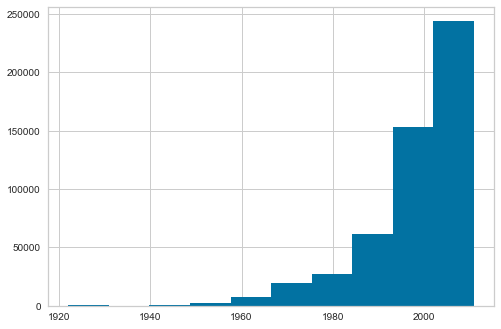

In [32]:
import scipy as sp
kStat, kPvalue = sp.stats.kstest(rvs=y, cdf='norm')
print(kStat,kPvalue)
y.hist()

# Regressão Linear


In [36]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(X_train, y_train)

In [37]:
from sklearn.metrics import mean_absolute_error

y_train_pred = reg1.predict(X_train)
y_pred = reg1.predict(X_test)
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_pred))

6.7973155692939295
6.763340508137587


In [38]:
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(mean_squared_error(y_test, y_pred, squared=False))

9.554847530505489
9.489581416837995


In [39]:
print(mean_squared_error(y_train, y_train_pred, squared=True))
print(mean_squared_error(y_test, y_pred, squared=True))

91.29511133120684
90.05215546679702


In [40]:
print(reg1.score(X_train, y_train))
print(reg1.score(X_test, y_test))

0.23703887307175076
0.2365109052000166


## Gráfico Resíduos

0.2365109052000166

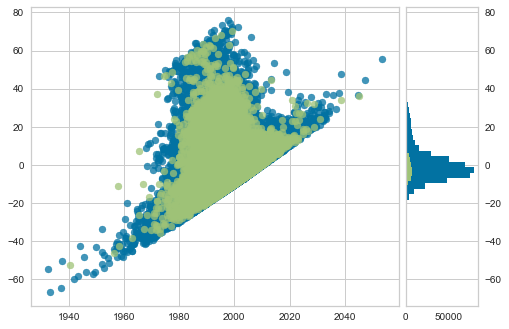

In [41]:
visualizer = ResidualsPlot(reg1)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

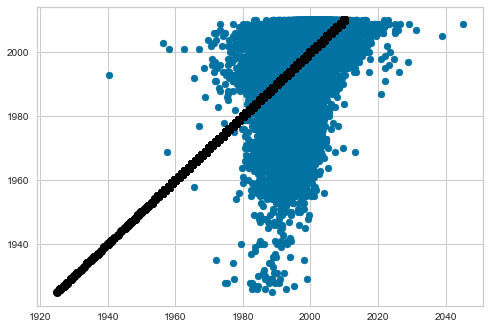

In [49]:
plt.scatter(y_pred, y_test)
plt.scatter(y_test,y_test, color='black', lw=2)

In [50]:
x=pd.DataFrame(y_test-y_pred) #residuos
x.head(3)

,target
201297,5.411996
75576,9.749329
46834,6.278242


(array([1.8000e+01, 4.4000e+01, 3.4100e+02, 1.9310e+03, 4.4000e+03,
        2.4722e+04, 1.9440e+04, 7.1300e+02, 1.8000e+01, 3.0000e+00]),
 array([-70.04369352, -57.78610235, -45.52851118, -33.27092001,
        -21.01332885,  -8.75573768,   3.50185349,  15.75944466,
         28.01703582,  40.27462699,  52.53221816]),
 <BarContainer object of 10 artists>)

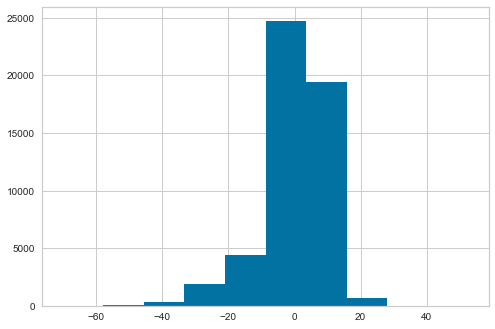

In [51]:
fig = plt.figure()
plt.hist(x['target'])

In [52]:
import statsmodels.api as sm
stat, p = sp.stats.shapiro(x['target'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# residuos não seguem uma distribuição normal

Statistics=0.901, p=0.000


c:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Tentando melhorar

In [56]:
from sklearn.feature_selection import SelectKBest, f_regression
sel_kbest = SelectKBest(f_regression, k=45).fit(X_train, y_train)

In [57]:
sel_kbest

SelectKBest(k=45, score_func=<function f_regression at 0x000001FDC8E59820>)

In [58]:
X_train_sel = sel_kbest.transform(X_train)
X_test_sel = sel_kbest.transform(X_test)

In [59]:
X_train_sel.shape

(463715, 45)

In [60]:
X_train_sel

array([[ 40.62191, -24.23639,  -5.21076, ...,  -6.29779,  83.94413,
          1.99128],
       [ 46.67606,  -6.13275, -20.22255, ...,  22.2823 , -79.73798,
        -44.37745],
       [ 42.84091,  27.21385, -12.34621, ...,   9.57283,  60.90083,
         -8.64674],
       ...,
       [ 46.28889,  -9.55045, -14.06585, ...,  22.44123,  19.213  ,
        -26.27662],
       [ 43.55954, -23.47619, -25.48018, ...,   8.34713,  -6.84043,
         25.18114],
       [ 46.24465,  33.48507, -10.93768, ...,   2.81061, -16.41314,
         15.99634]])

In [61]:
reg = LinearRegression().fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test_sel)

print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_pred))

7.205951859100673
7.162358473743271


## Escolher a metrica

In [44]:
from sklearn.metrics import mean_squared_log_error

In [45]:
y_train_pred = reg.predict(X_train_sel)
y_pred = reg.predict(X_test_sel)

In [46]:
y_train = y_train[y_train_pred > 0]
y_train_pred = y_train_pred[y_train_pred > 0]
y_test = y_test[y_pred > 0]
y_pred = y_pred[y_pred > 0]

In [47]:
print(mean_squared_log_error(y_train, y_train_pred))
print(mean_squared_log_error(y_test, y_pred))

3.911277869992664
3.7452270716462412


## Melhorar o resultado

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=463715, random_state=42)

In [62]:
print(X_train.shape,'\n',X_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(463715, 90) 
 (51630, 90) 
 (463715,) 
 (51630,)


In [49]:
sel_kbest = SelectKBest(f_regression, k=45).fit(X_train, y_train)
X_train = sel_kbest.transform(X_train)
X_test_sel = sel_kbest.transform(X_test)

c:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [65]:
# from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=6, random_state=0,n_estimators=20,verbose=100,n_jobs=-1)
regr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20building tree 7 of 20
building tree 8 of 20

building tree 9 of 20[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   49.7s

building tree 10 of 20[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   49.9s

building tree 11 of 20[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   50.9s

building tree 12 of 20[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   54.0s

building tree 13 of 20[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   55.4s

building tree 14 of 20[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:   56.1s remaining:  2.2min

building tree 15 of 20[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:   58.0s remaining:  1.8min

building tree 16 of 20[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   59.0s remaining:  1.5min

buildin

RandomForestRegressor(max_depth=6, n_estimators=20, n_jobs=-1, random_state=0,
                      verbose=100)

In [67]:
y_train_pred = regr.predict(X_train)
y_pred = regr.predict(X_test)



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   7 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   9 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  11 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  13 out of  20 | elapsed:   

In [70]:
print('MAE')
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_pred))
print('\nMSE')
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(mean_squared_error(y_test, y_pred, squared=False))
print('\nRMSE')
print(mean_squared_error(y_train, y_train_pred, squared=True))
print(mean_squared_error(y_test, y_pred, squared=True))
print('\nR²')
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

MAE
6.940579741733208
6.946647127139752

MSE
9.76739748653228
9.749266121858538

RMSE
95.4020536599171
95.04818991481861

R²
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   7 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   9 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  11 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2, 6, 10, 20], 'n_estimators':[20, 50, 100, 200]}
regr = RandomForestRegressor(random_state=0, n_jobs=-1)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)


print(mean_squared_log_error(y_train, y_train_pred))
print(mean_squared_log_error(y_test, y_pred))

2.6419218238697284
3.2293333350212725


In [ ]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)